In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 


In [3]:
ORIGIN_PATH = 'C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/'
# Origin Path = 권인의 local data path

In [6]:
# 2017~2020 1월 데이터를 추출하여 지점명이 어떻게 변화하고 추가/삭제 되었는지 확인 
path = ORIGIN_PATH + 'Seoul_Traffic/2017/1월 서울시 교통량 조사자료.xlsx' 
df_201701=pd.read_excel(path,encoding='utf-8')

df_201701.head()

,일자,요일,지점명,지점번호,구분,방향,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20170101,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,624.0,656.0,408.0,313.0,...,1396.0,1560.0,1613.0,1488.0,1339.0,1036.0,966.0,937.0,792.0,566.0
1,20170102,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,349.0,258.0,154.0,151.0,...,1620.0,1840.0,1742.0,1932.0,1913.0,1474.0,1289.0,1318.0,1211.0,967.0
2,20170103,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,632.0,456.0,335.0,248.0,...,1883.0,2028.0,2092.0,2048.0,2105.0,1764.0,1389.0,1348.0,1364.0,1016.0
3,20170104,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,709.0,505.0,362.0,286.0,...,1915.0,1946.0,2062.0,2129.0,2106.0,1699.0,1387.0,1430.0,1254.0,1001.0
4,20170105,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,718.0,543.0,370.0,291.0,...,1778.0,2010.0,1966.0,2221.0,2198.0,1726.0,1362.0,1405.0,1319.0,1044.0


In [9]:
cols =df_201701['지점번호'].unique()
tmp= pd.DataFrame(cols)


for i in range(2016,2017,1):
    for j in range(1,13,1):
        
        target_name = f'{i}년 {j:02}월'
#         2016년 01월 서울시 교통량 조사자료.xlsx
        path = ORIGIN_PATH + f'Seoul_Traffic/{i}/{i}년 {j:02}월 서울시 교통량 조사자료.xlsx' 
        print(path)
        target_file=pd.read_excel(path,encoding='utf-8',sheet_name=0, index_col=0)
        target_file['mean'] = np.mean(target_file[target_file.isnull() == False][['0시', '1시', '2시', '3시', '4시', '5시',
       '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
       '17시', '18시', '19시', '20시', '21시', '22시', '23시']],axis=1)
        
        tmp_list = []

        for col in cols:
            tmp_list.append( target_file[target_file['지점번호']== col ]['mean'].mean())

        tmp[target_name]=tmp_list
        print(tmp)


C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/Seoul_Traffic/2016/2016년 01월 서울시 교통량 조사자료.xlsx
        0    2016년 01월
0    A-01  1335.226588
1    A-02  1638.050457
2    A-03   665.822436
3    A-04   232.962700
4    A-05  1196.535290
..    ...          ...
138  F-05  3065.160618
139  F-06  4196.088038
140  F-07  2999.838710
141  F-08  1193.413978
142  F-09  2628.798387

[143 rows x 2 columns]
C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/Seoul_Traffic/2016/2016년 02월 서울시 교통량 조사자료.xlsx
        0    2016년 01월    2016년 02월
0    A-01  1335.226588  1315.250880
1    A-02  1638.050457  1660.296788
2    A-03   665.822436   697.862461
3    A-04   232.962700   237.372843
4    A-05  1196.535290  1187.263043
..    ...          ...          ...
138  F-05  3065.160618  3144.298132
139  F-06  4196.088038  4219.314655
140  F-07  2999.838710  3004.636494
141  F-08  1193.413978  1218.222701
142  F-09  2628.798387  2645.855603

[143 rows x 3 columns]
C:/Users/guswj/Desktop/py_proj

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월    2016

In [10]:

for i in range(2017,2019,1):
    for j in range(1,13,1):
        
        target_name = f'{i}년 {j:02}월'
        path = ORIGIN_PATH + f'Seoul_Traffic/{i}/{j}월 서울시 교통량 조사자료.xlsx' 
        print(path)
        target_file=pd.read_excel(path,encoding='utf-8',sheet_name=0, index_col=0)
        target_file['mean'] = np.mean(target_file[target_file.isnull() == False][['0시', '1시', '2시', '3시', '4시', '5시',
       '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시',
       '17시', '18시', '19시', '20시', '21시', '22시', '23시']],axis=1)
        
        tmp_list = []

        for col in cols:
            tmp_list.append( target_file[target_file['지점번호']== col ]['mean'].mean())

        tmp[target_name]=tmp_list
        print(tmp)


C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/Seoul_Traffic/2017/1월 서울시 교통량 조사자료.xlsx
        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월    2016

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

In [11]:
   
for i in range(2019,2020,1):
    for j in range(1,13,1):
        
        target_name = f'{i}년 {j:02}월'
        path = ORIGIN_PATH + f'Seoul_Traffic/{i}/{j}월 서울시 교통량 조사자료.xlsx' 
        print(path)
        target_file=pd.read_excel(path,encoding='utf-8',sheet_name=1, index_col=0)
        target_file['mean'] = np.mean(target_file[target_file.isnull() == False][['0시', '1시', '2시', '3시', '4시', '5시',
               '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', 
                '20시', '21시', '22시', '23시']],axis=1)
        
        tmp_list = []

        for col in cols:
            tmp_list.append( target_file[target_file['지점번호']== col ]['mean'].mean())

        tmp_list
        tmp[target_name]=tmp_list
        print(tmp)


C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/Seoul_Traffic/2019/1월 서울시 교통량 조사자료.xlsx
        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

In [12]:
for i in range(2020,2021,1):
    for j in range(1,7,1):
        
        target_name = f'{i}년 {j:02}월'
        path = ORIGIN_PATH + f'Seoul_Traffic/{i}/{j:02}월 서울시 교통량 조사자료.xlsx' 
        print(path)
        target_file=pd.read_excel(path,encoding='utf-8',sheet_name=1, index_col=0)
        target_file['mean'] = np.mean(target_file[target_file.isnull() == False][['0시', '1시', '2시', '3시', '4시', '5시',
               '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', 
                '20시', '21시', '22시', '23시']],axis=1)
        
        tmp_list = []

        for col in cols:
            tmp_list.append( target_file[target_file['지점번호']== col ]['mean'].mean())

        tmp_list
        tmp[target_name]=tmp_list
        print(tmp)


C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/Seoul_Traffic/2020/01월 서울시 교통량 조사자료.xlsx
        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707

        0    2016년 01월    2016년 02월    2016년 03월    2016년 04월    2016년 05월  \
0    A-01  1335.226588  1315.250880  1453.868356  1479.493929  1445.282410   
1    A-02  1638.050457  1660.296788  1713.586951  1690.696405  1665.619370   
2    A-03   665.822436   697.862461   765.170868   741.157442   725.306292   
3    A-04   232.962700   237.372843   255.773031   258.074130   261.365516   
4    A-05  1196.535290  1187.263043  1252.144313  1222.648939  1211.170386   
..    ...          ...          ...          ...          ...          ...   
138  F-05  3065.160618  3144.298132  3248.773277  3199.351389  3155.741667   
139  F-06  4196.088038  4219.314655  4291.116508  4419.690278  4369.356855   
140  F-07  2999.838710  3004.636494  3099.867546  3223.347917  3143.963172   
141  F-08  1193.413978  1218.222701  1247.164773  1304.549306  1292.256586   
142  F-09  2628.798387  2645.855603  2707.504996  2699.254861  2689.151882   

       2016년 06월    2016년 07월    2016년 08월    2016년 09월  ...   

In [13]:
tmp.head()

,0,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,...,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월
0,A-01,1335.226588,1315.250880,1453.868356,1479.493929,1445.282410,1447.099416,1421.464300,1376.254627,1406.513287,...,1354.738194,1391.827957,1425.870139,1363.702285,1257.273522,1222.048851,1143.043011,1189.425000,1229.462366,1297.075694
1,A-02,1638.050457,1660.296788,1713.586951,1690.696405,1665.619370,1654.951510,1641.267090,1601.644316,1587.299030,...,1468.929167,1505.007392,1545.701389,1490.321909,1376.579301,1348.059626,1254.292339,1304.803472,1351.679435,1427.032639
2,A-03,665.822436,697.862461,765.170868,741.157442,725.306292,724.833565,719.001233,710.457215,709.150670,...,607.279167,615.608871,640.084722,614.555780,566.275538,548.903017,527.921371,554.831492,586.881407,606.903472
3,A-04,232.962700,237.372843,255.773031,258.074130,261.365516,250.103344,248.418951,251.130507,253.255356,...,239.543750,240.973790,244.450539,229.100806,213.567204,208.250718,204.883065,218.265417,222.640457,238.974306
4,A-05,1196.535290,1187.263043,1252.144313,1222.648939,1211.170386,1202.569729,1068.875271,1197.327056,NaN,...,1141.645062,NaN,1199.652535,1160.223790,1109.465054,1088.113506,1017.972921,1064.623611,1090.826613,1125.804167


In [14]:
tmp.to_csv(f'C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/month_mean_check.csv',encoding='cp949',sep=',')

In [64]:
# tmp.set_index(drop=True, inplace = True)

tmp.index.name = ''

tmp.head()

,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,2016년 10월,...,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월
,,,,,,,,,,,,,,,,,,,,,
A-01,1335.226588,1315.250880,1453.868356,1479.493929,1445.282410,1447.099416,1421.464300,1376.254627,1406.513287,1522.765833,...,1354.738194,1391.827957,1425.870139,1363.702285,1257.273522,1222.048851,1143.043011,1189.425000,1229.462366,1297.075694
A-02,1638.050457,1660.296788,1713.586951,1690.696405,1665.619370,1654.951510,1641.267090,1601.644316,1587.299030,1665.281185,...,1468.929167,1505.007392,1545.701389,1490.321909,1376.579301,1348.059626,1254.292339,1304.803472,1351.679435,1427.032639
A-03,665.822436,697.862461,765.170868,741.157442,725.306292,724.833565,719.001233,710.457215,709.150670,734.054790,...,607.279167,615.608871,640.084722,614.555780,566.275538,548.903017,527.921371,554.831492,586.881407,606.903472
A-04,232.962700,237.372843,255.773031,258.074130,261.365516,250.103344,248.418951,251.130507,253.255356,253.304762,...,239.543750,240.973790,244.450539,229.100806,213.567204,208.250718,204.883065,218.265417,222.640457,238.974306
A-05,1196.535290,1187.263043,1252.144313,1222.648939,1211.170386,1202.569729,1068.875271,1197.327056,NaN,NaN,...,1141.645062,NaN,1199.652535,1160.223790,1109.465054,1088.113506,1017.972921,1064.623611,1090.826613,1125.804167


In [57]:
tmp.columns

Index(['2016년 01월', '2016년 02월', '2016년 03월', '2016년 04월', '2016년 05월',
       '2016년 06월', '2016년 07월', '2016년 08월', '2016년 09월', '2016년 10월',
       '2016년 11월', '2016년 12월', '2017년 01월', '2017년 02월', '2017년 03월',
       '2017년 04월', '2017년 05월', '2017년 06월', '2017년 07월', '2017년 08월',
       '2017년 09월', '2017년 10월', '2017년 11월', '2017년 12월', '2018년 01월',
       '2018년 02월', '2018년 03월', '2018년 04월', '2018년 05월', '2018년 06월',
       '2018년 07월', '2018년 08월', '2018년 09월', '2018년 10월', '2018년 11월',
       '2018년 12월', '2019년 01월', '2019년 02월', '2019년 03월', '2019년 04월',
       '2019년 05월', '2019년 06월', '2019년 07월', '2019년 08월', '2019년 09월',
       '2019년 10월', '2019년 11월', '2019년 12월', '2020년 01월', '2020년 02월',
       '2020년 03월', '2020년 04월', '2020년 05월', '2020년 06월'],
      dtype='object')

C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


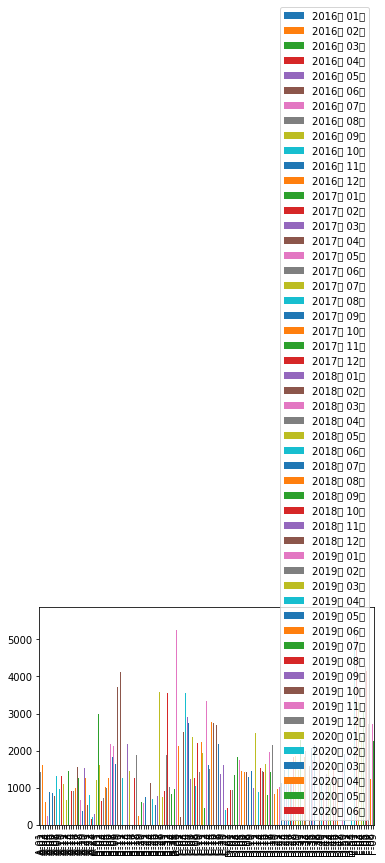

In [67]:
tmp.plot.bar()

In [74]:
idxs = tmp.index
cols = tmp.columns

idxs, cols

(Index(['A-01', 'A-02', 'A-03', 'A-04', 'A-05', 'A-06', 'A-07', 'A-08', 'A-09',
        'A-10',
        ...
        'D-54', 'F-01', 'F-02', 'F-03', 'F-04', 'F-05', 'F-06', 'F-07', 'F-08',
        'F-09'],
       dtype='object', name='', length=143),
 Index(['2016년 01월', '2016년 02월', '2016년 03월', '2016년 04월', '2016년 05월',
        '2016년 06월', '2016년 07월', '2016년 08월', '2016년 09월', '2016년 10월',
        '2016년 11월', '2016년 12월', '2017년 01월', '2017년 02월', '2017년 03월',
        '2017년 04월', '2017년 05월', '2017년 06월', '2017년 07월', '2017년 08월',
        '2017년 09월', '2017년 10월', '2017년 11월', '2017년 12월', '2018년 01월',
        '2018년 02월', '2018년 03월', '2018년 04월', '2018년 05월', '2018년 06월',
        '2018년 07월', '2018년 08월', '2018년 09월', '2018년 10월', '2018년 11월',
        '2018년 12월', '2019년 01월', '2019년 02월', '2019년 03월', '2019년 04월',
        '2019년 05월', '2019년 06월', '2019년 07월', '2019년 08월', '2019년 09월',
        '2019년 10월', '2019년 11월', '2019년 12월', '2020년 01월', '2020년 02월',
        '2020년 03월',

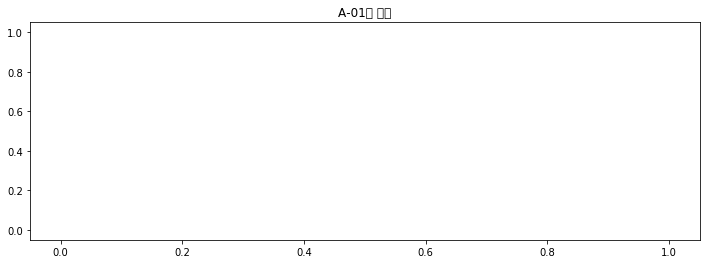

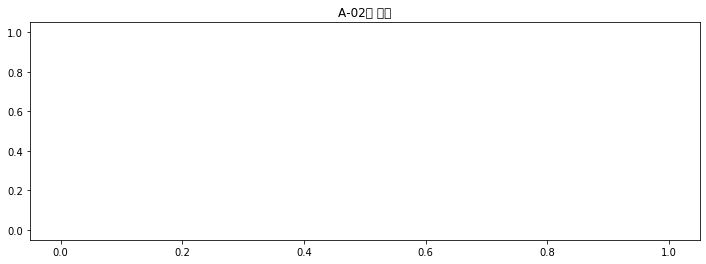

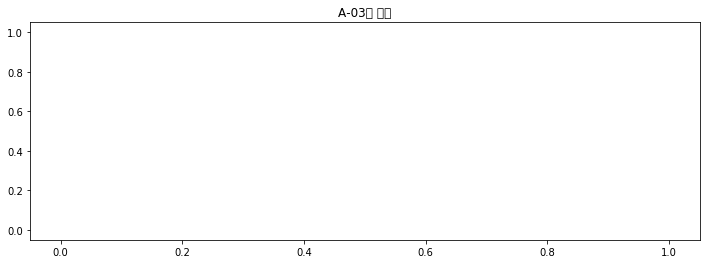

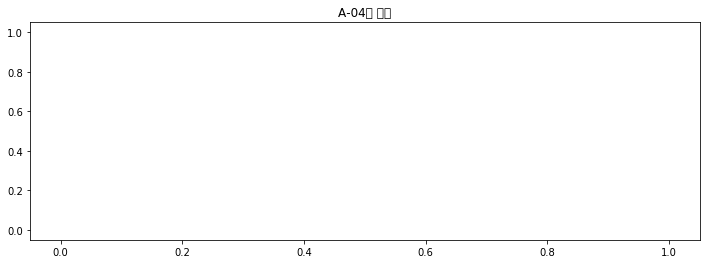

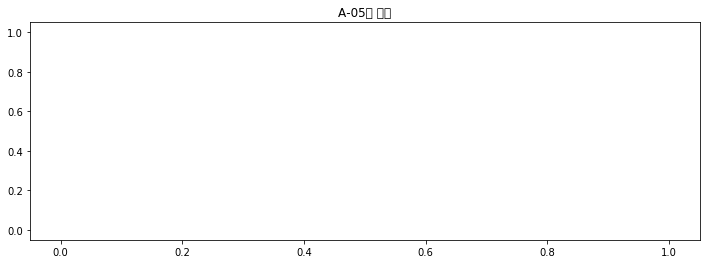

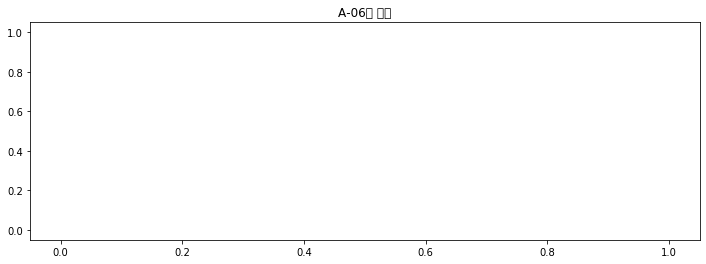

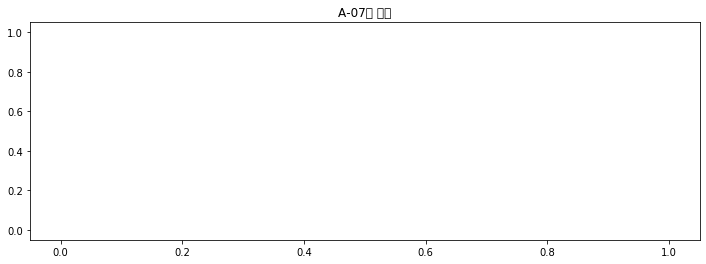

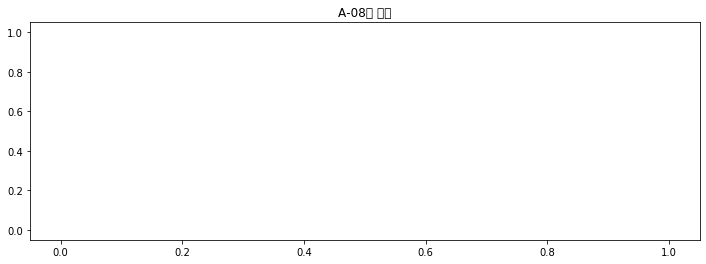

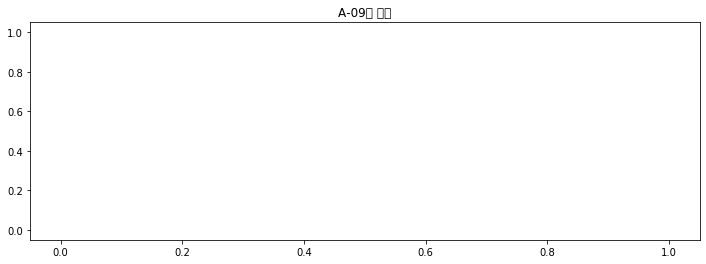

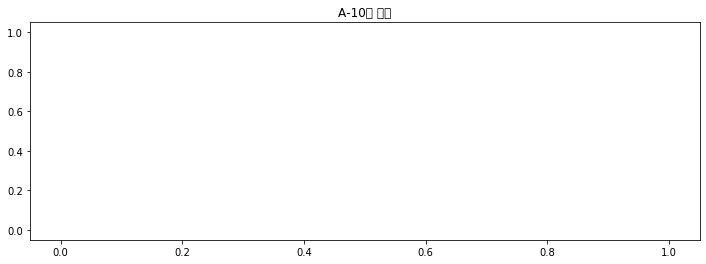

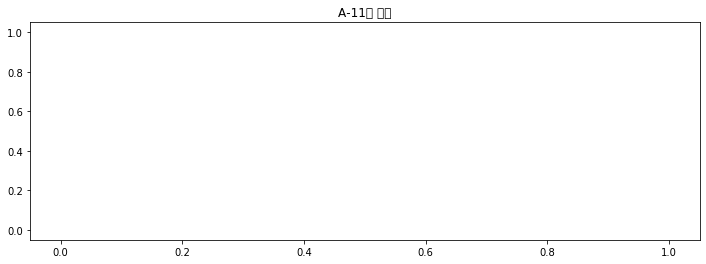

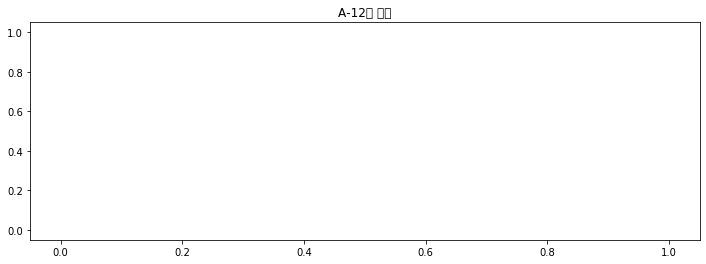

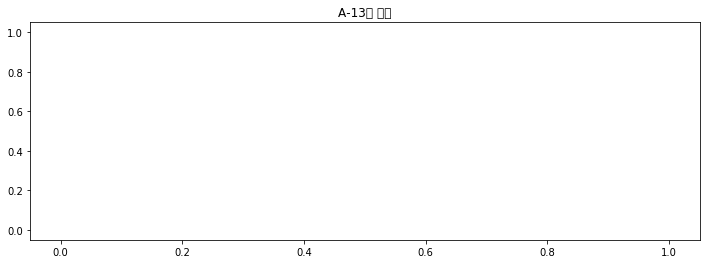

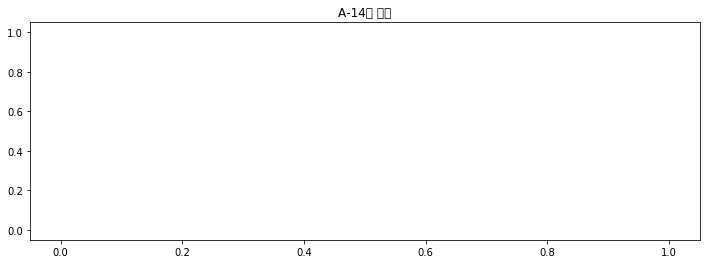

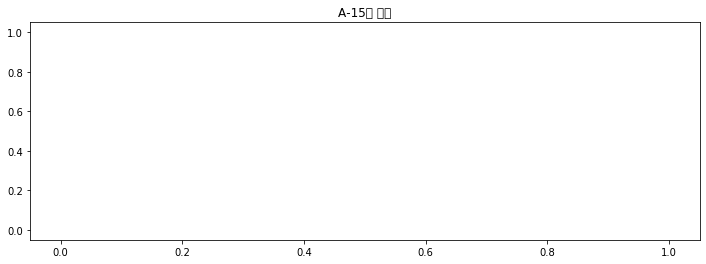

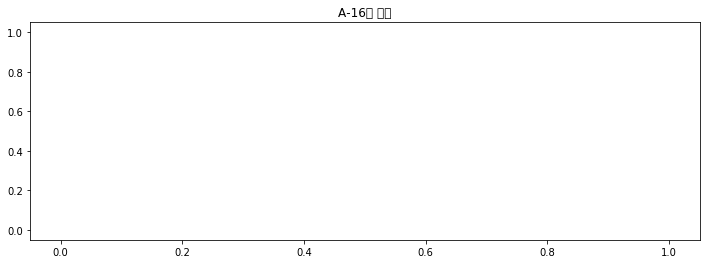

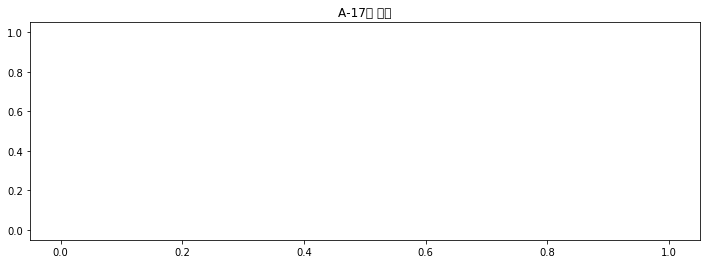

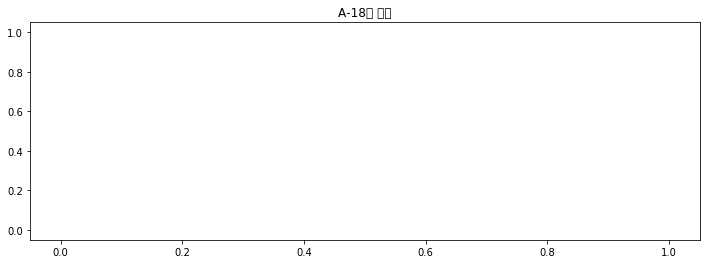

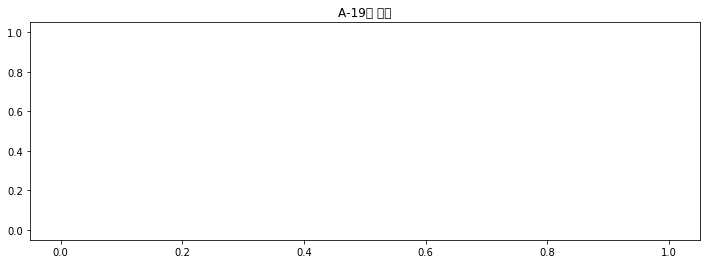

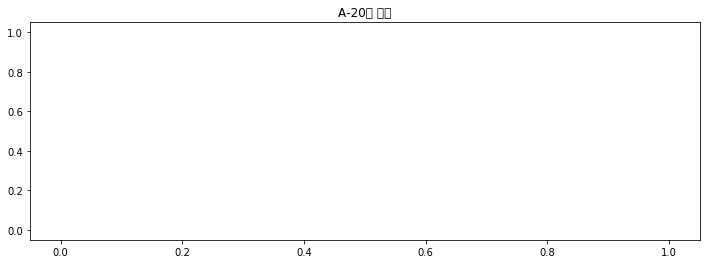

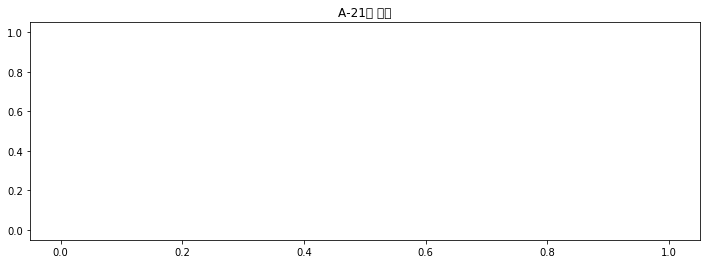

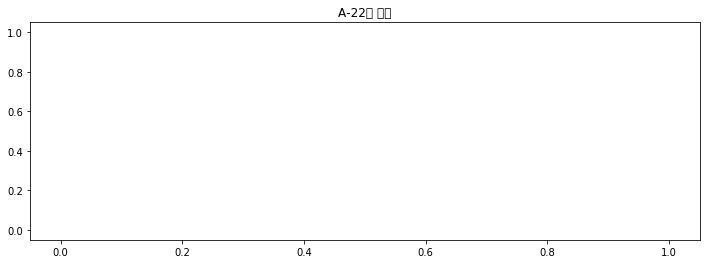

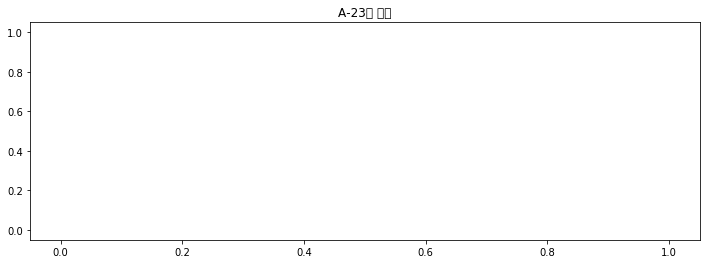

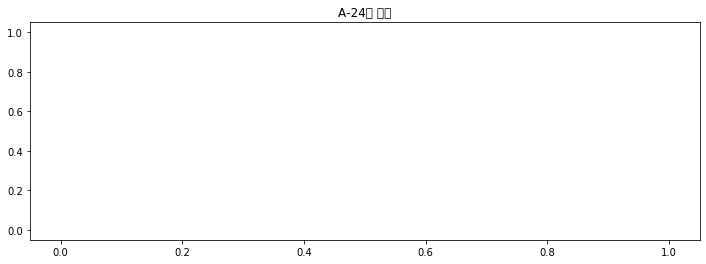

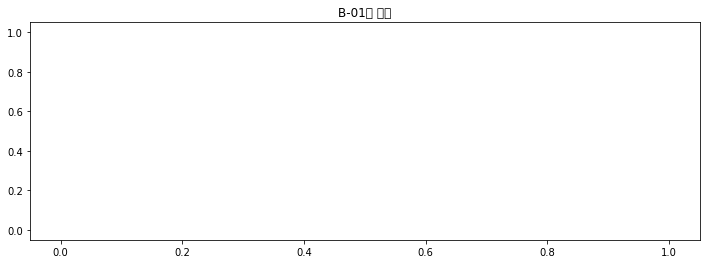

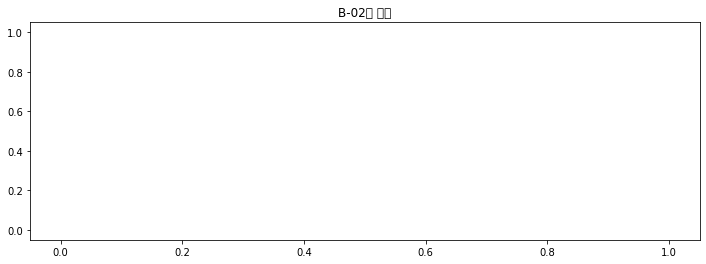

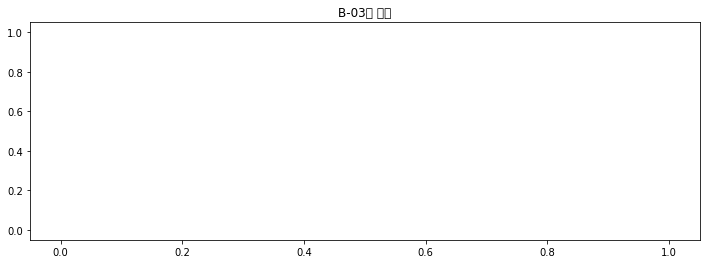

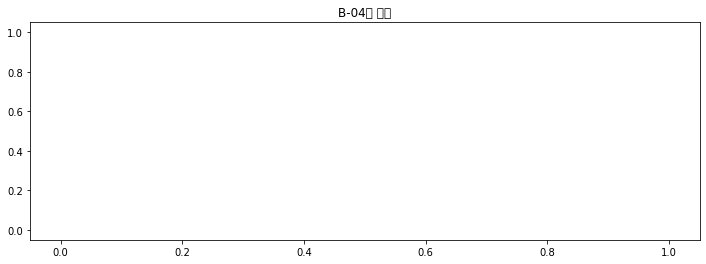

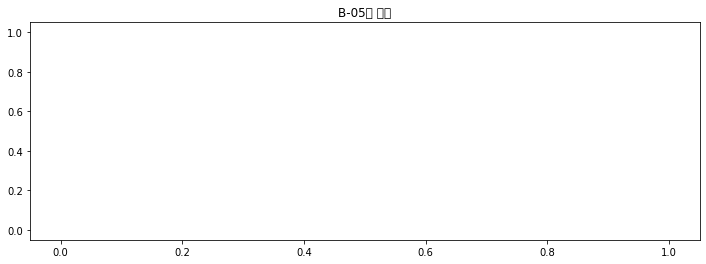

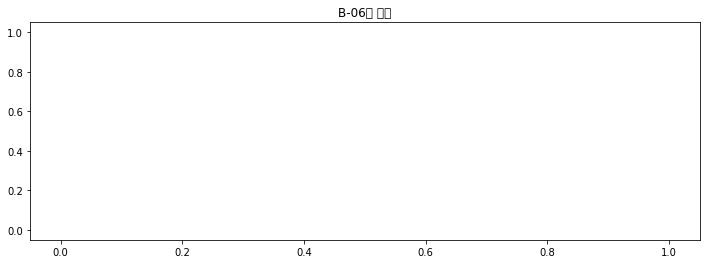

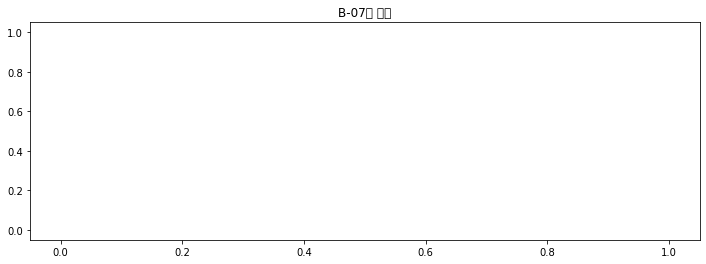

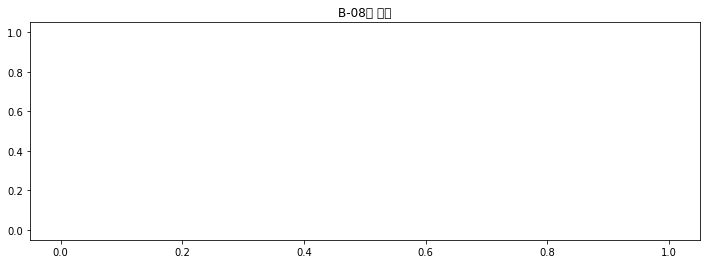

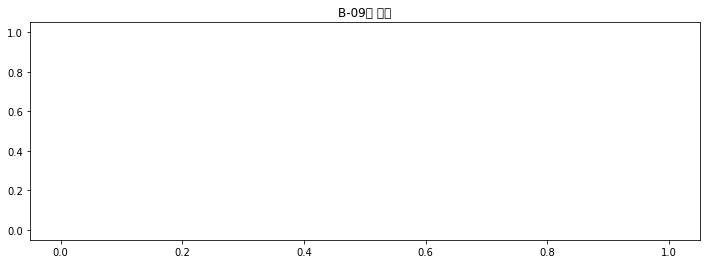

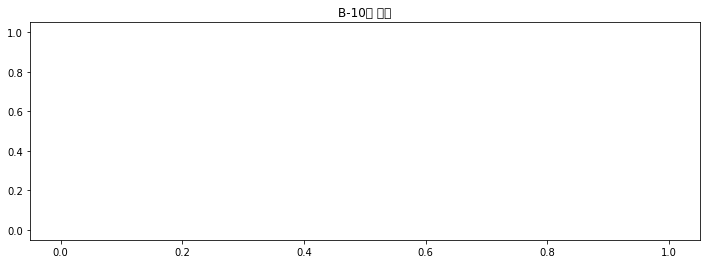

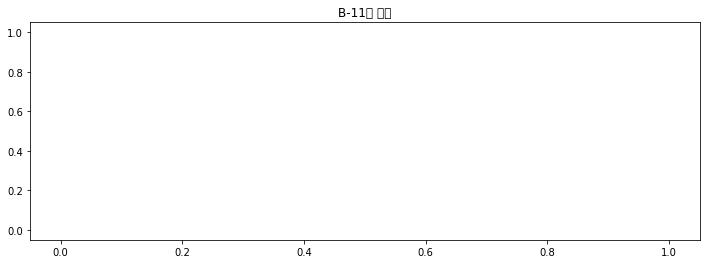

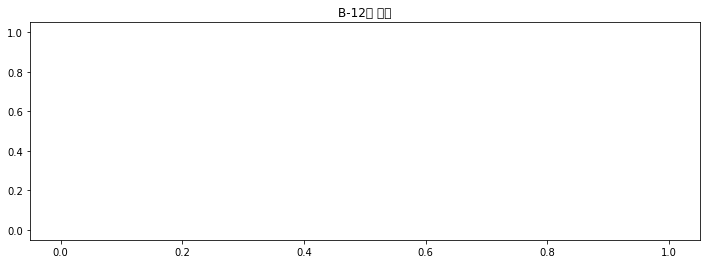

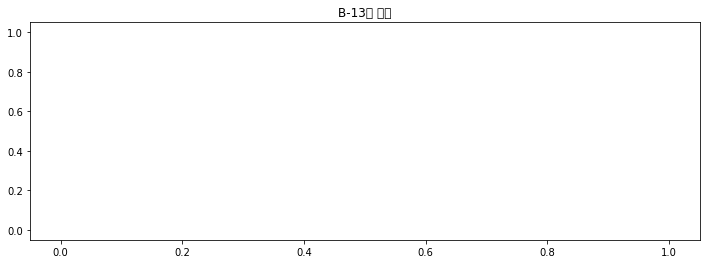

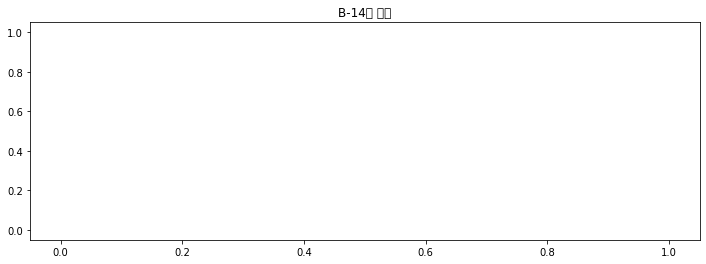

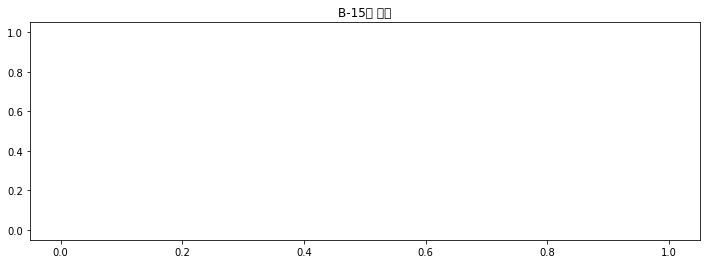

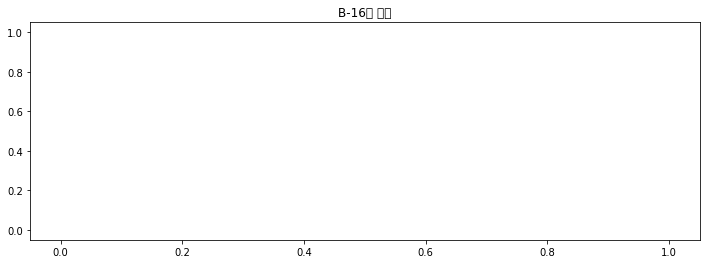

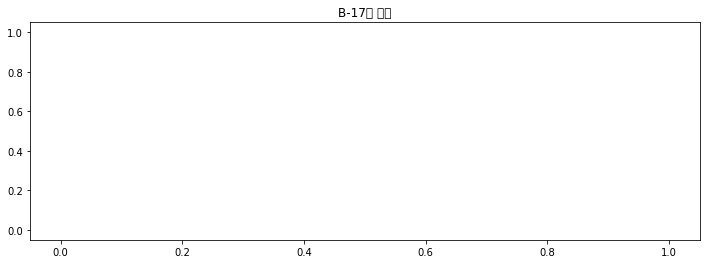

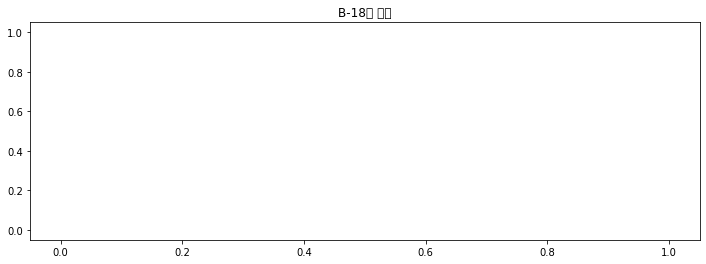

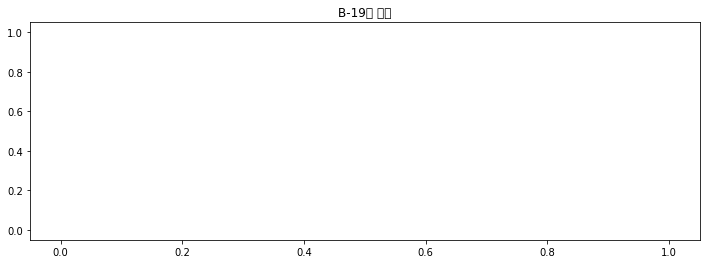

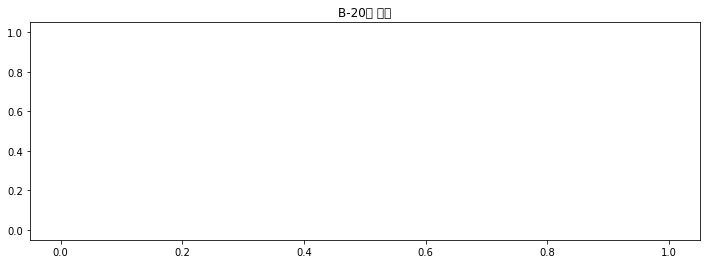

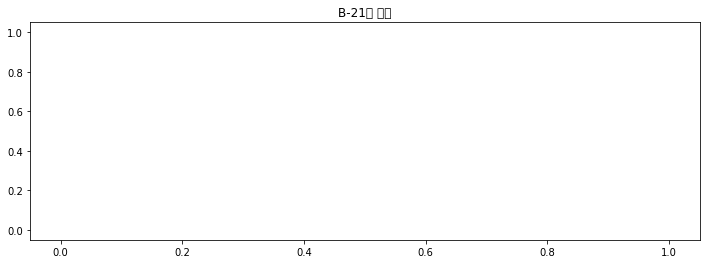

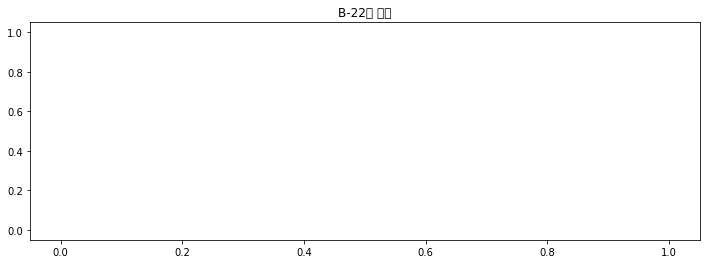

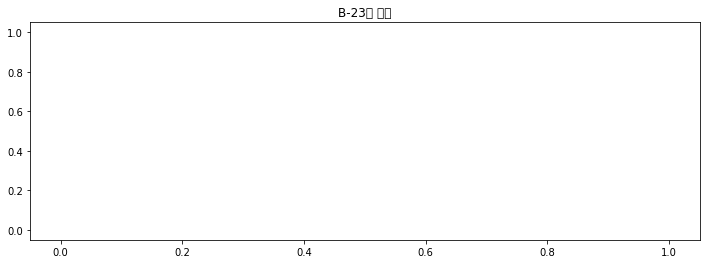

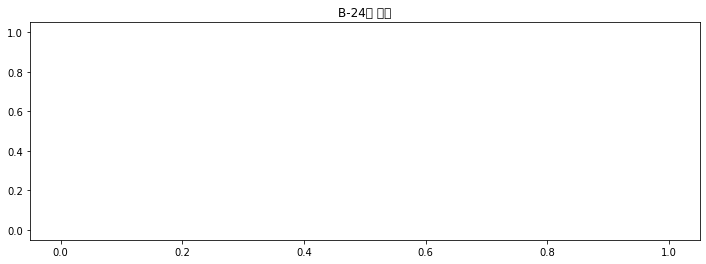

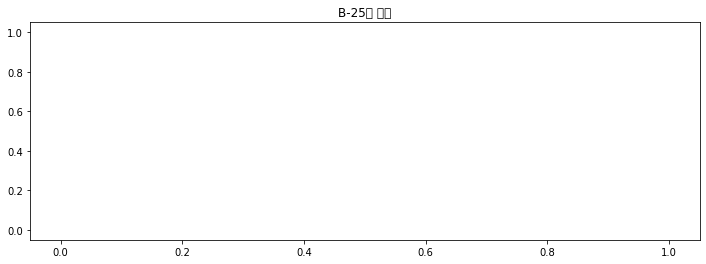

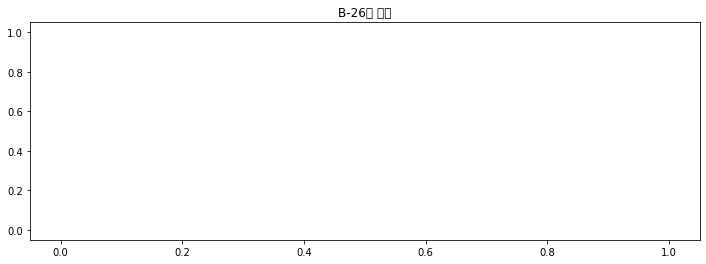

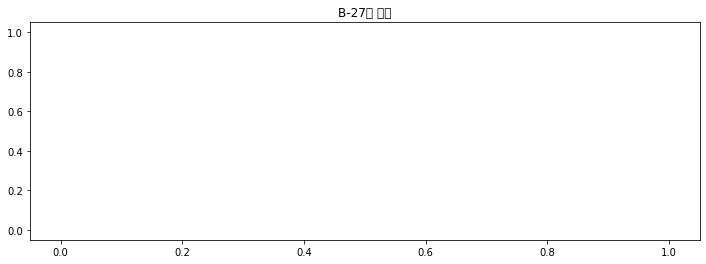

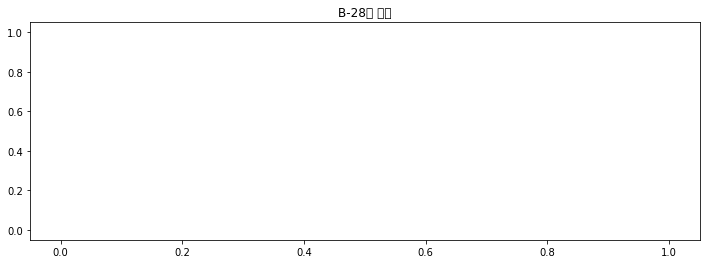

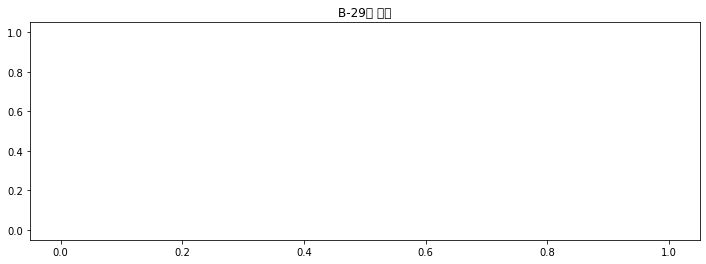

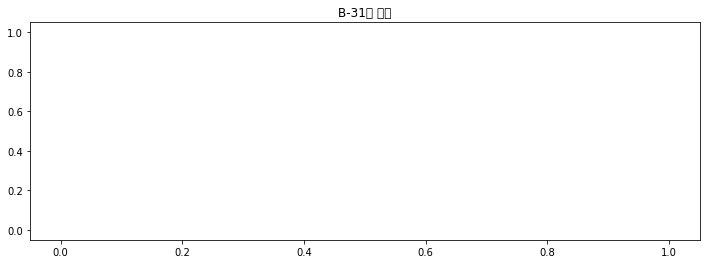

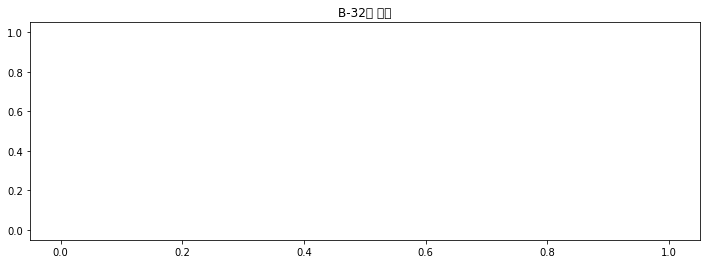

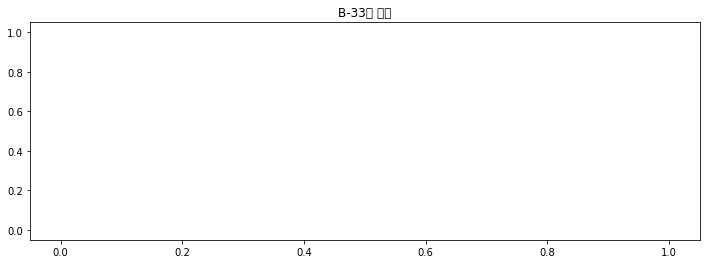

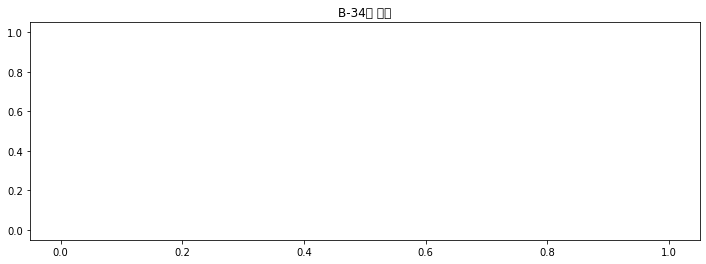

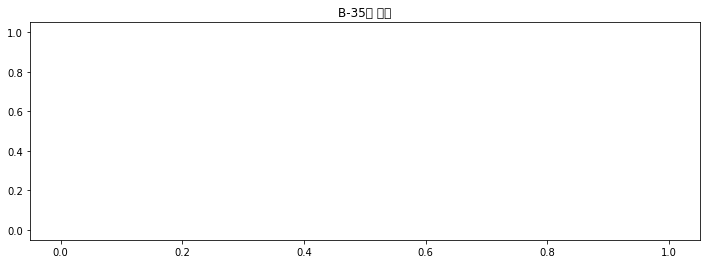

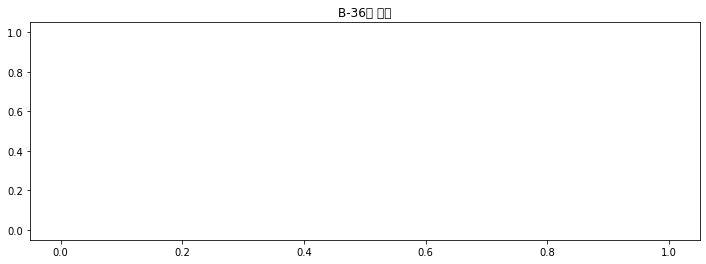

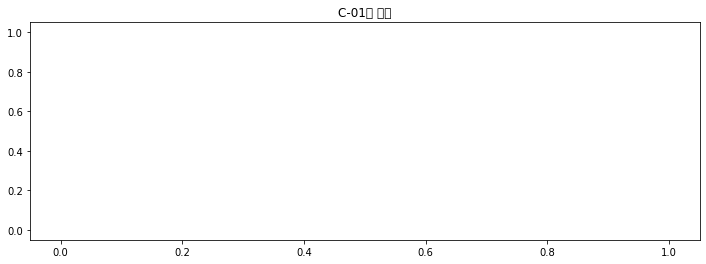

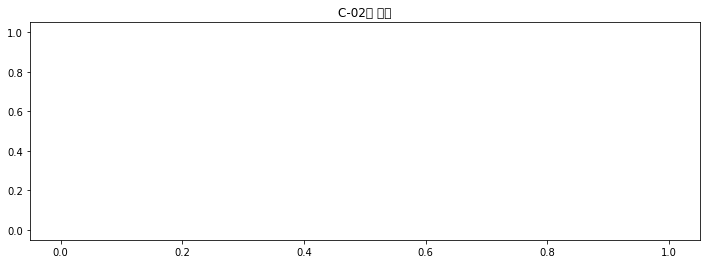

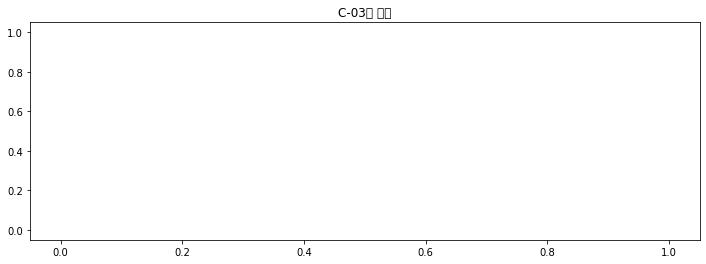

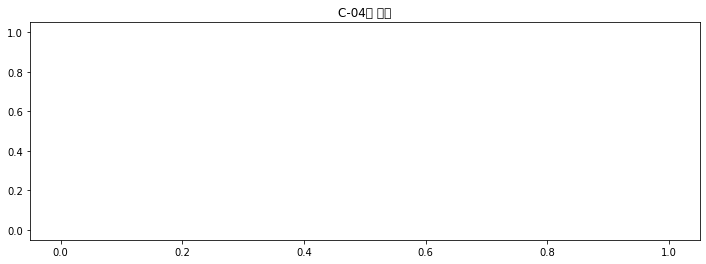

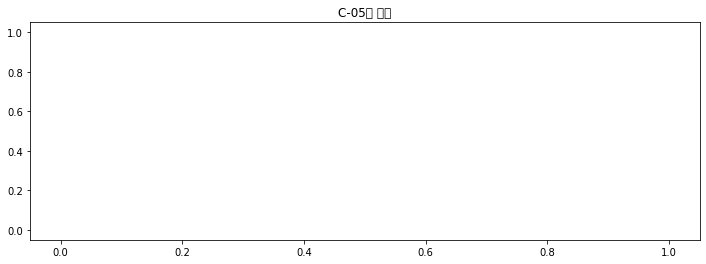

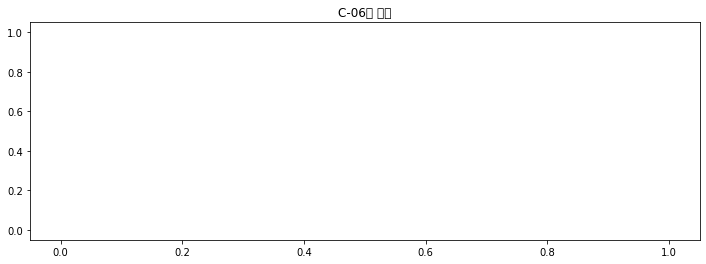

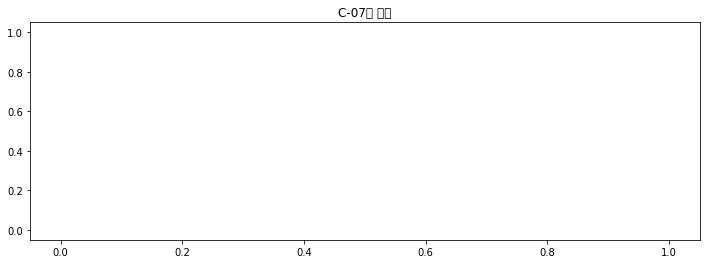

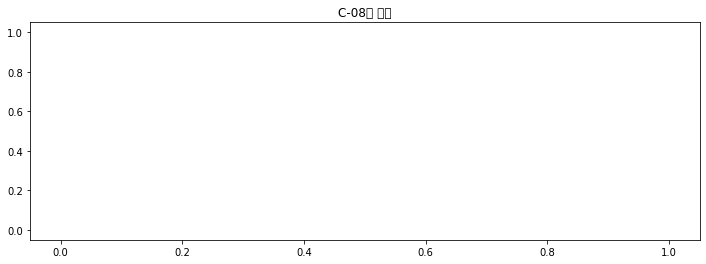

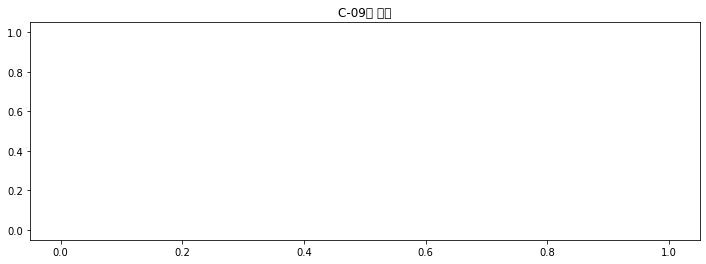

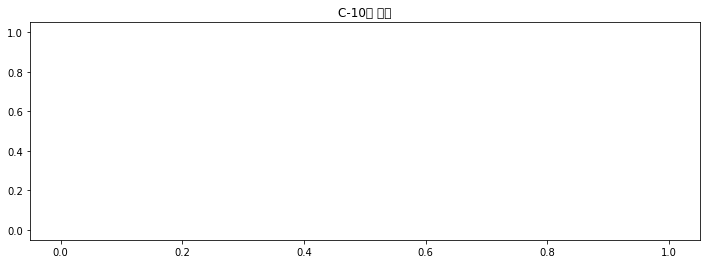

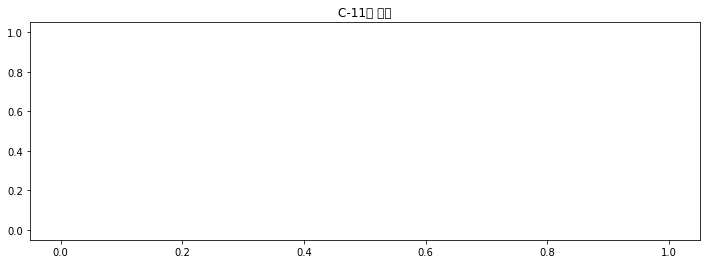

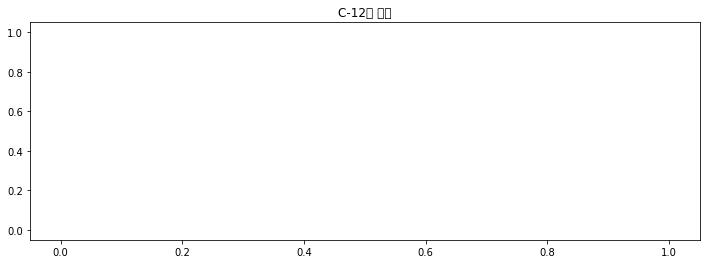

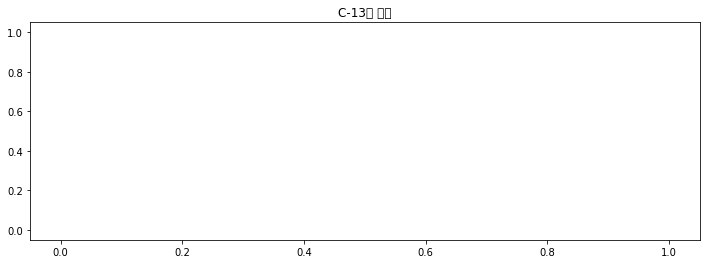

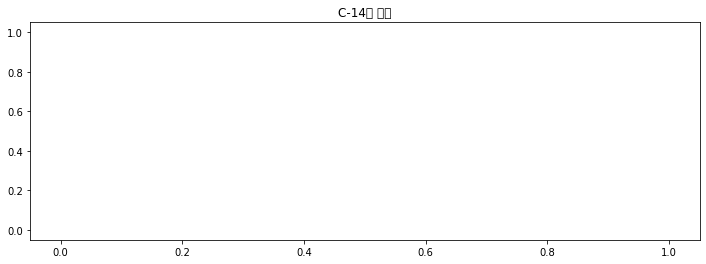

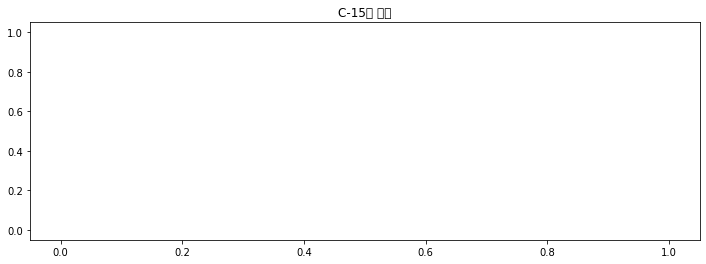

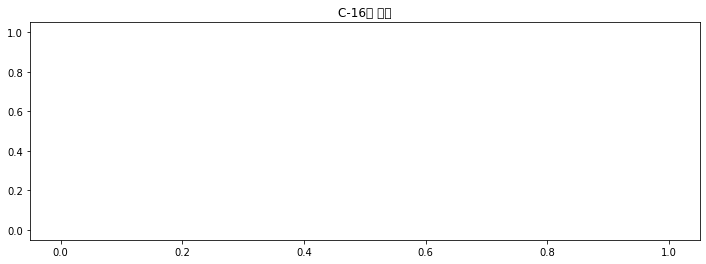

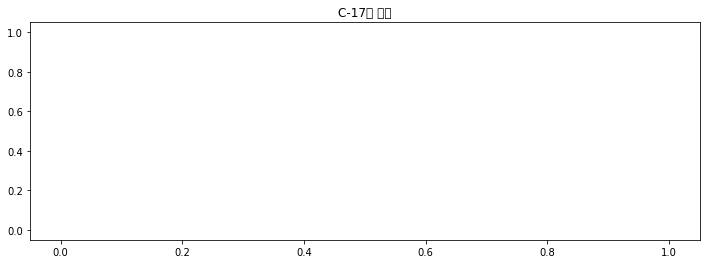

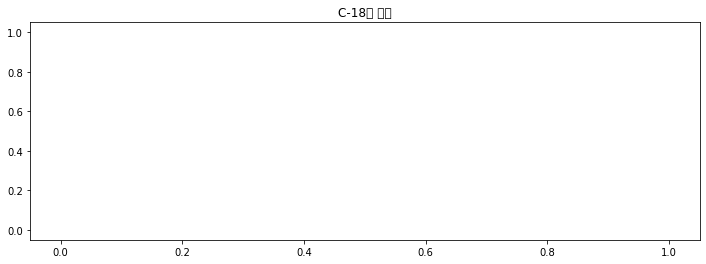

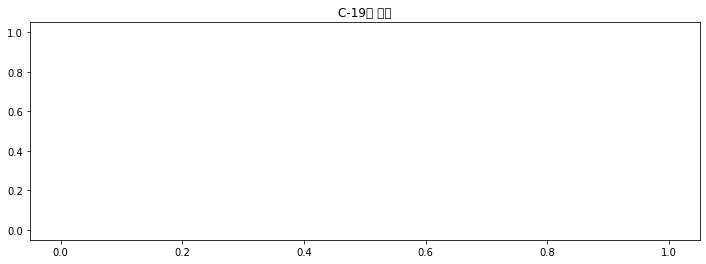

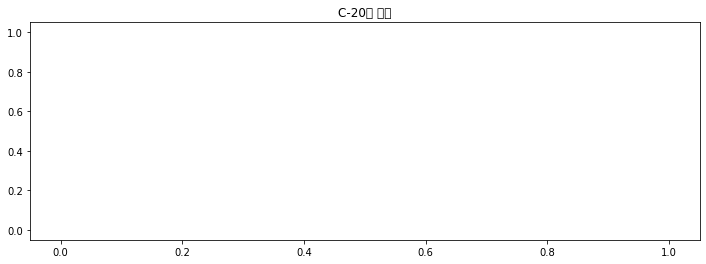

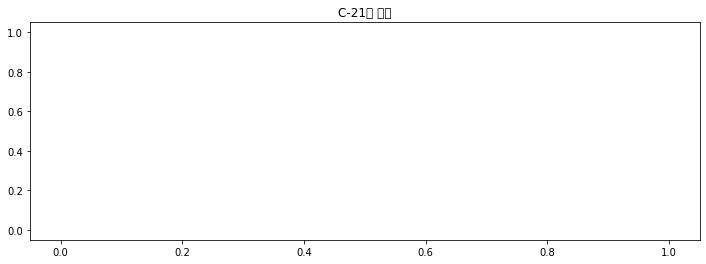

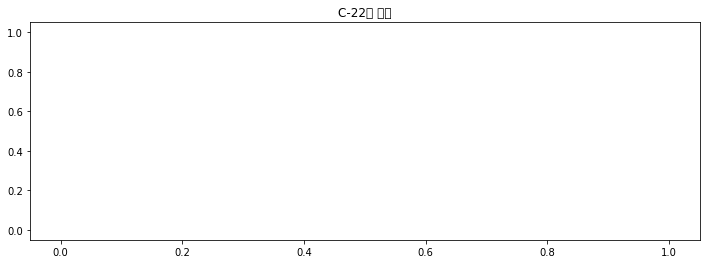

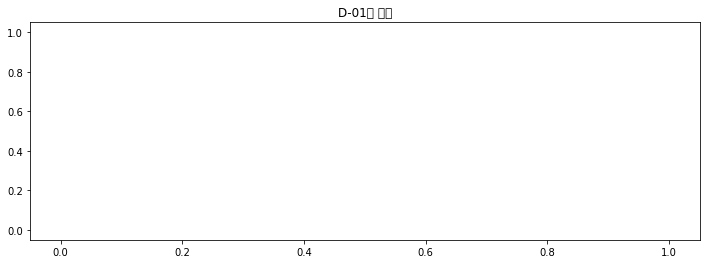

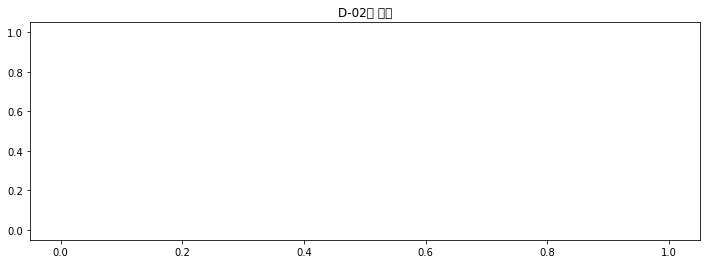

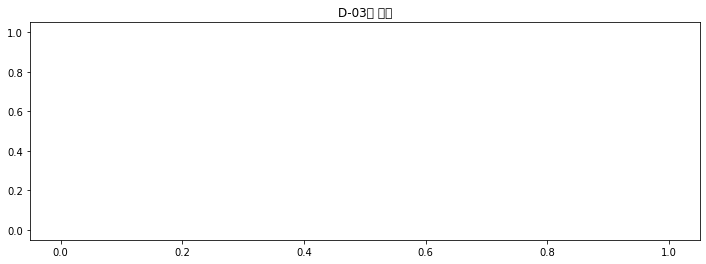

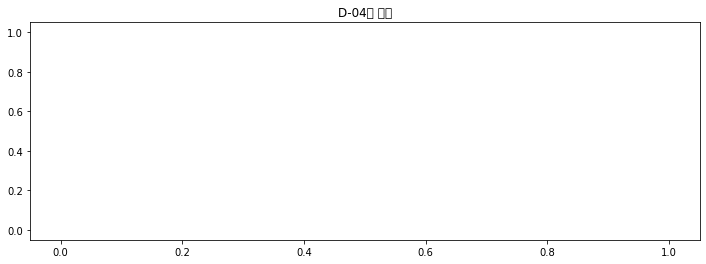

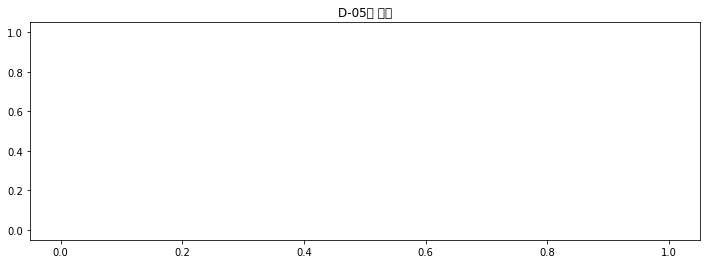

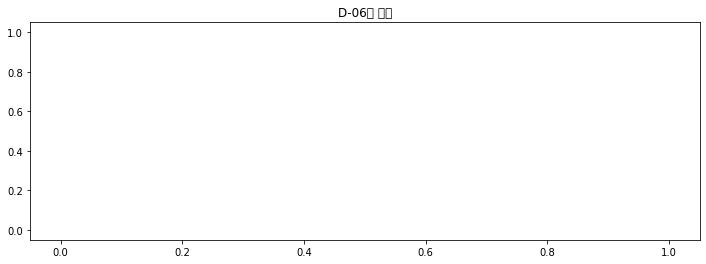

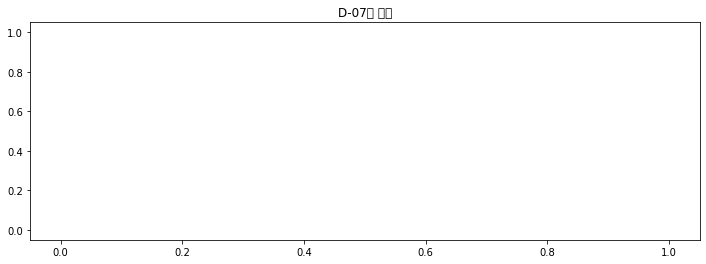

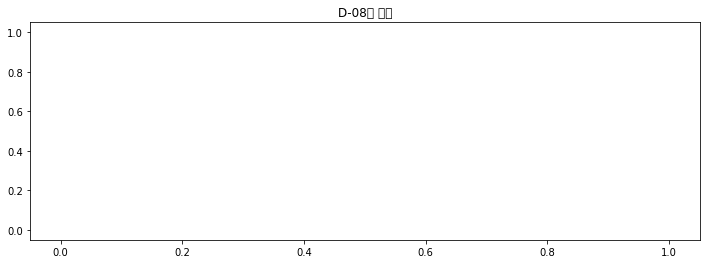

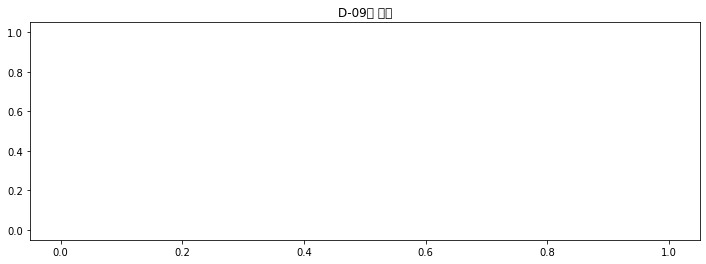

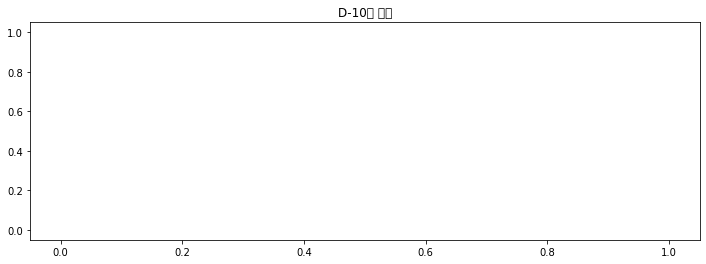

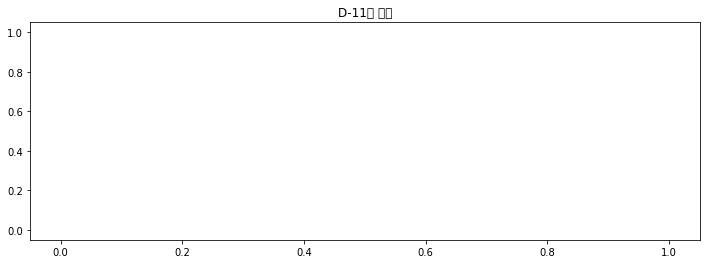

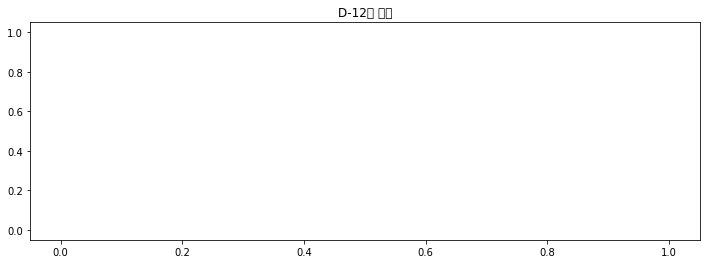

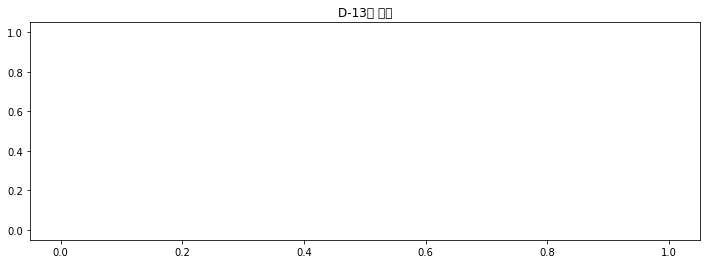

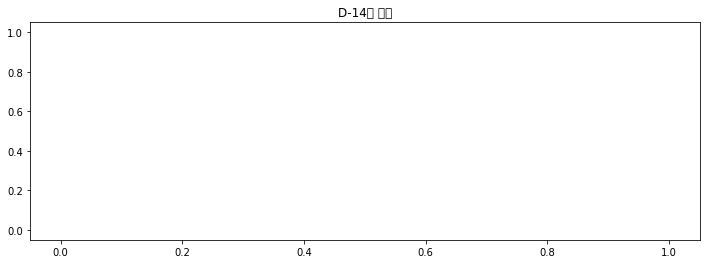

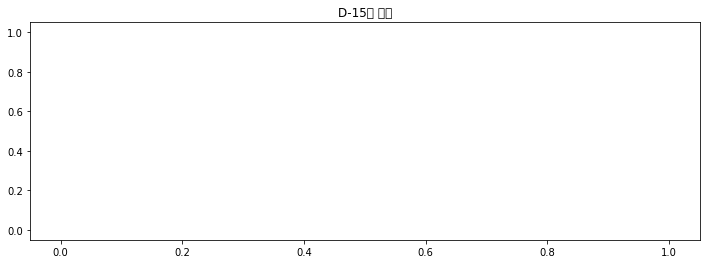

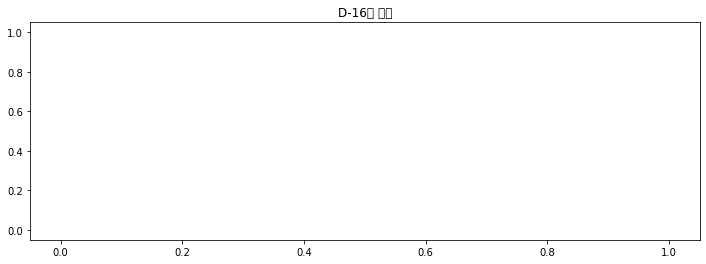

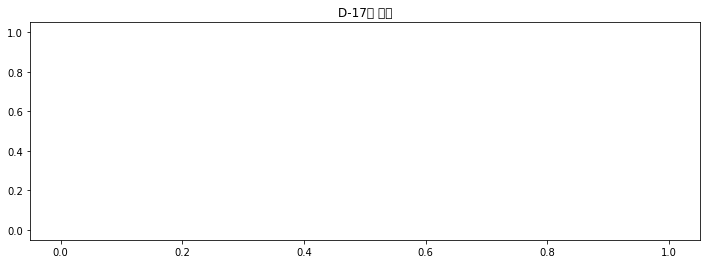

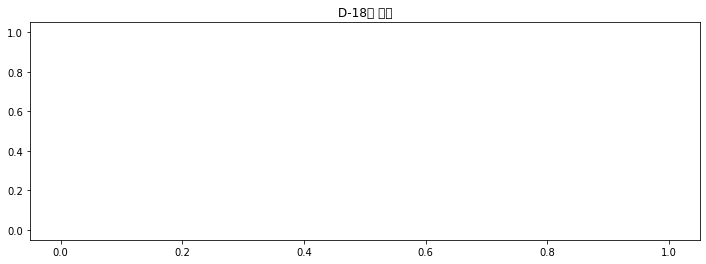

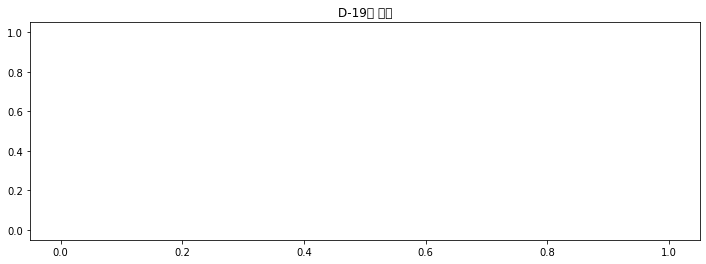

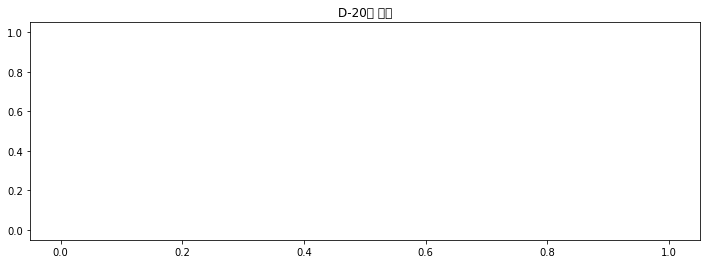

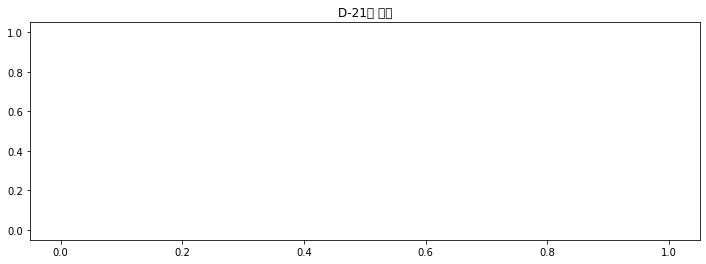

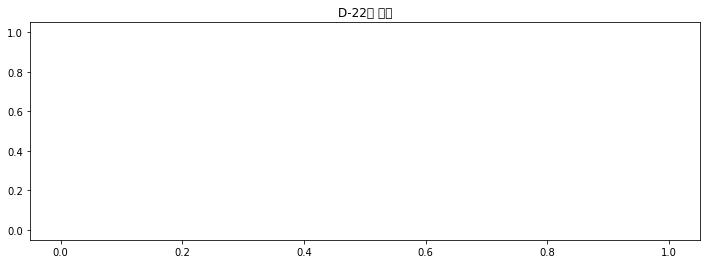

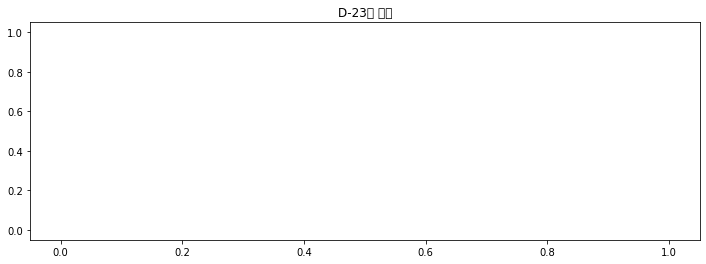

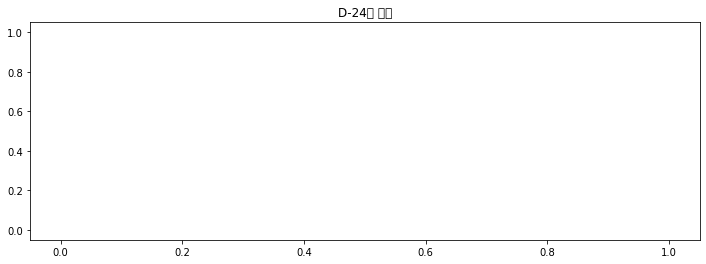

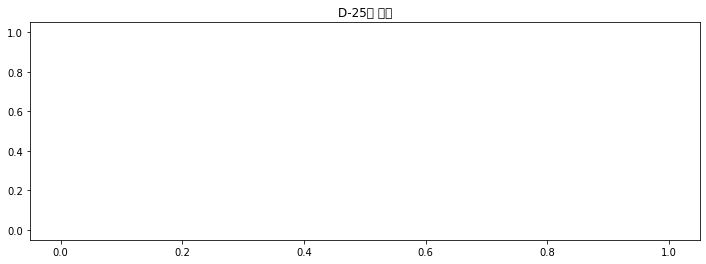

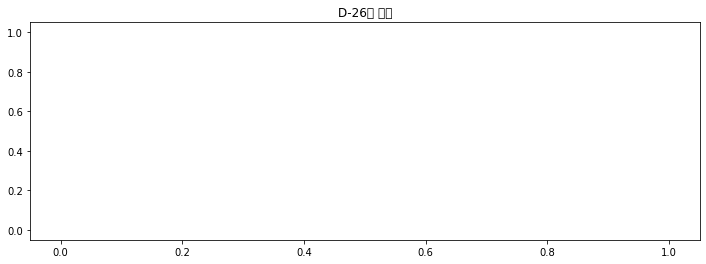

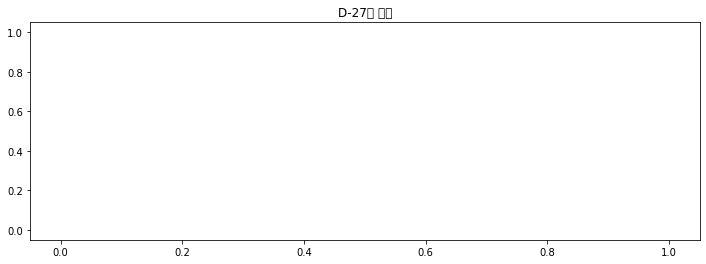

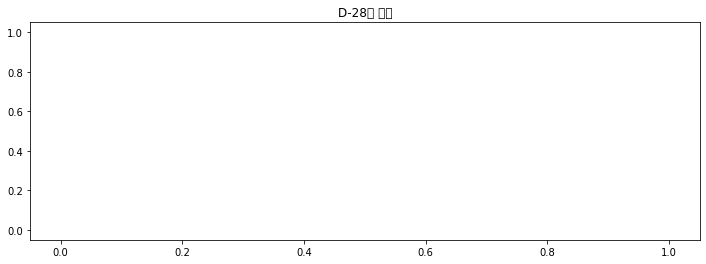

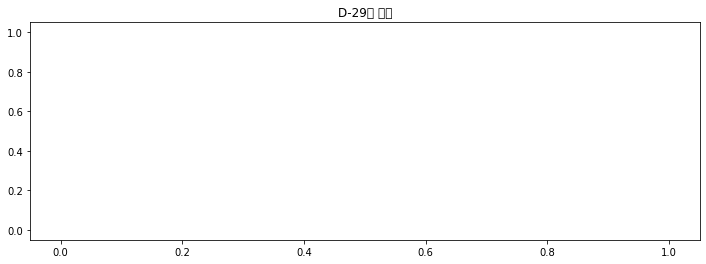

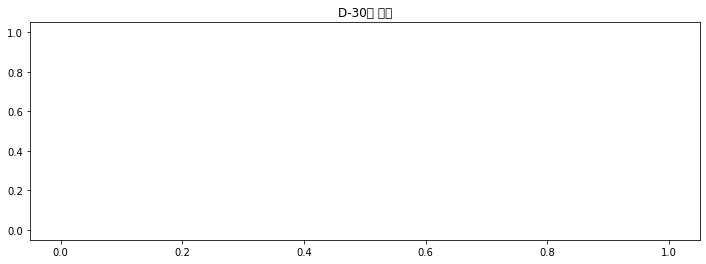

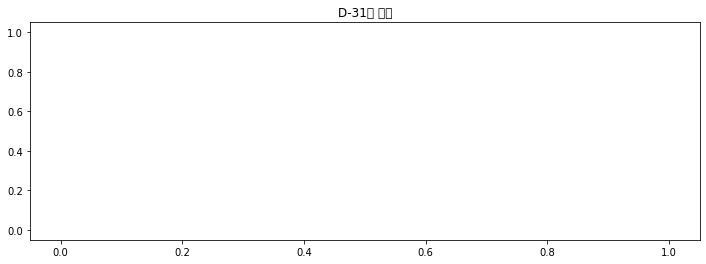

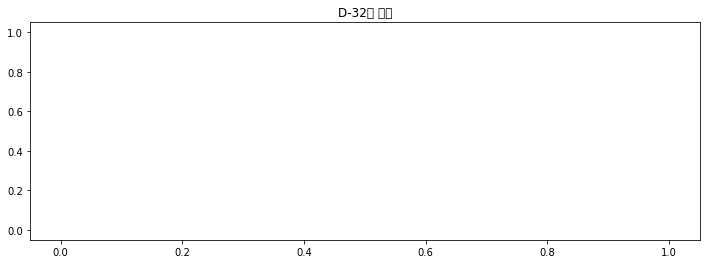

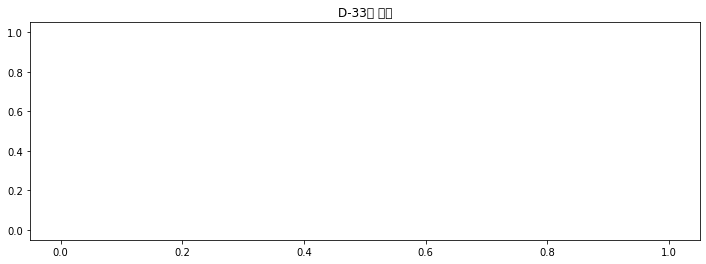

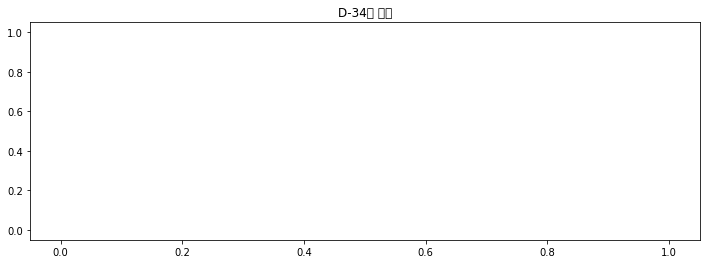

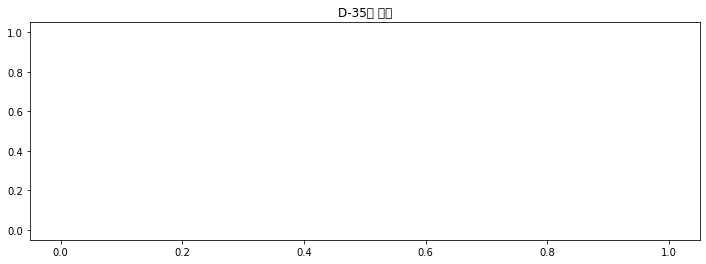

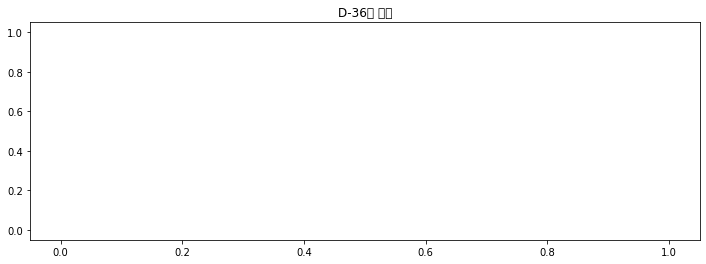

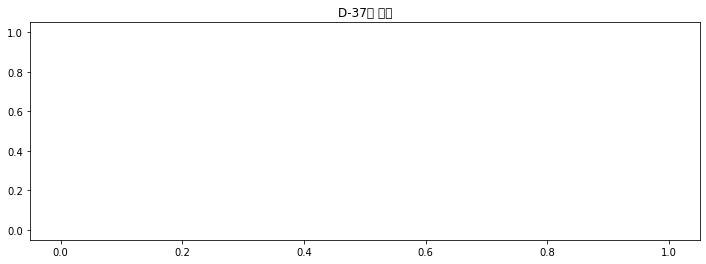

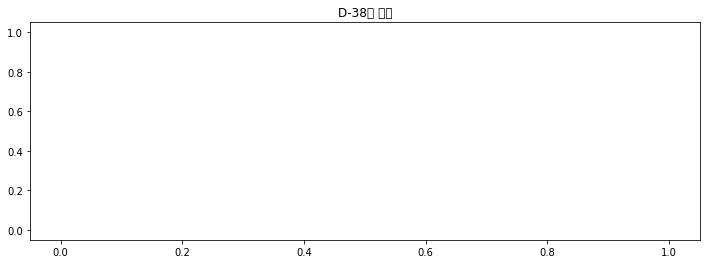

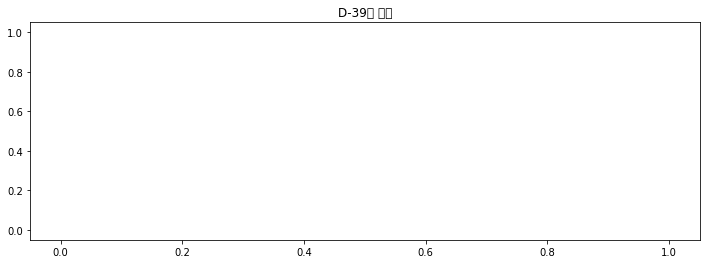

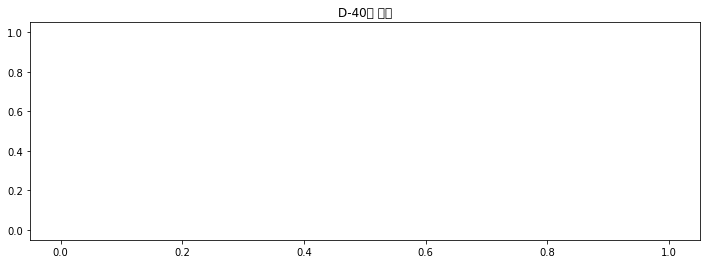

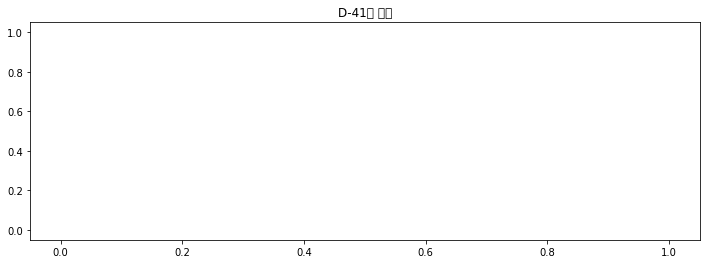

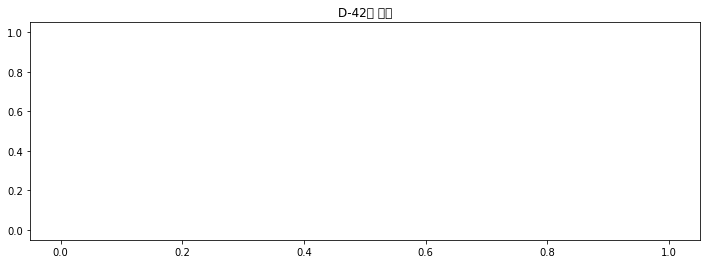

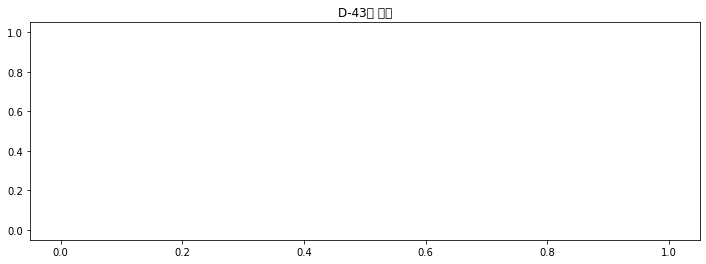

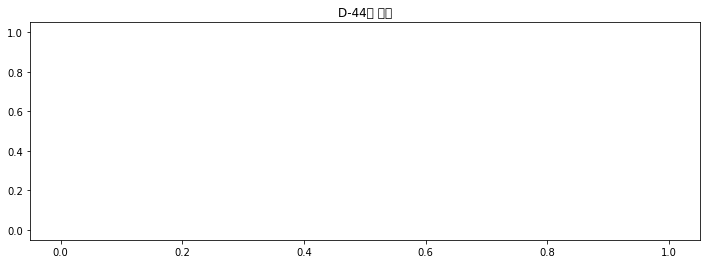

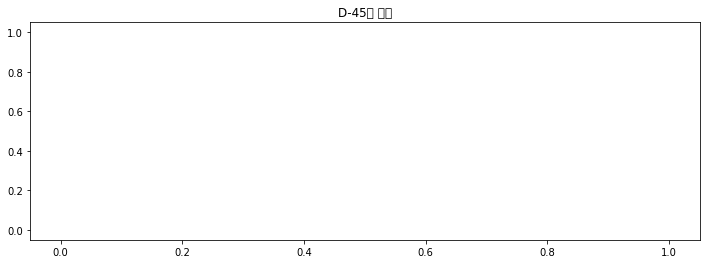

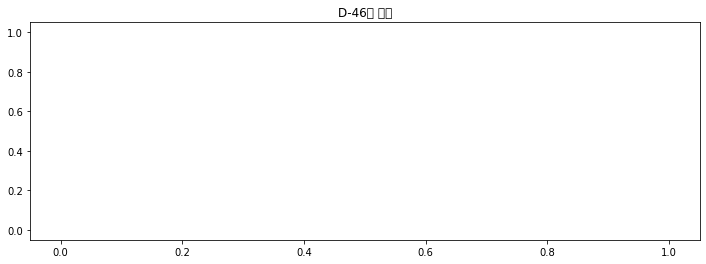

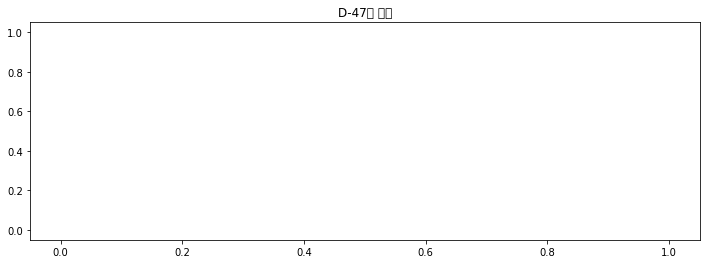

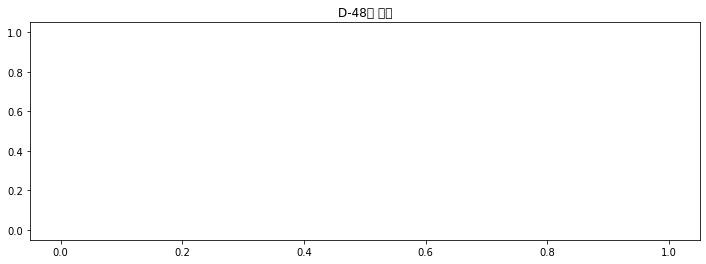

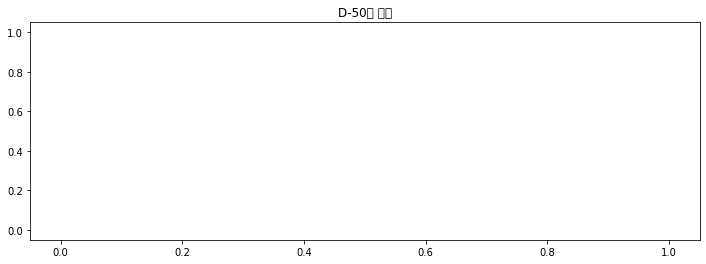

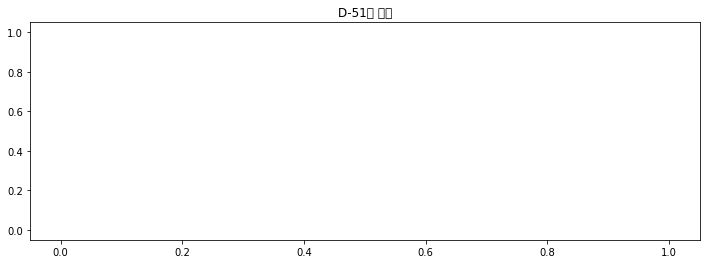

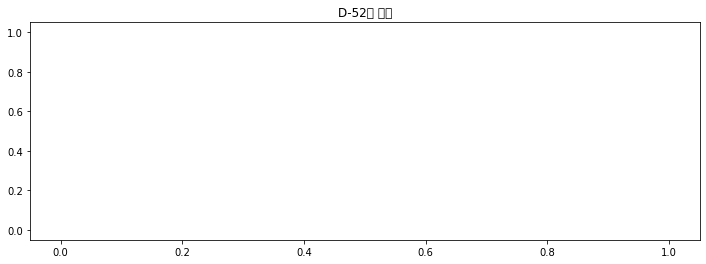

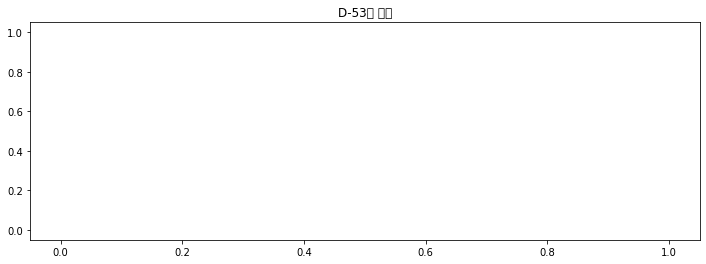

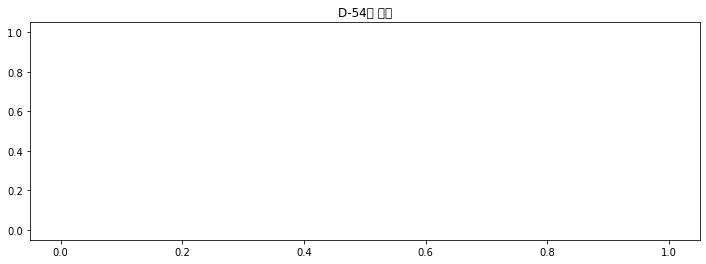

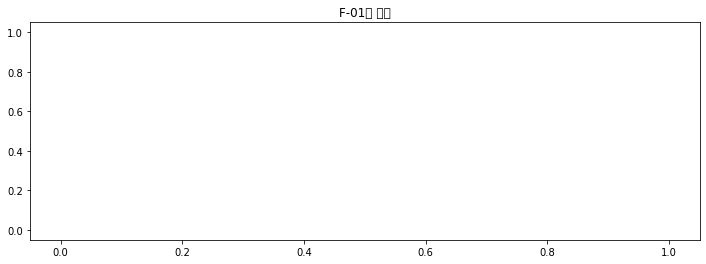

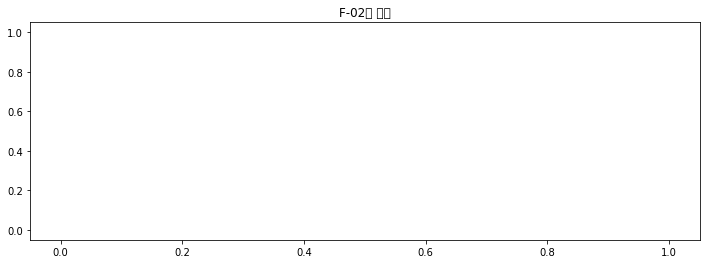

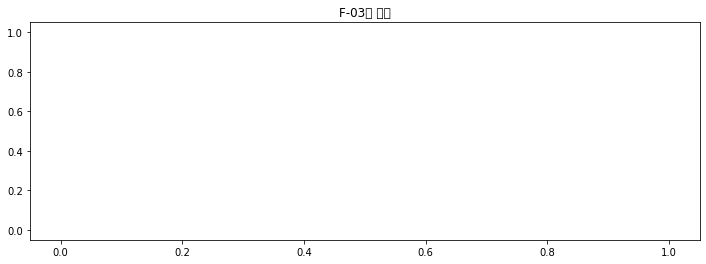

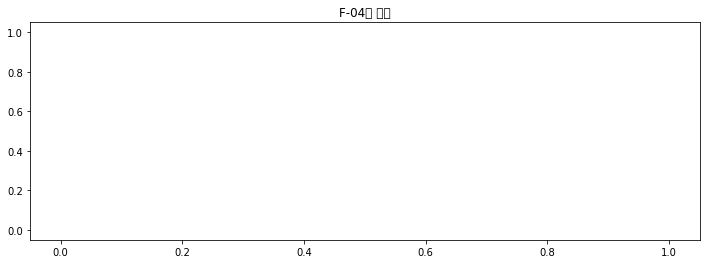

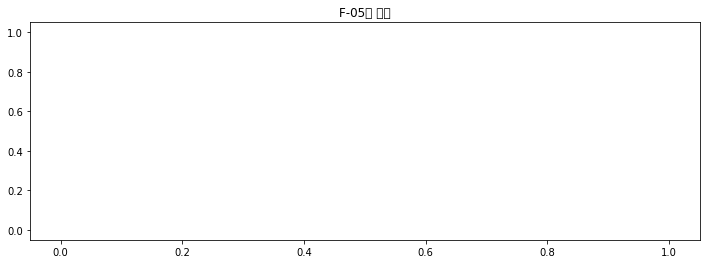

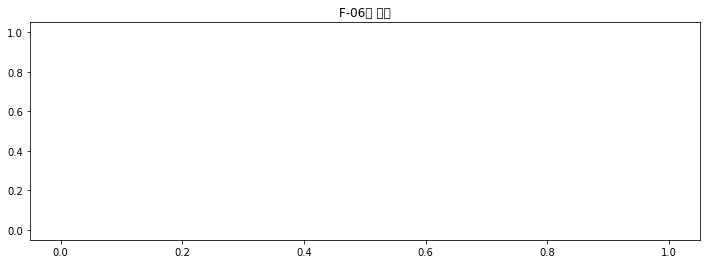

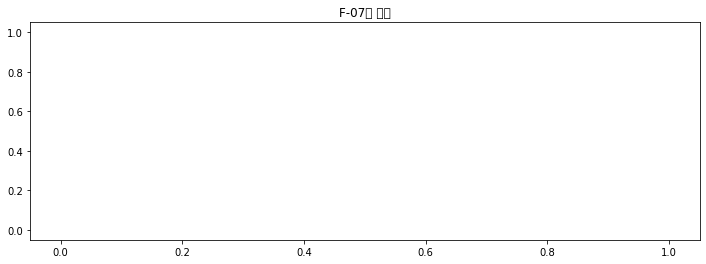

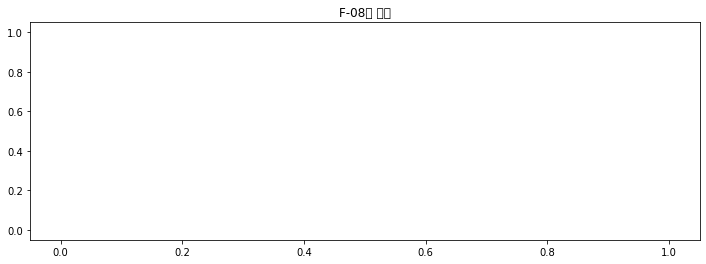

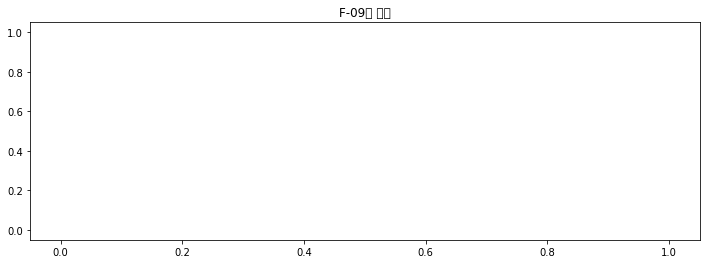

In [85]:
for idx in idxs:
    condition = tmp [tmp.index == idx]

    plt.figure(figsize = (12,4))

    plt.title(f'{idx}의 추세')
    plt.plot()
    plt.show()

In [91]:
tmp[tmp.index == 'A-01']

,2016년 01월,2016년 02월,2016년 03월,2016년 04월,2016년 05월,2016년 06월,2016년 07월,2016년 08월,2016년 09월,2016년 10월,...,2019년 09월,2019년 10월,2019년 11월,2019년 12월,2020년 01월,2020년 02월,2020년 03월,2020년 04월,2020년 05월,2020년 06월
,,,,,,,,,,,,,,,,,,,,,
A-01,1335.226588,1315.25088,1453.868356,1479.493929,1445.28241,1447.099416,1421.4643,1376.254627,1406.513287,1522.765833,...,1354.738194,1391.827957,1425.870139,1363.702285,1257.273522,1222.048851,1143.043011,1189.425,1229.462366,1297.075694


In [103]:
update_tmp = tmp.T

In [129]:
update_tmp.to_csv(f'C:/Users/guswj/Desktop/py_projects/Project_AirCleaning/data/month_mean_forplot.csv',encoding='cp949',sep=',')

In [111]:
cols = update_tmp.columns

In [117]:
from matplotlib import rcParams

In [125]:
# 한글 처리 (코랩에서와 로컬PC(윈,맥,리)와 조금 다름)
import matplotlib as mpl
import matplotlib.pyplot as plt

# 코랩에서만 추가되는 부분
%config InlineBackend.figure_format = 'retina'

In [128]:
import mplcursors

ModuleNotFoundError: No module named 'mplcursors'

In [127]:
# 한글 처리
%matplotlib inline
from korean_font import initKoreaFont
import matplotlib.pyplot as plt
initKoreaFont()

ImportError: cannot import name 'initKoreaFont' from 'korean_font' (C:\Users\guswj\Desktop\py_projects\Project_AirCleaning\korean_font.py)

a


C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53685 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\guswj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47049 missing from c

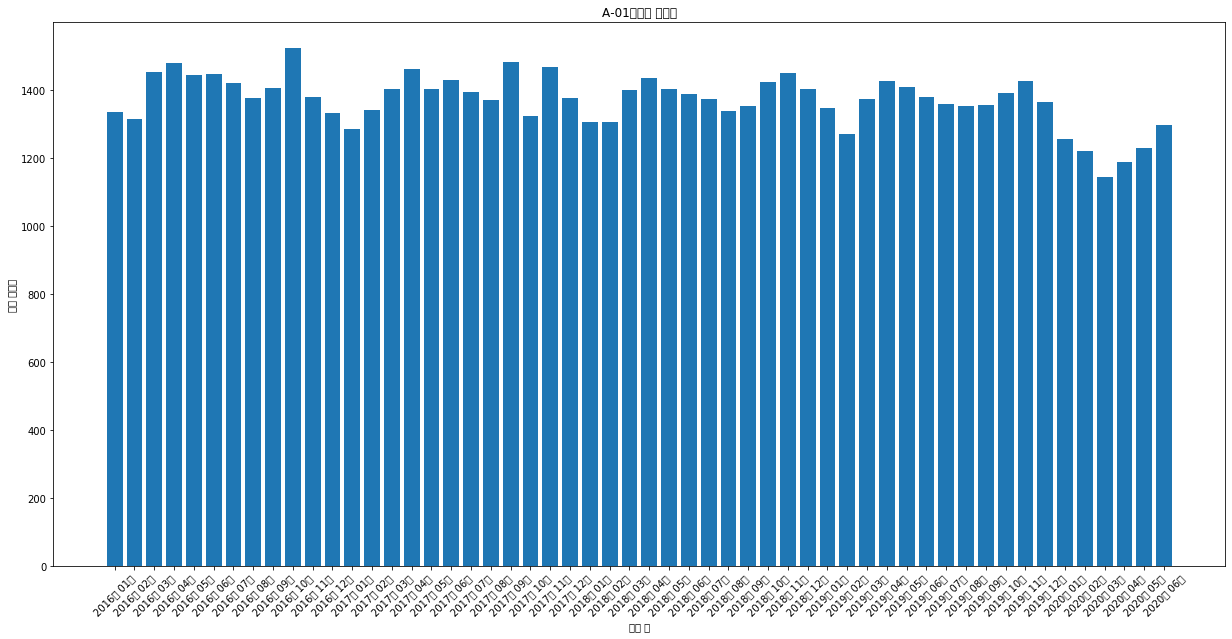

In [119]:
    plt.figure(figsize=(21,10))
    plt.bar(update_tmp.index,update_tmp['A-01'])
    print('a')
    
    plt.xlabel('측정 월')
    plt.ylabel('유동 교통량')
    # 제목
    plt.title('A-01지점의 교통량')
    plt.xticks(rotation=45)
    plt.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


a


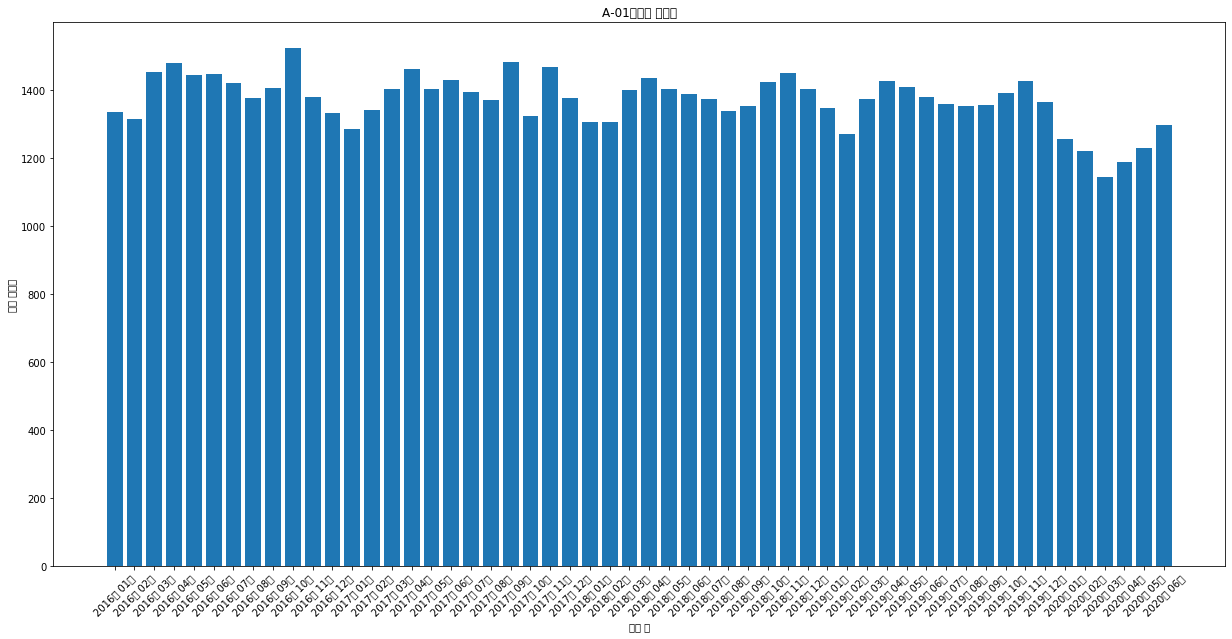

a


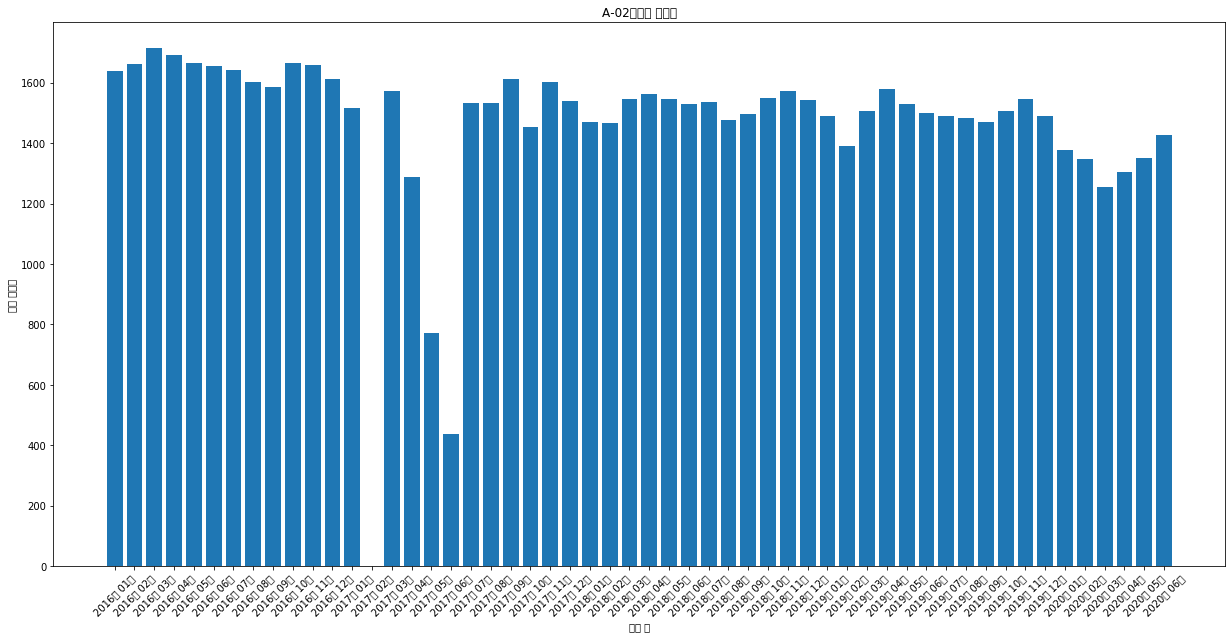

a


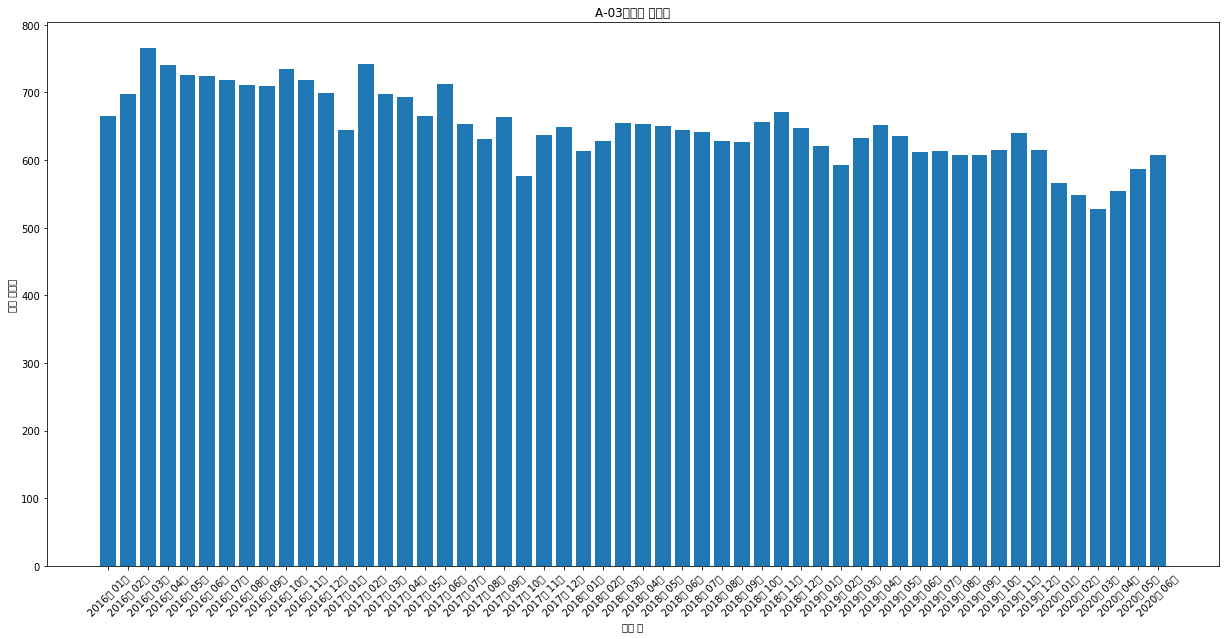

a


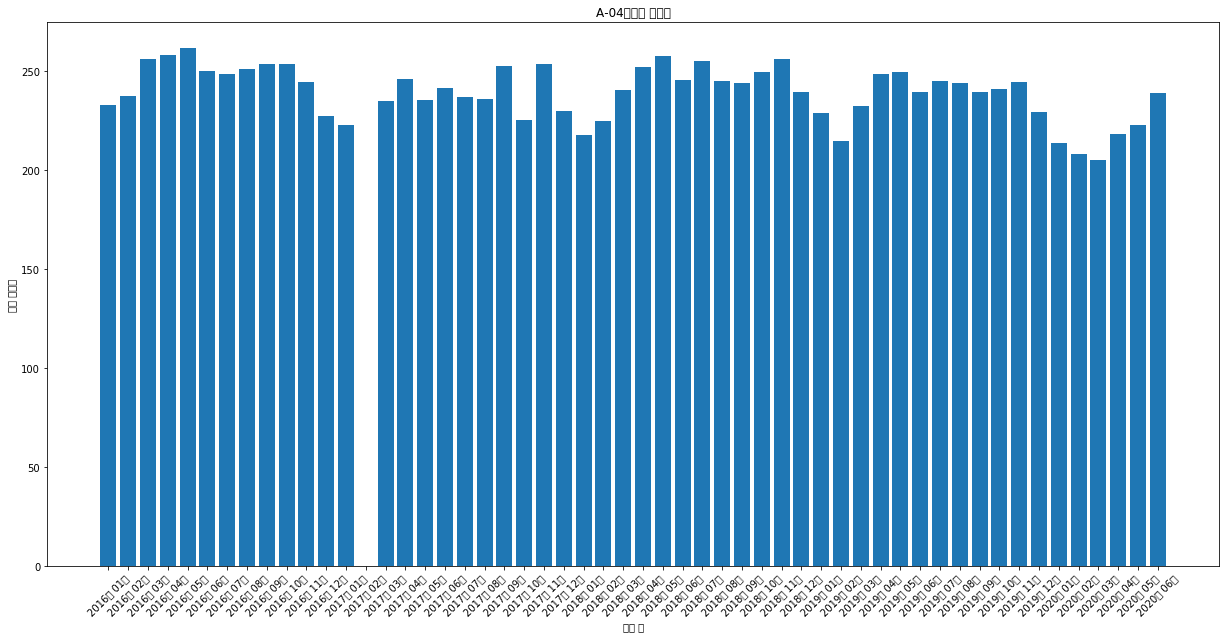

a


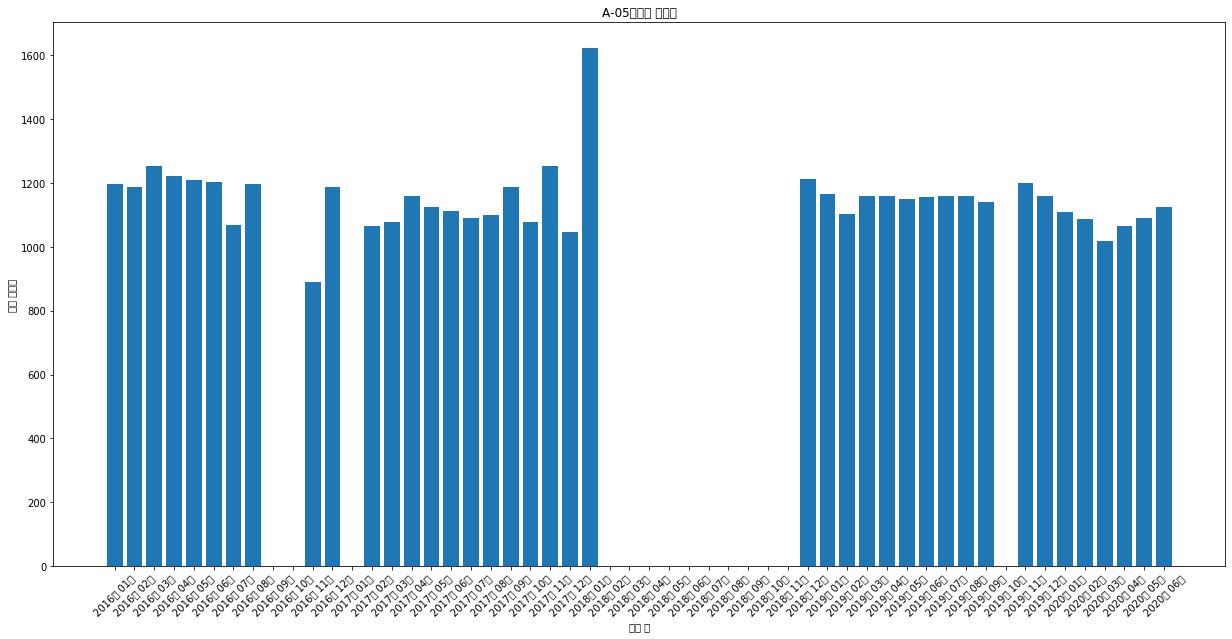

a


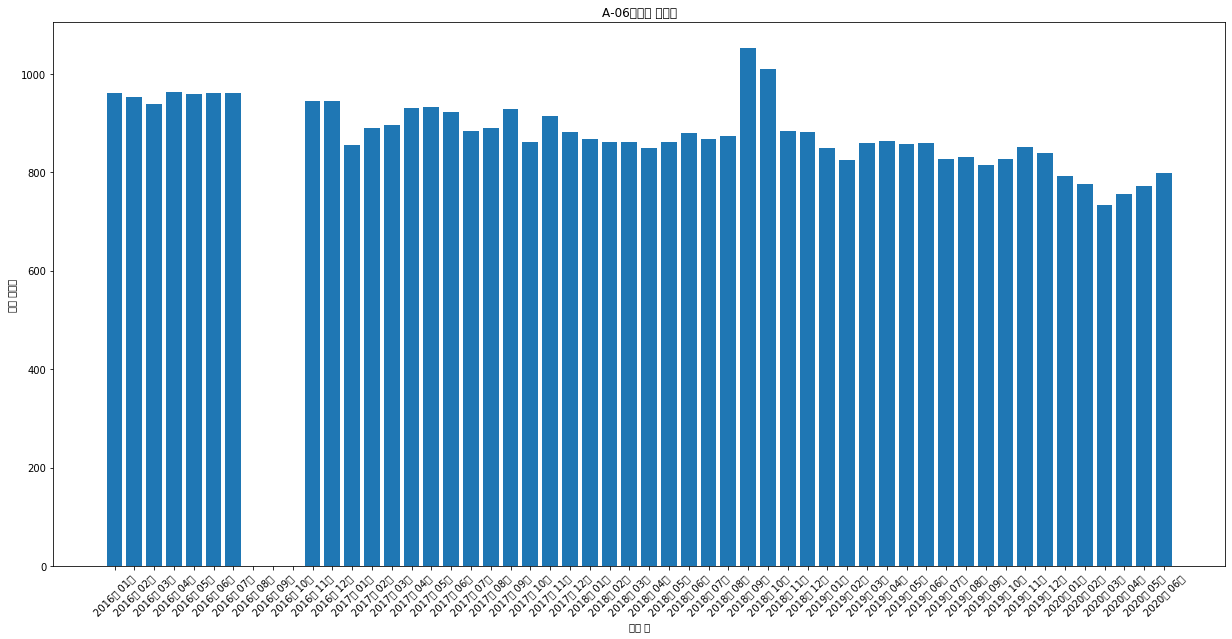

a


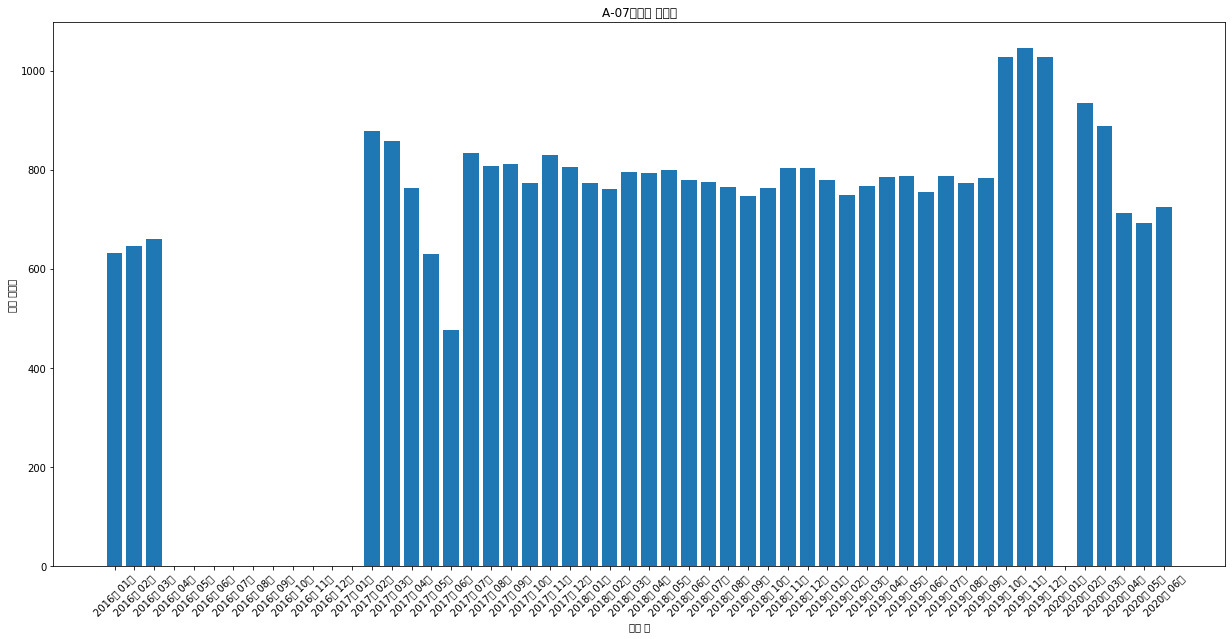

a


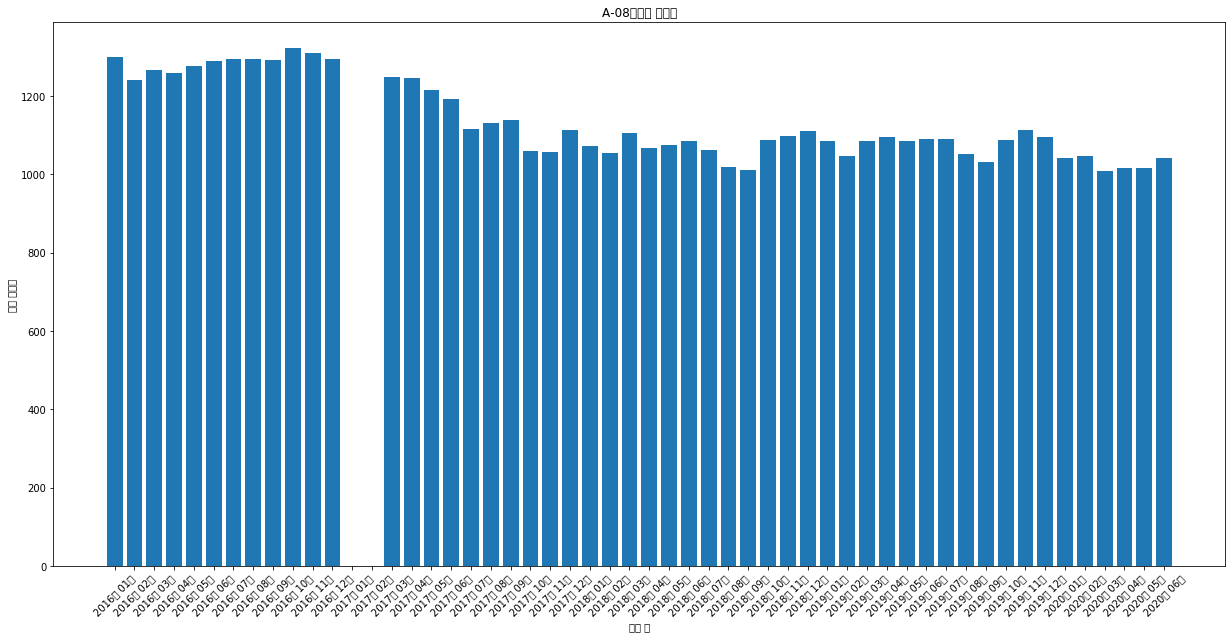

a


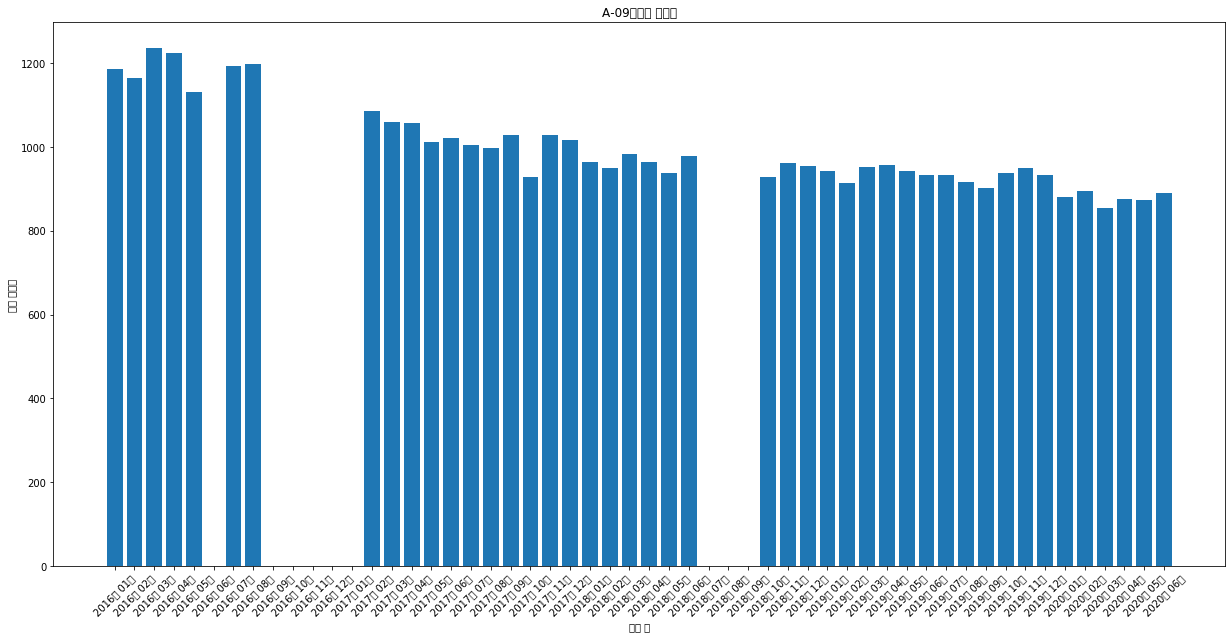

a


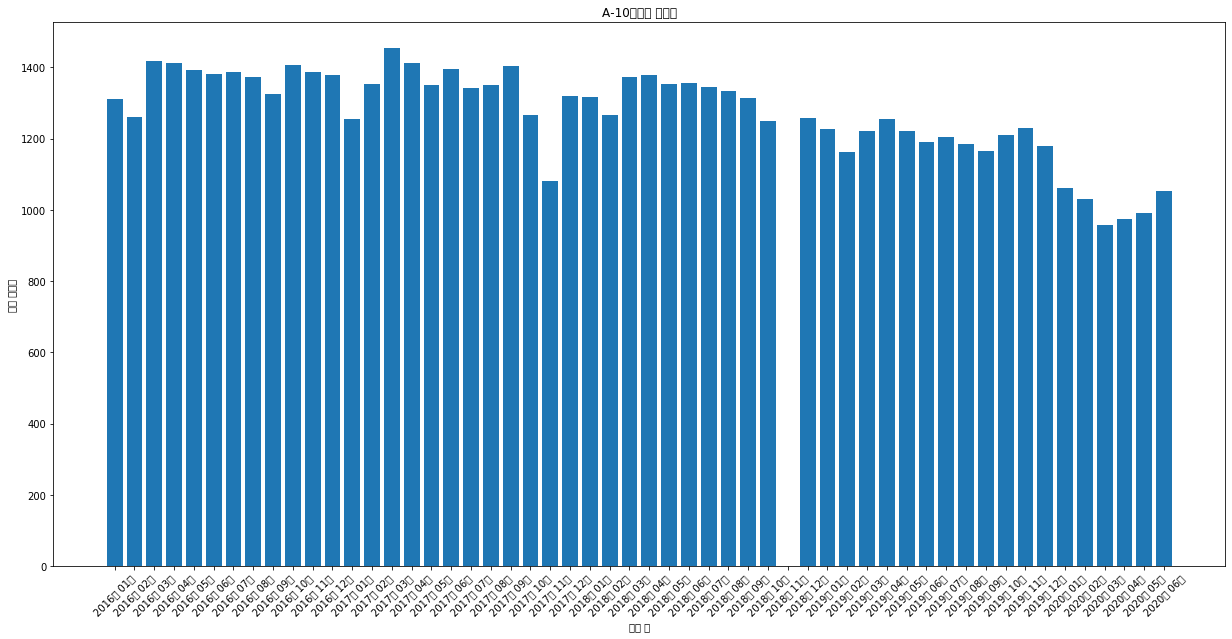

a


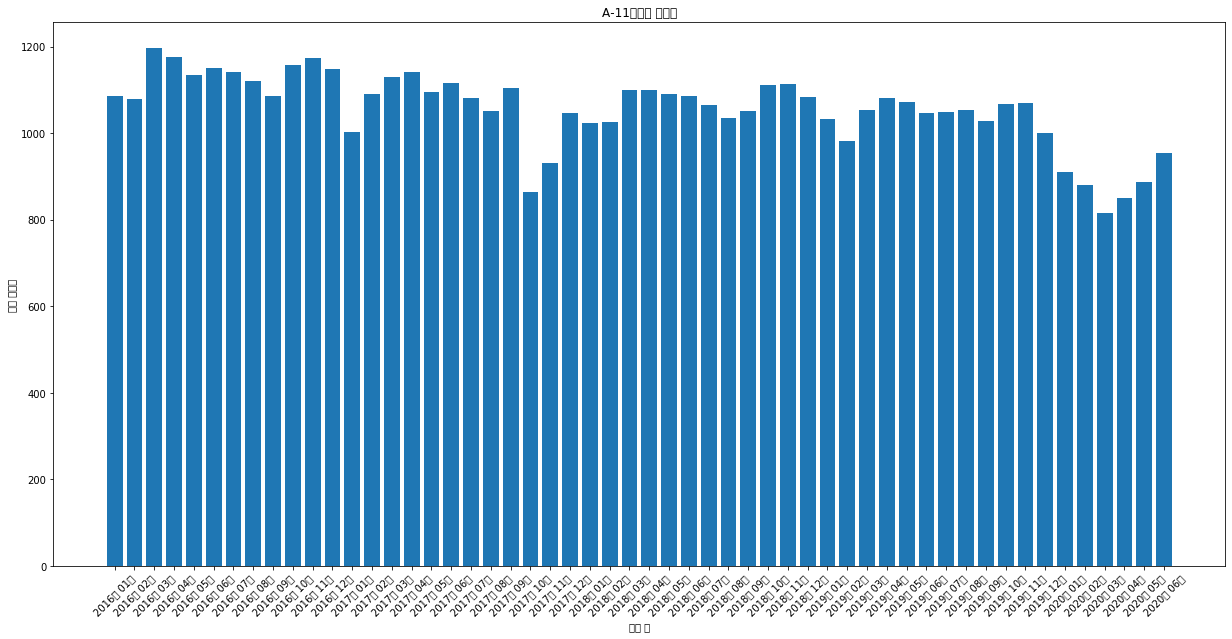

a


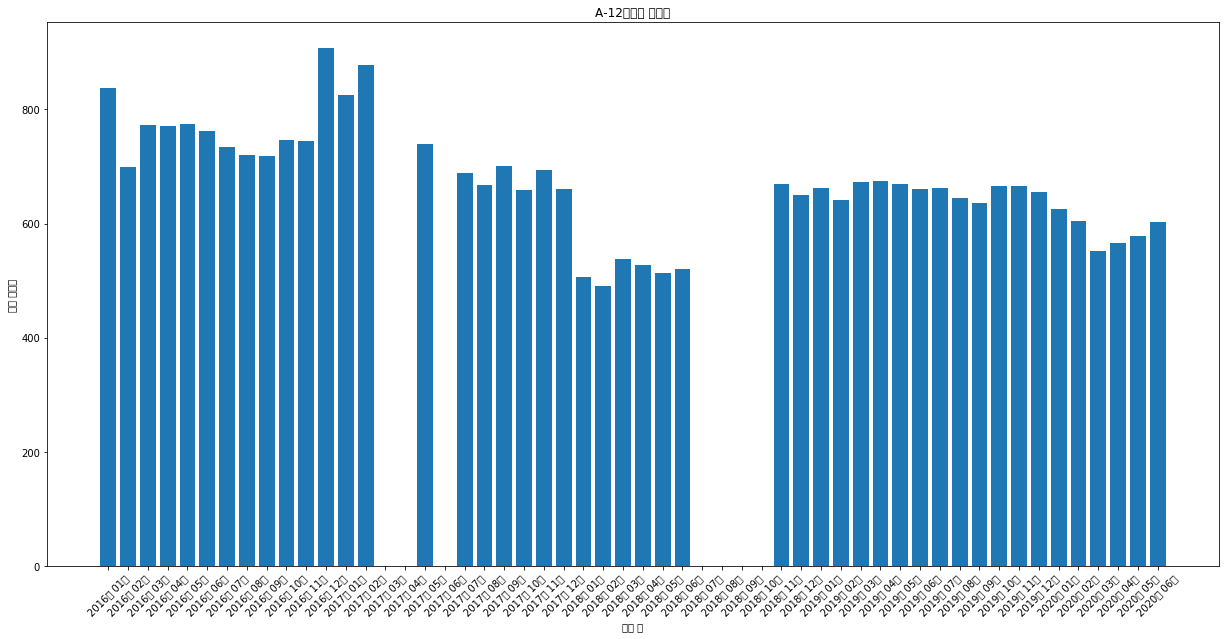

a


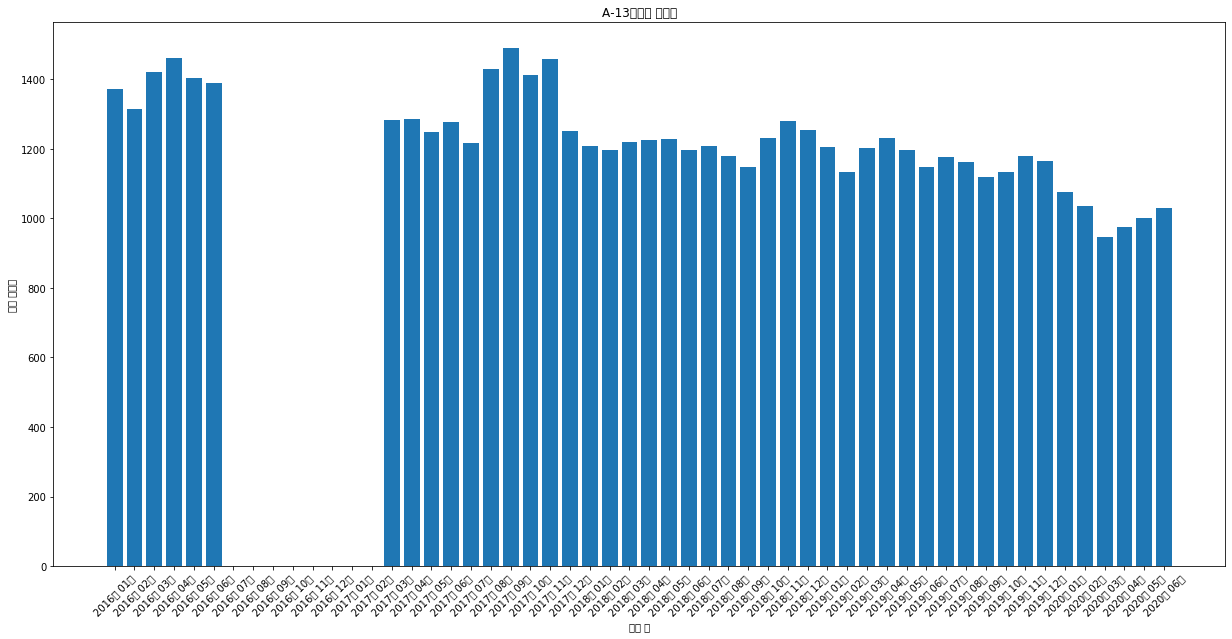

a


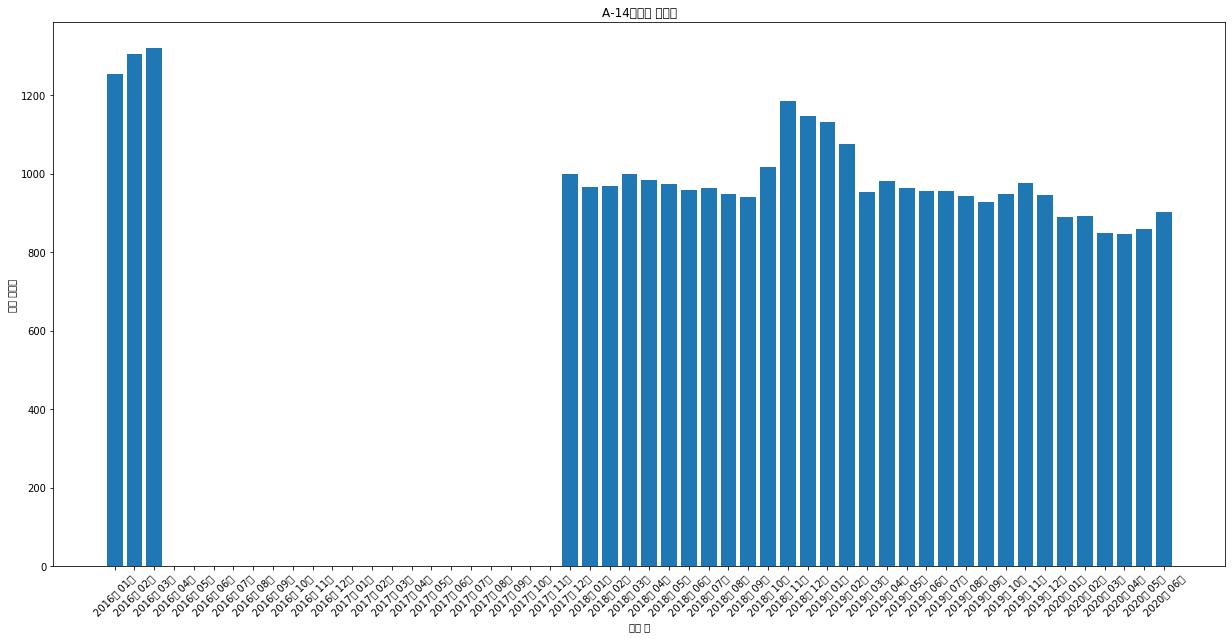

a


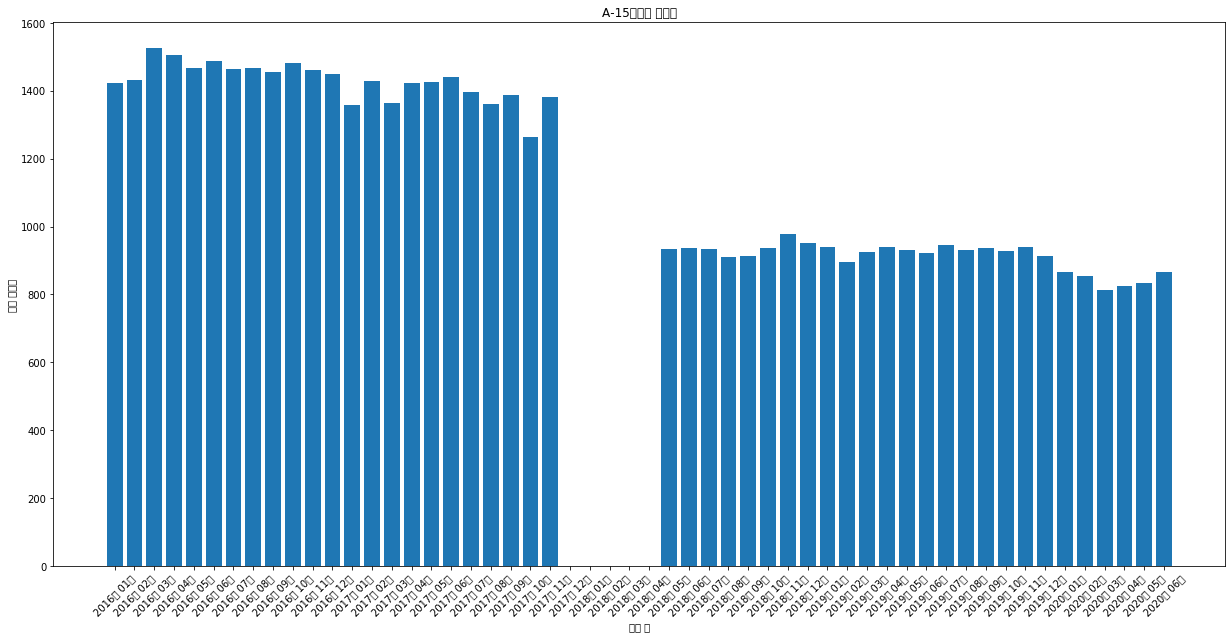

a


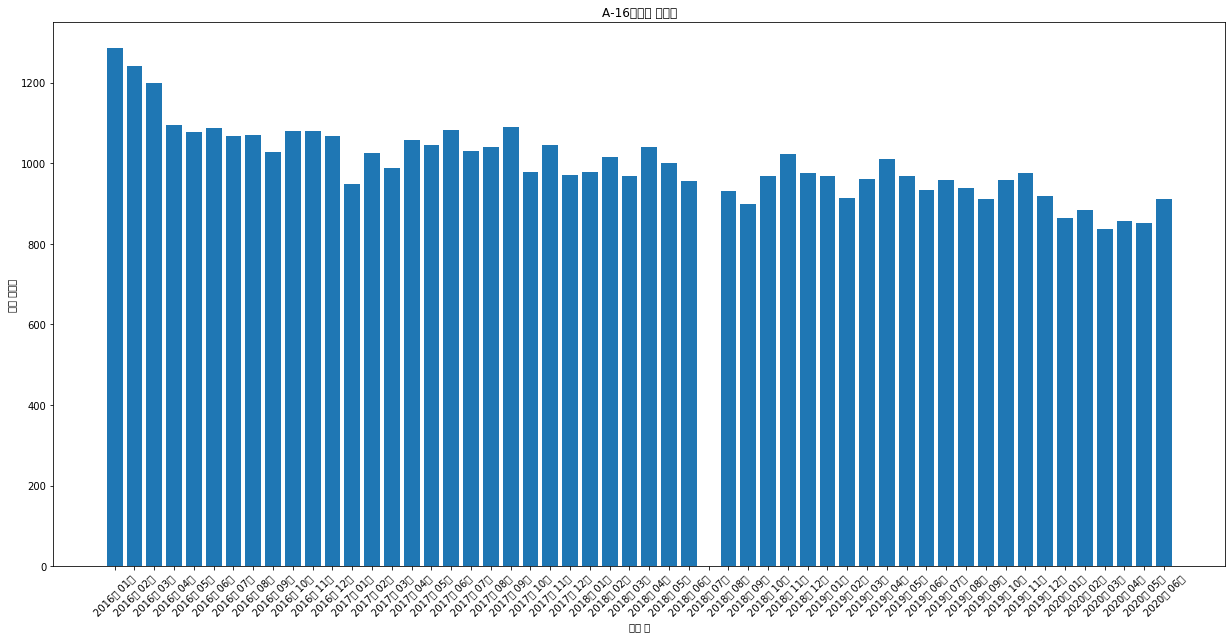

a


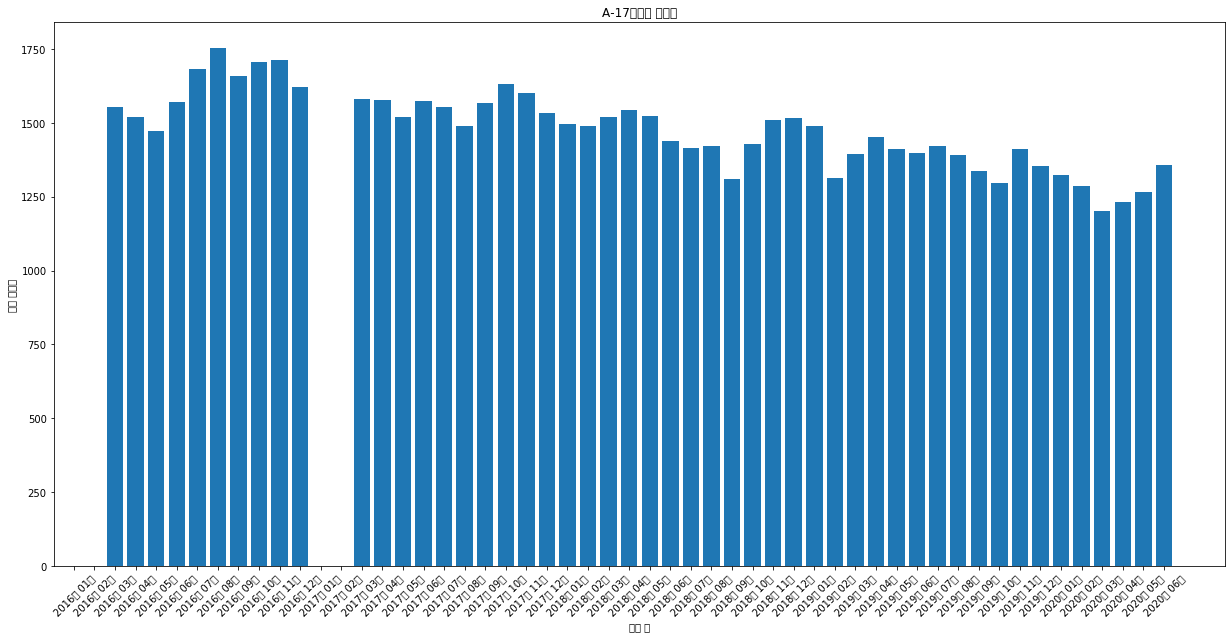

a


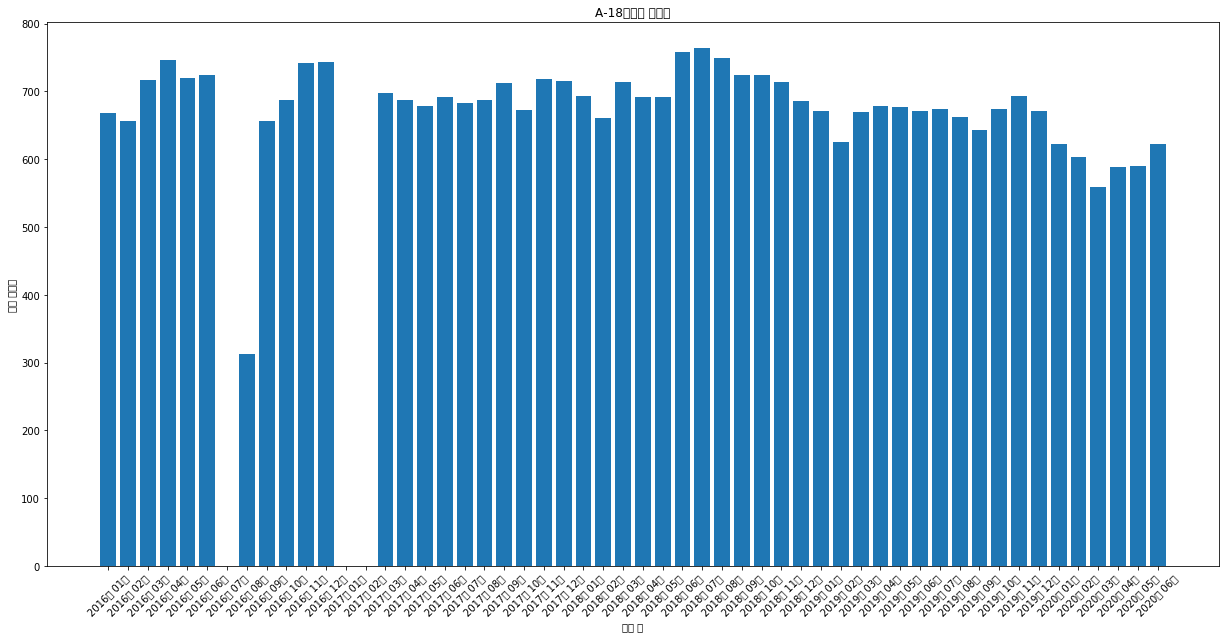

a


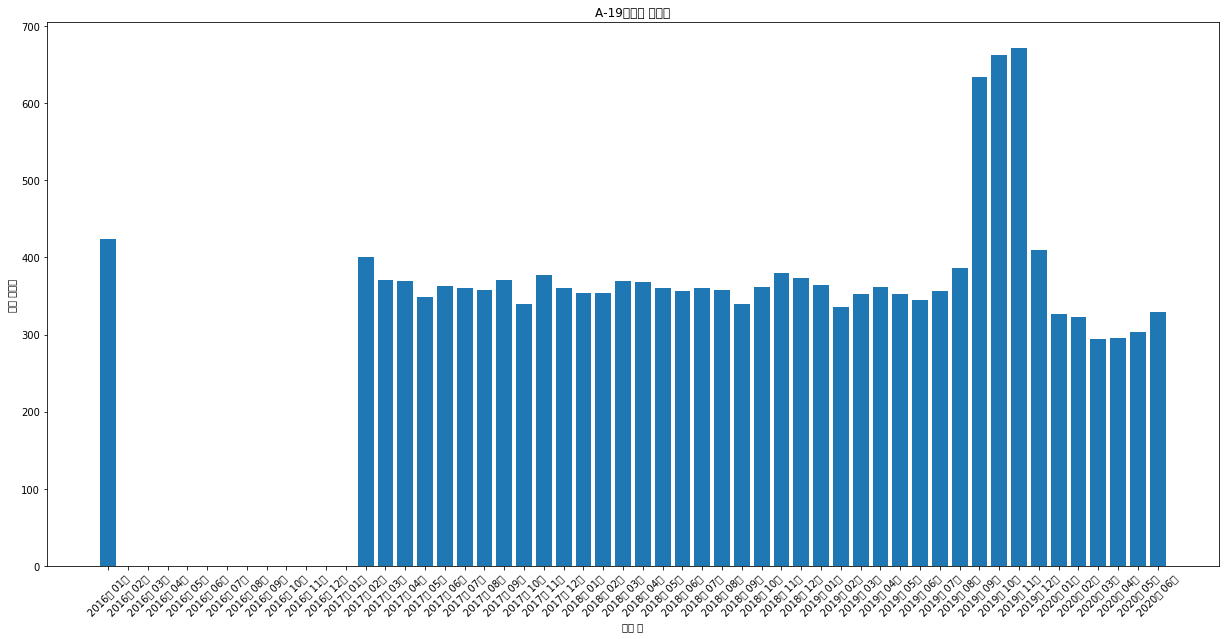

a


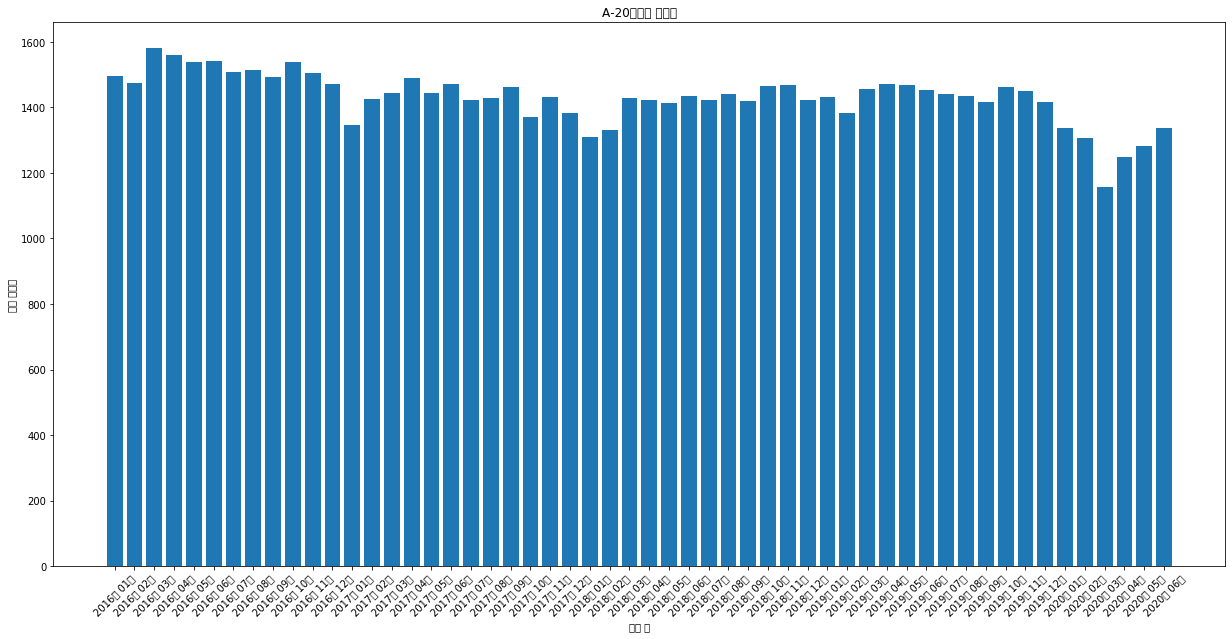

a


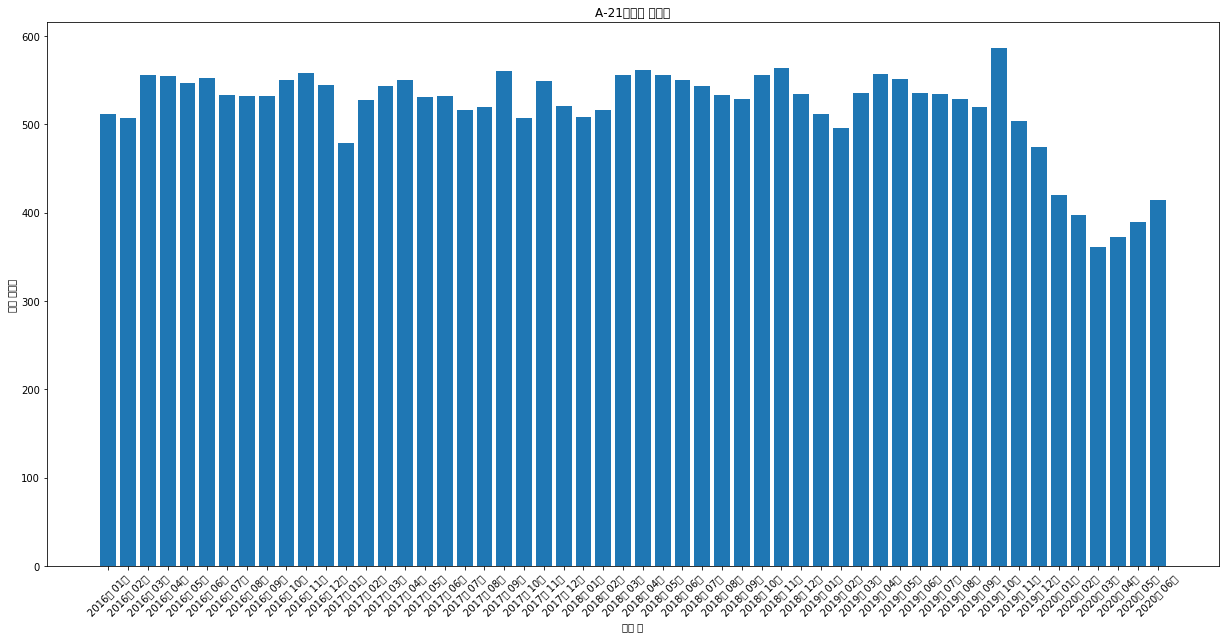

a


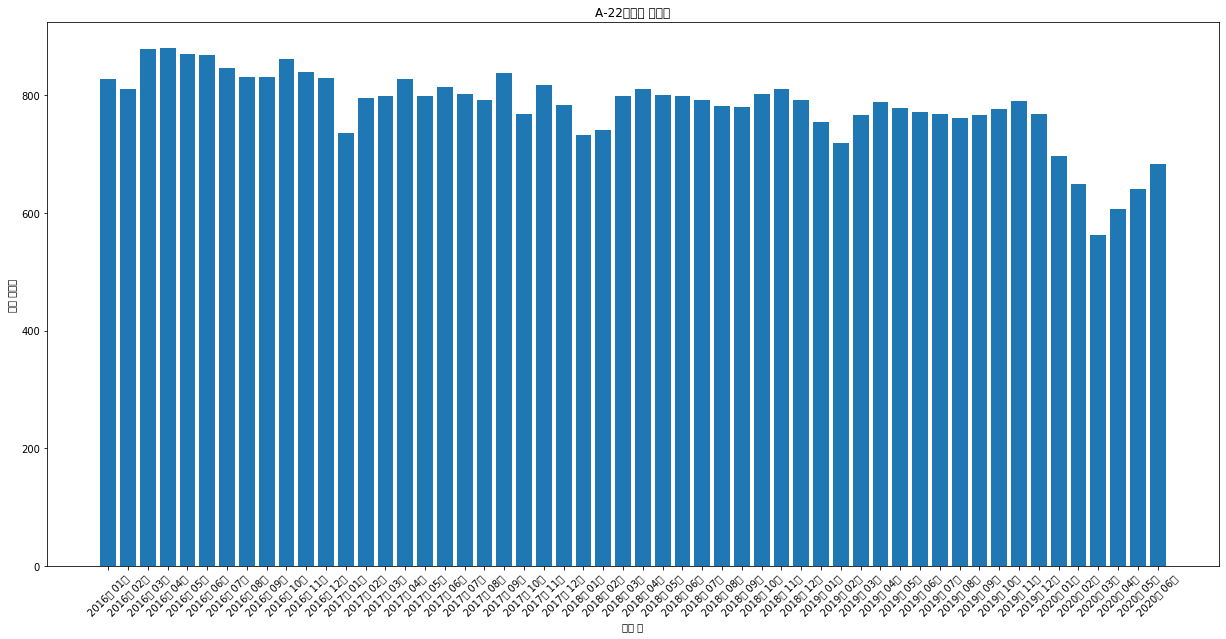

a


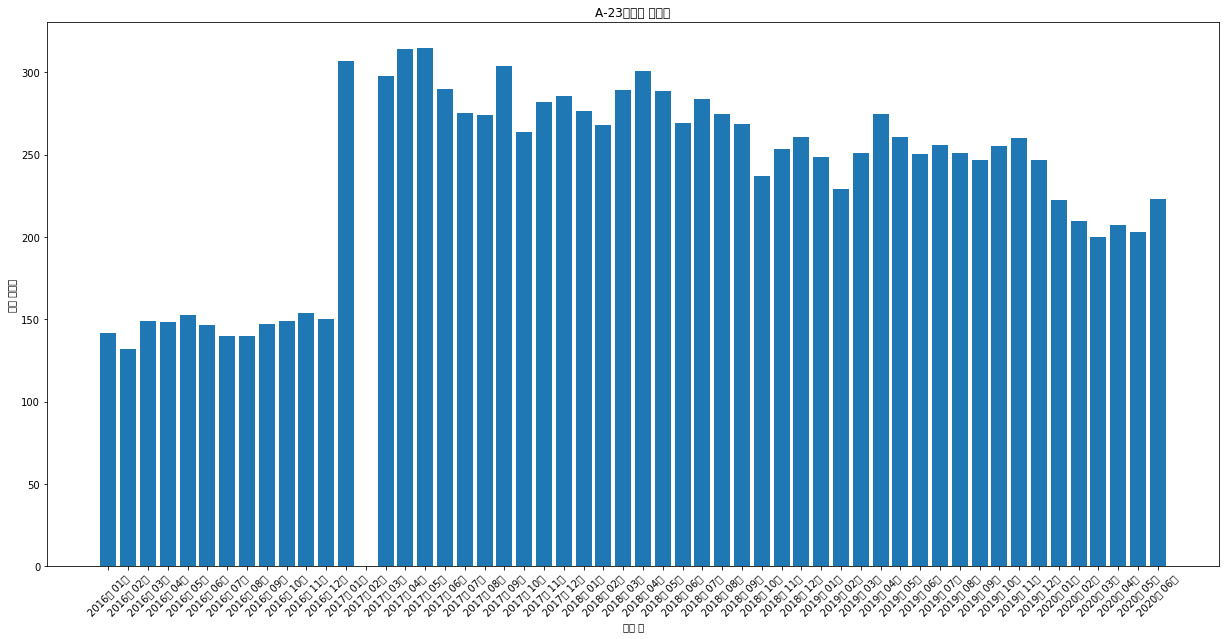

a


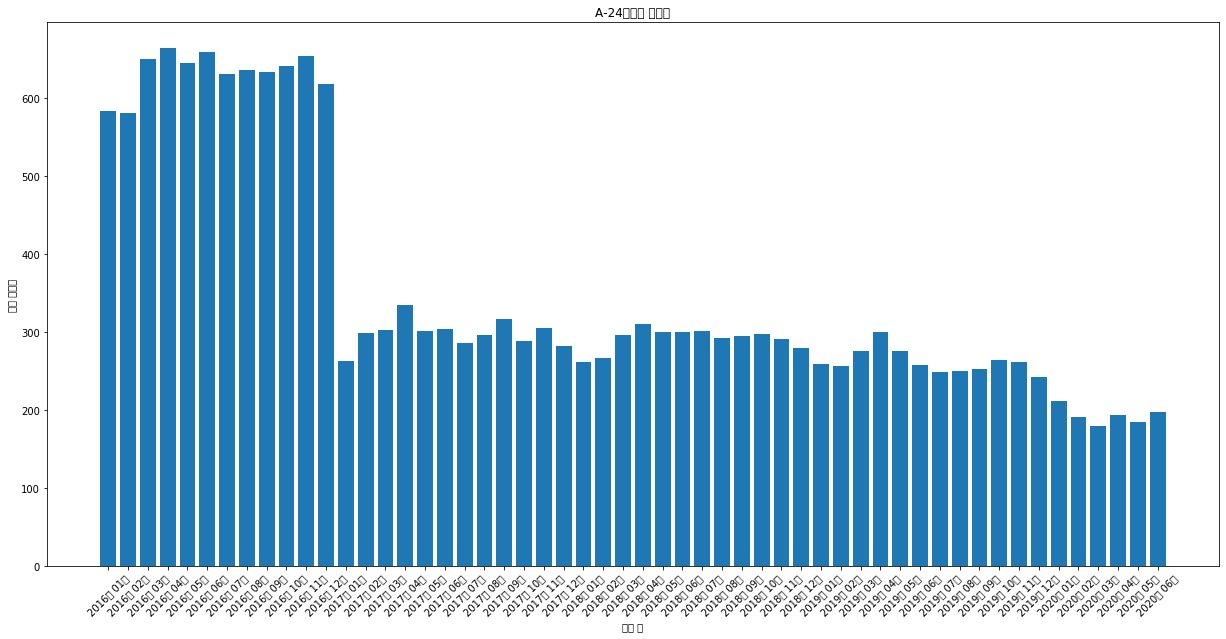

a


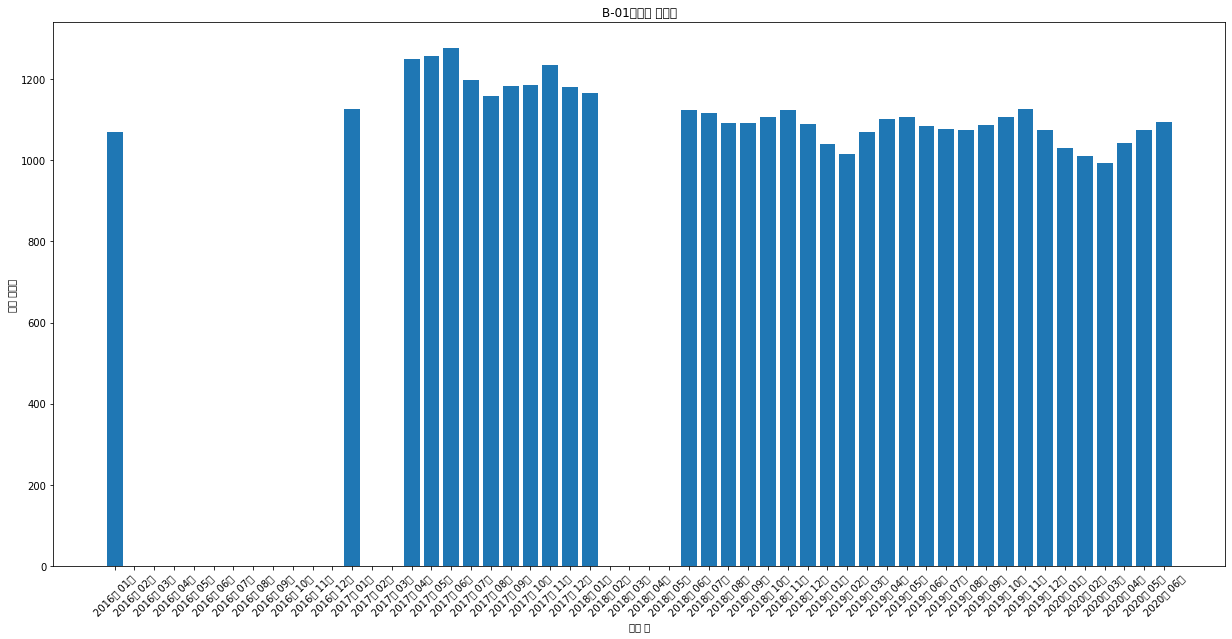

a


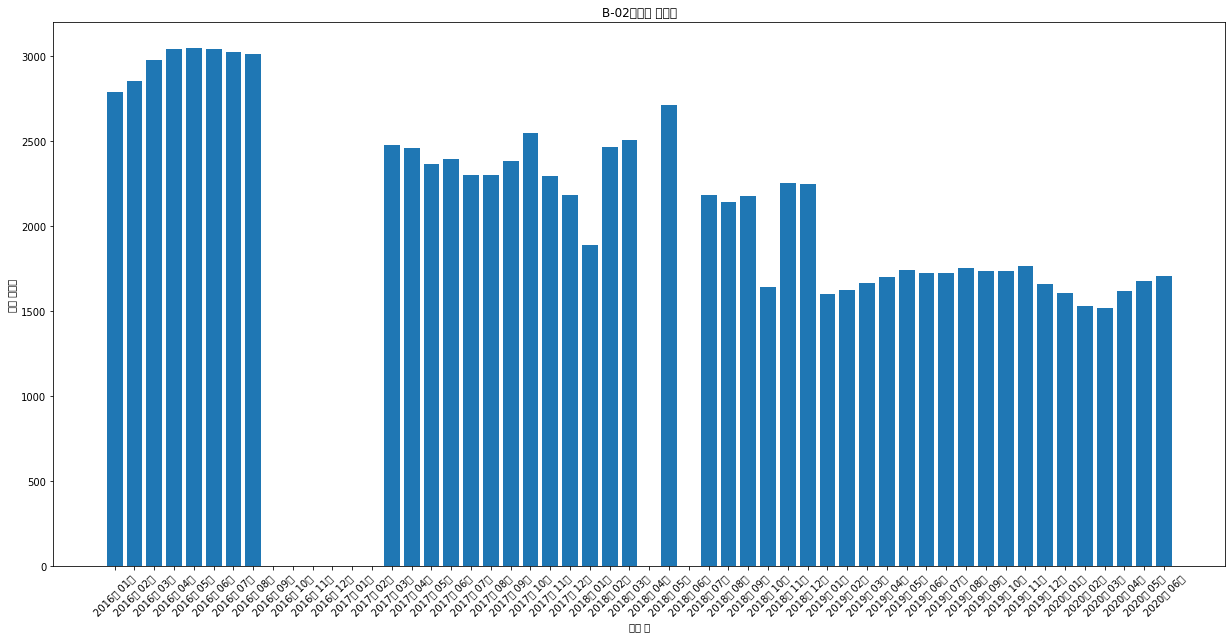

a


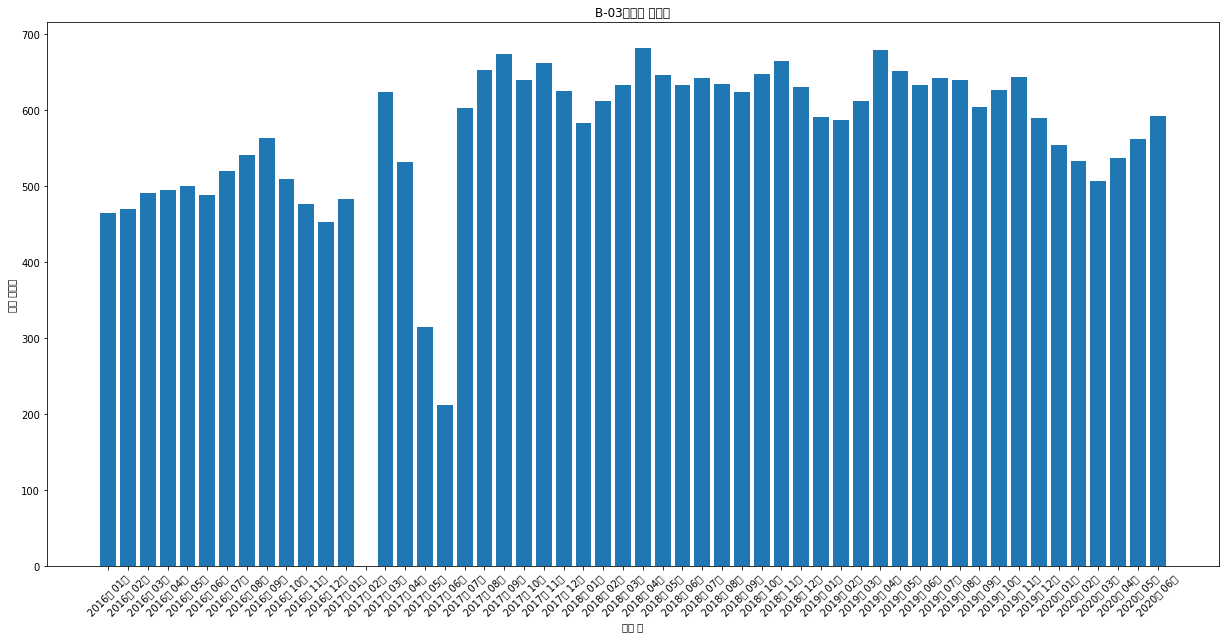

a


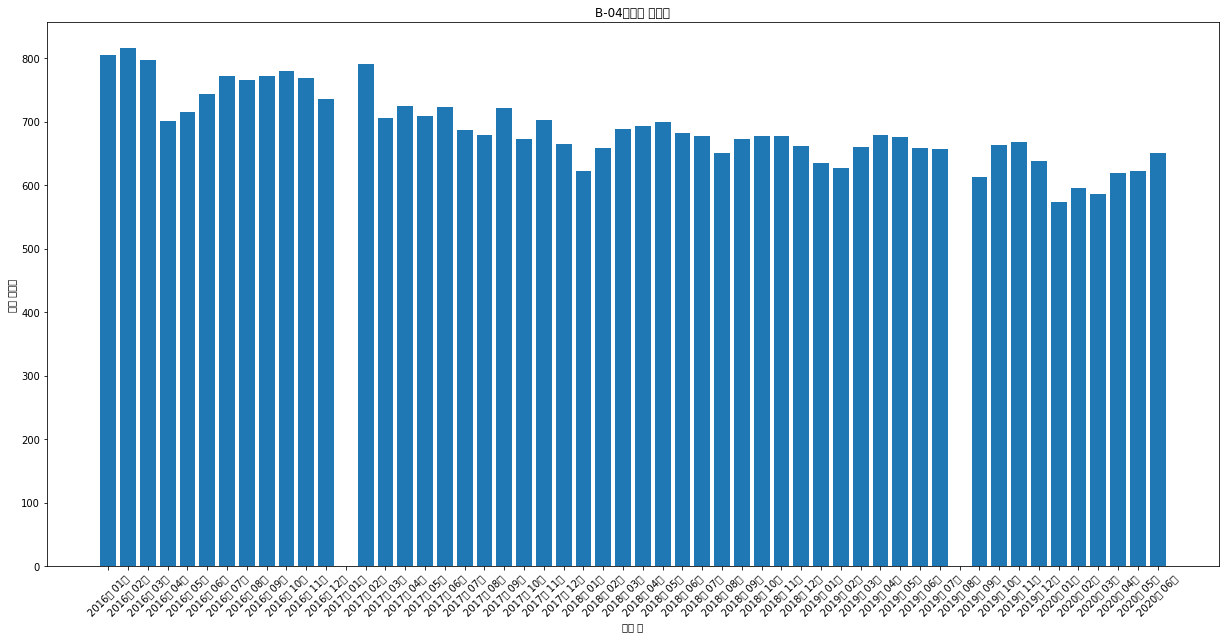

a


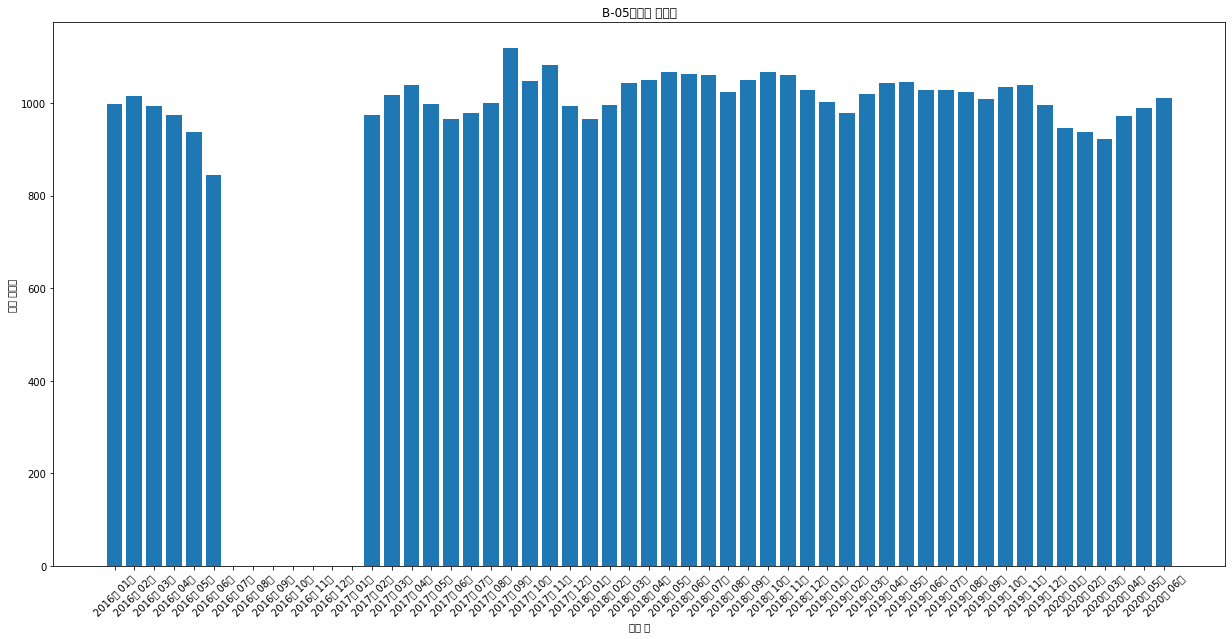

a


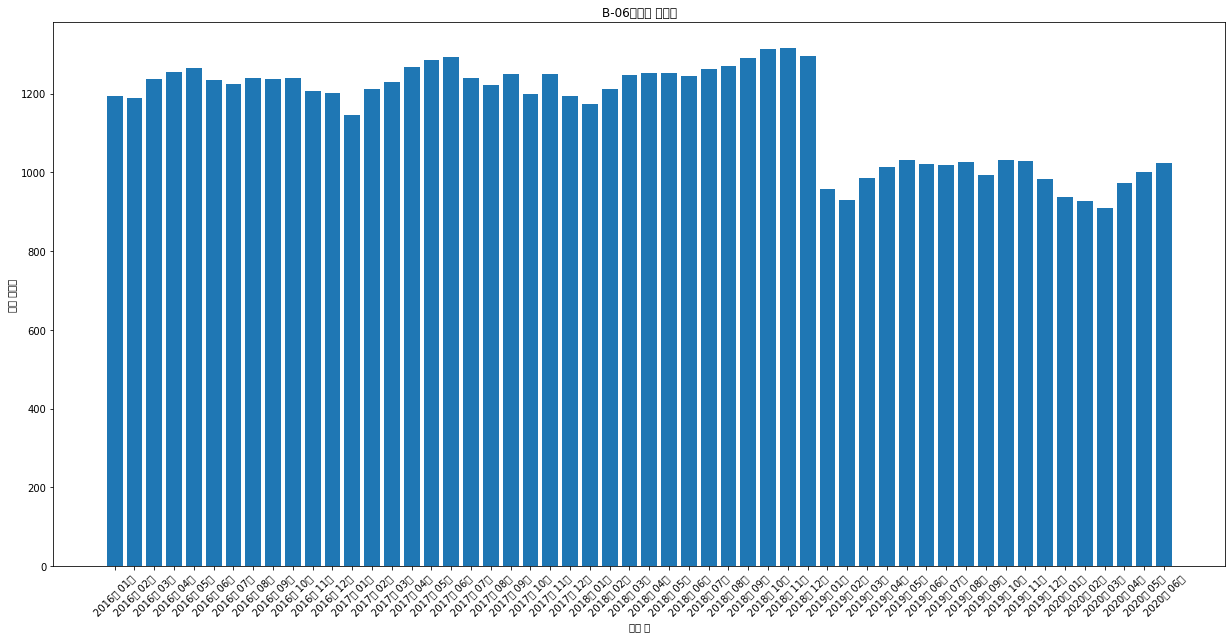

a


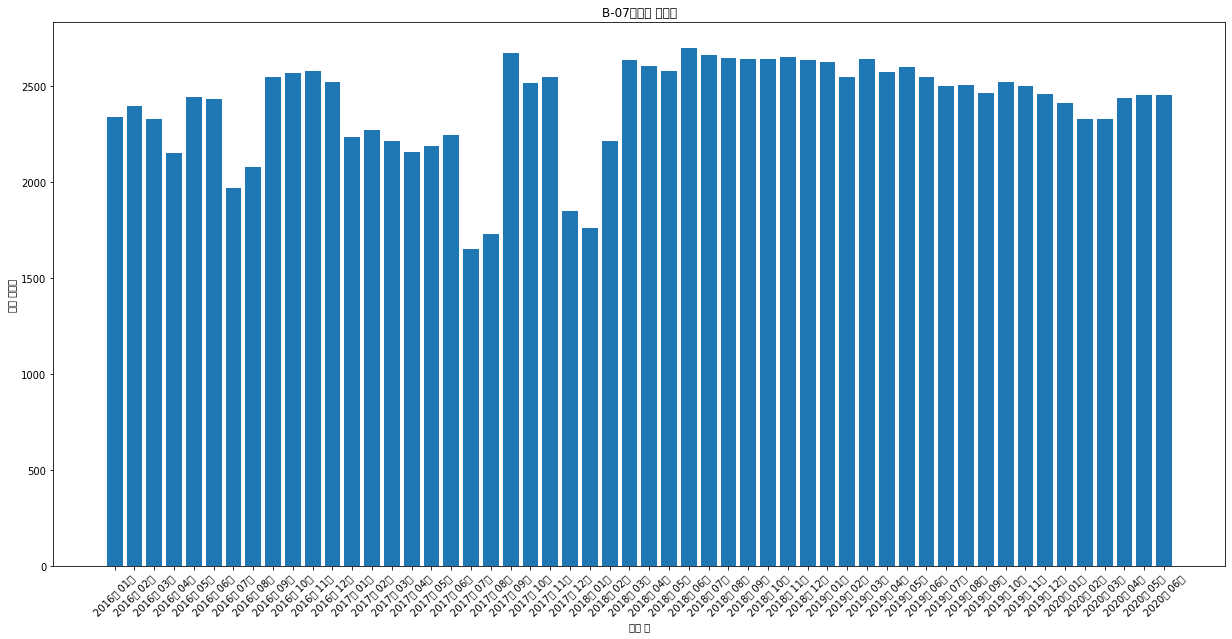

a


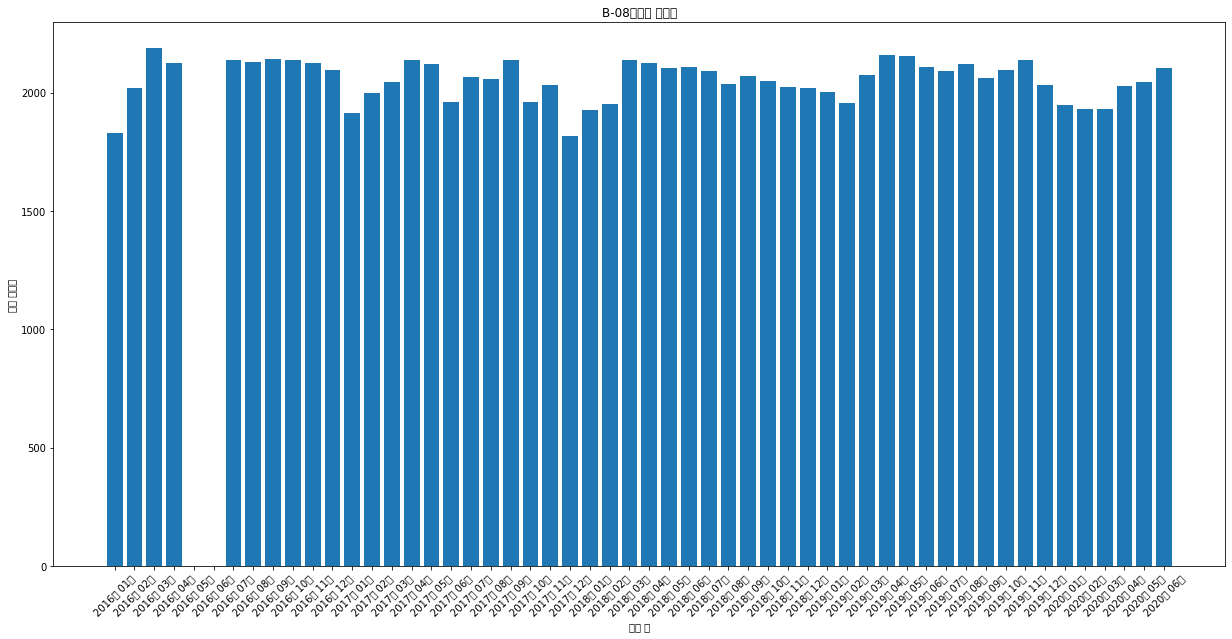

a


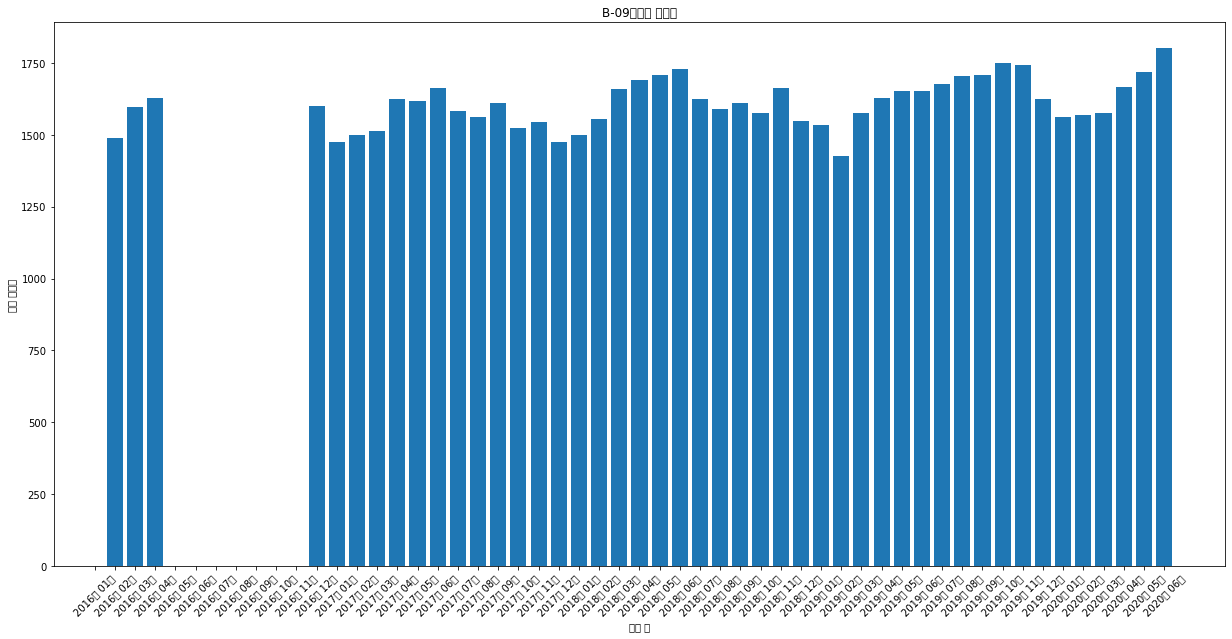

a


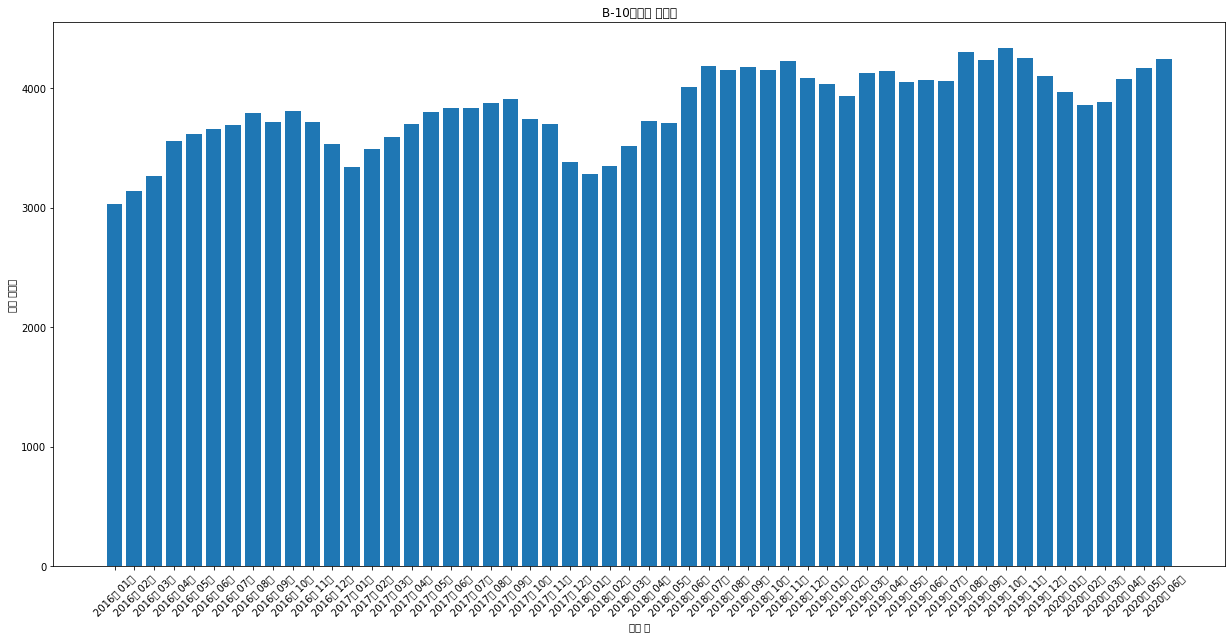

a


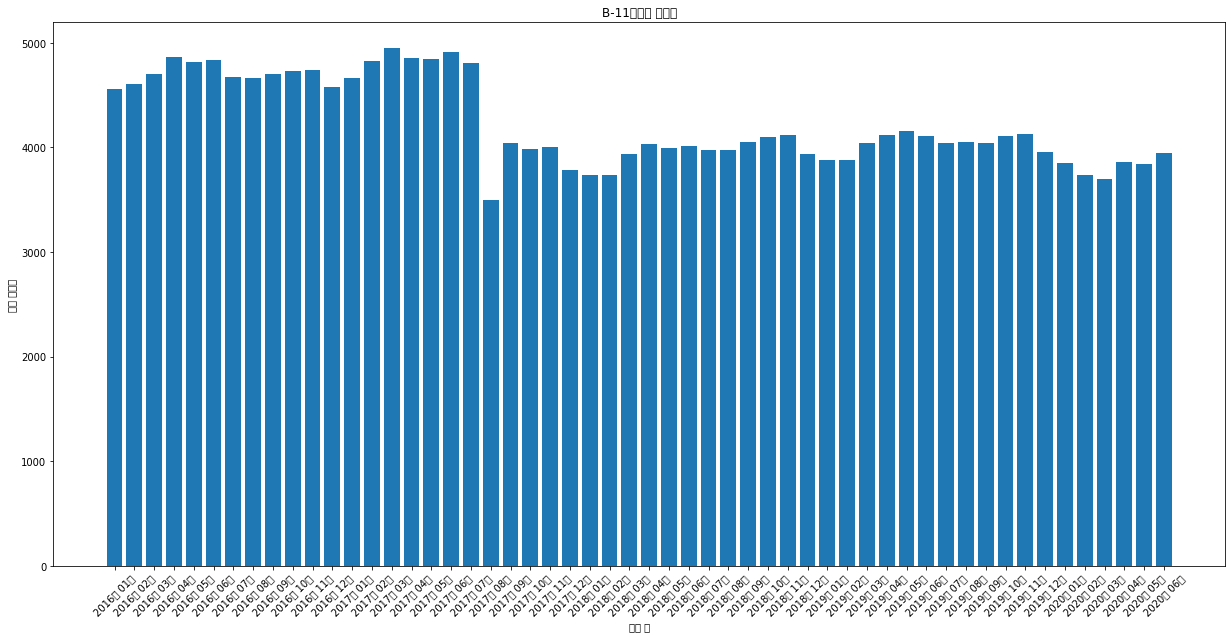

a


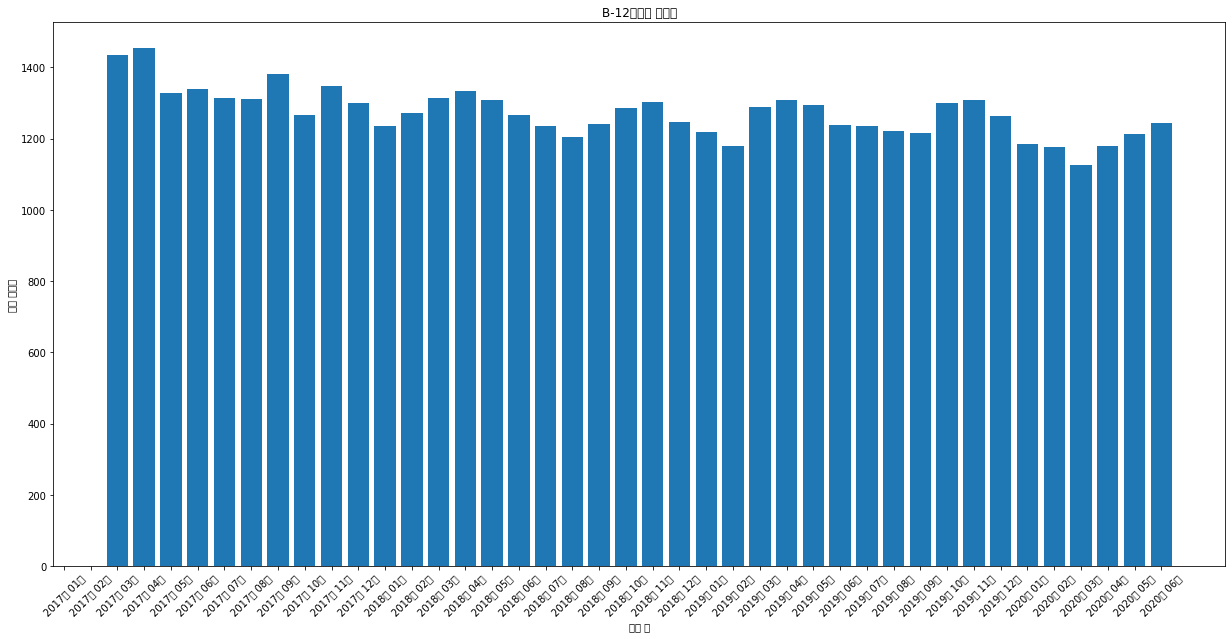

a


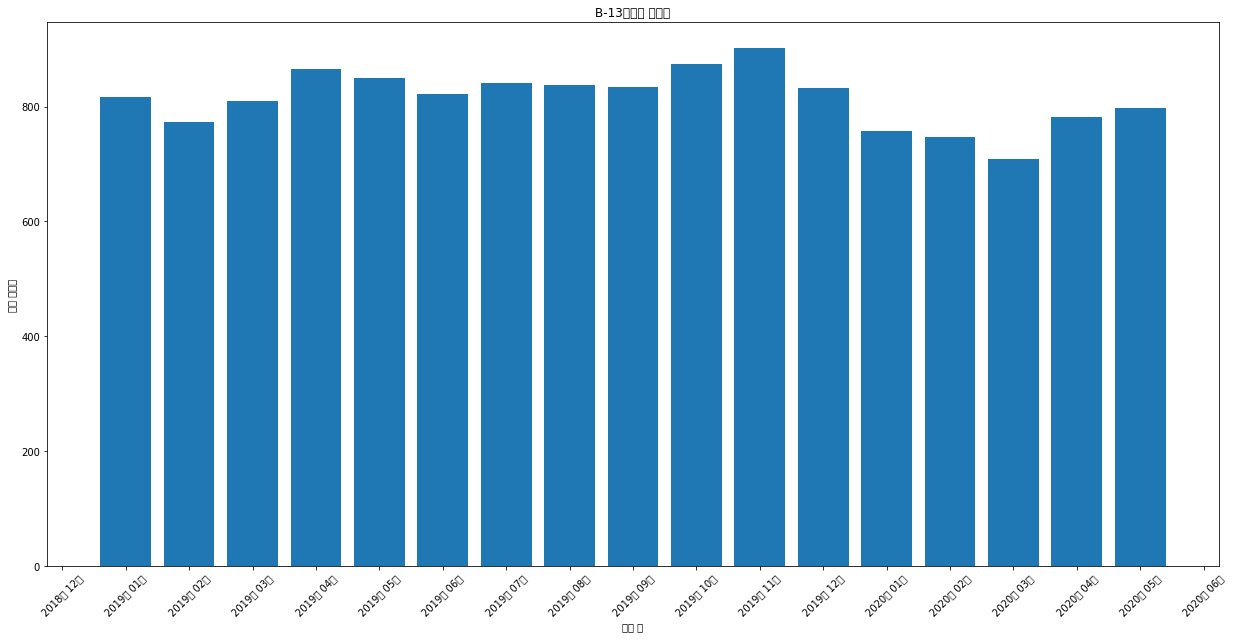

a


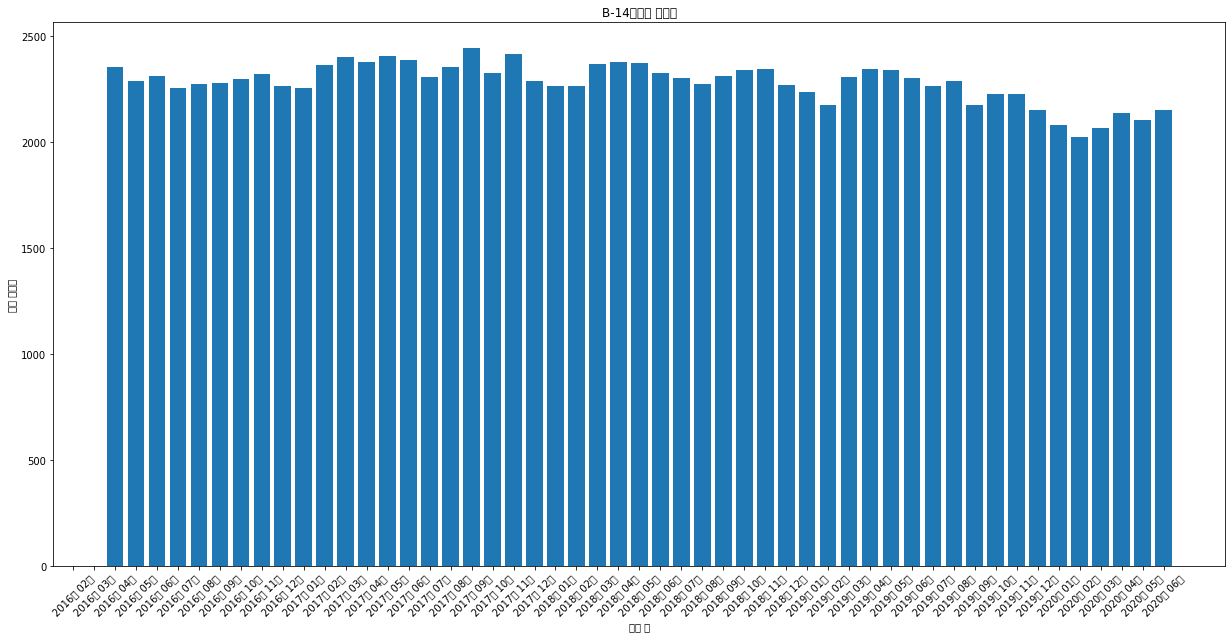

a


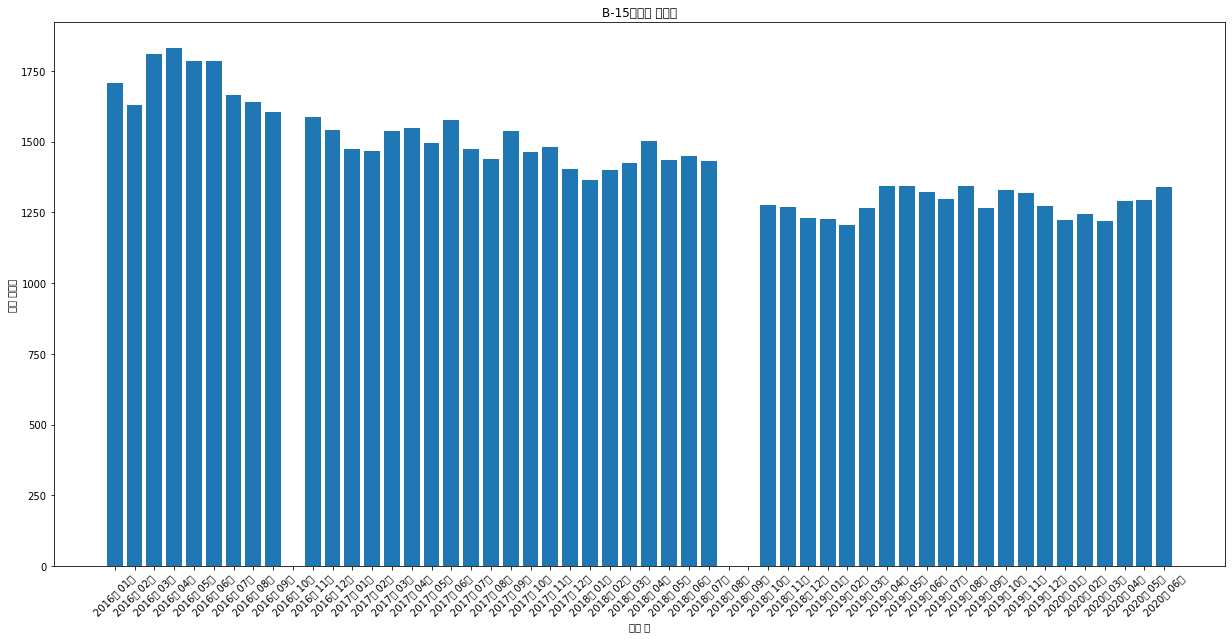

a


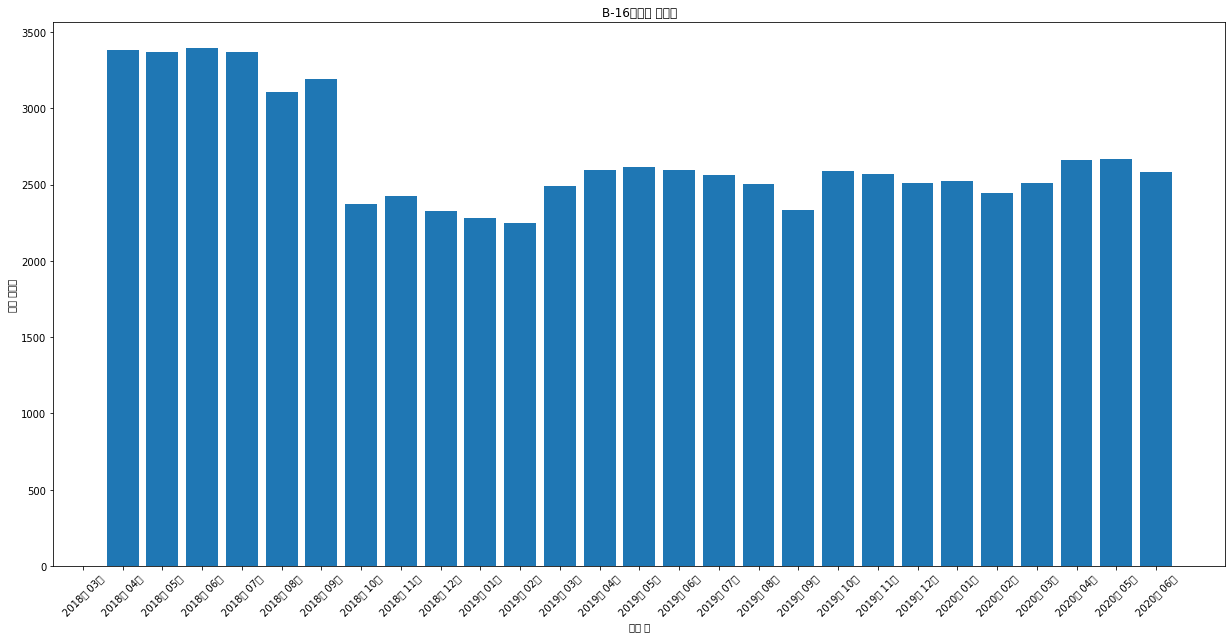

a


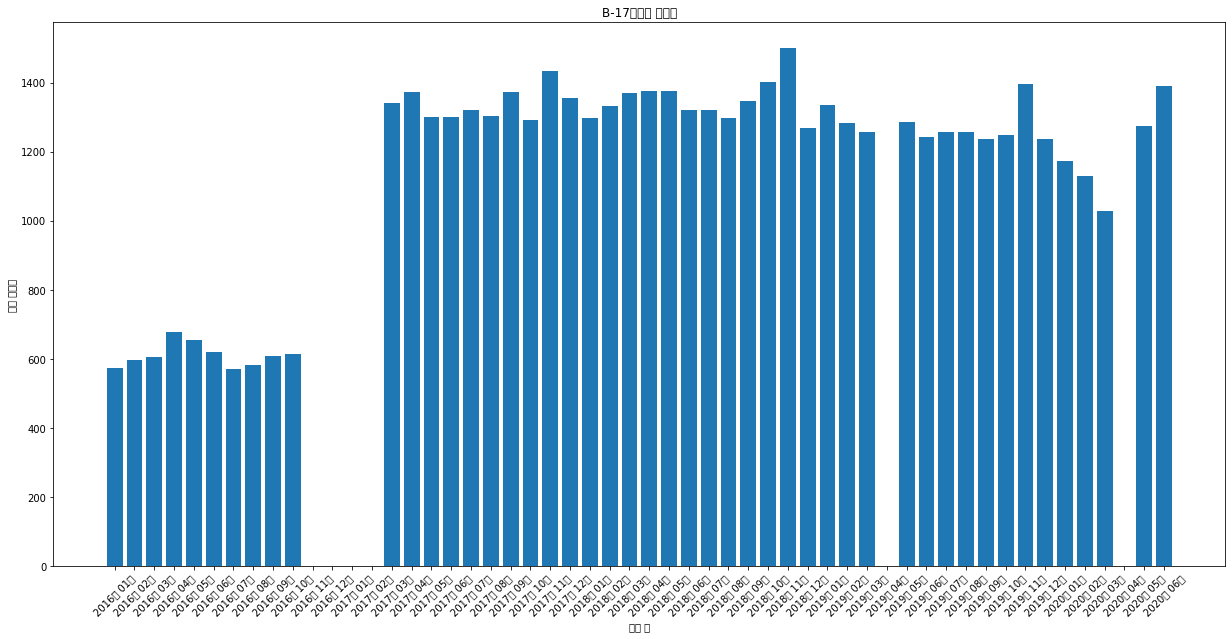

a


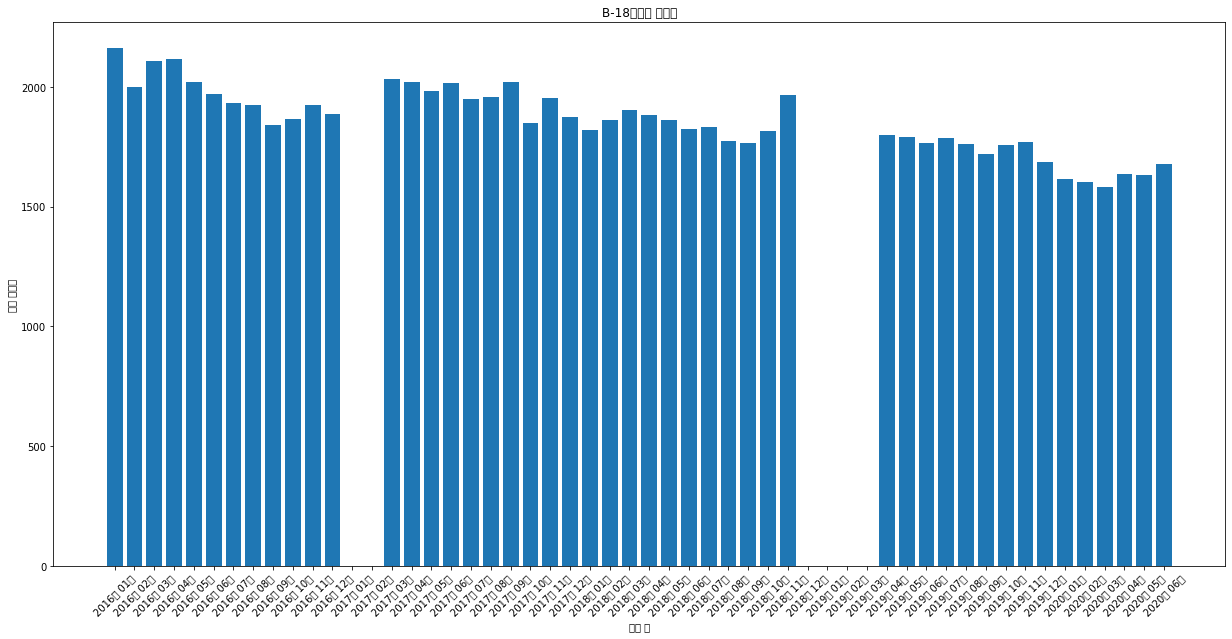

a


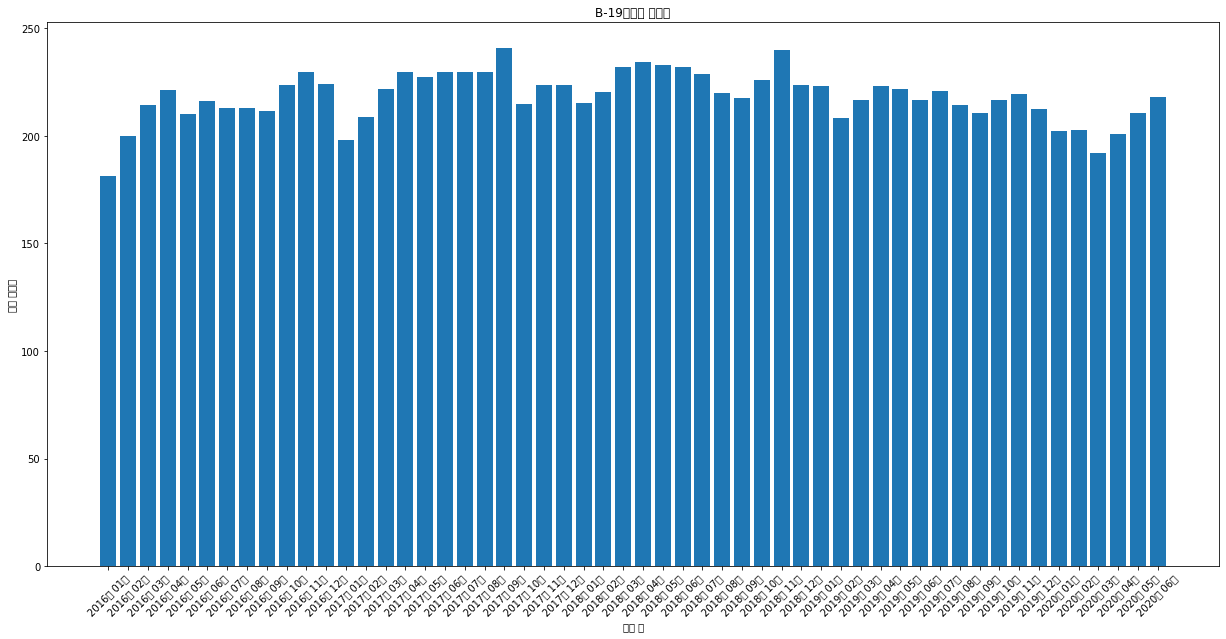

a


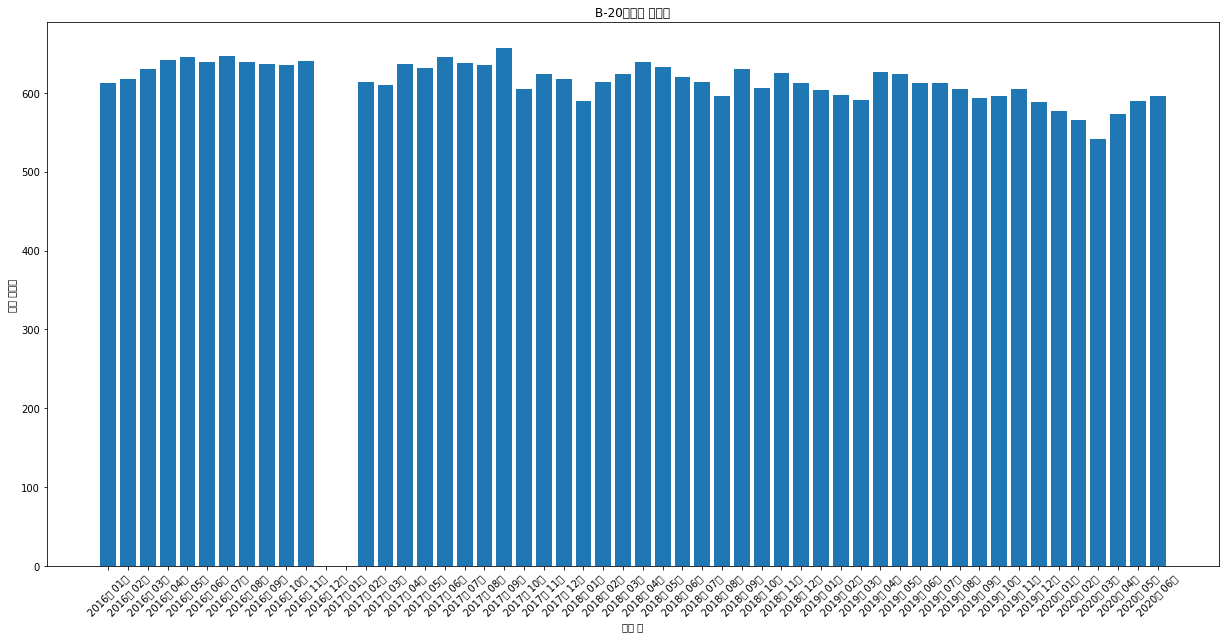

a


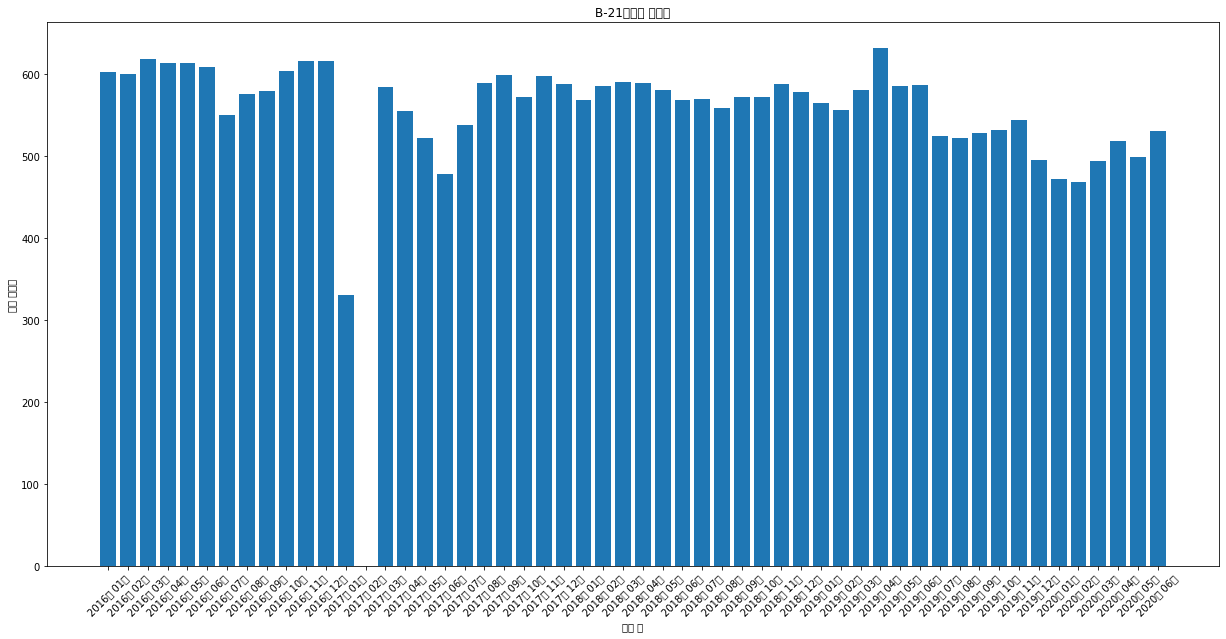

a


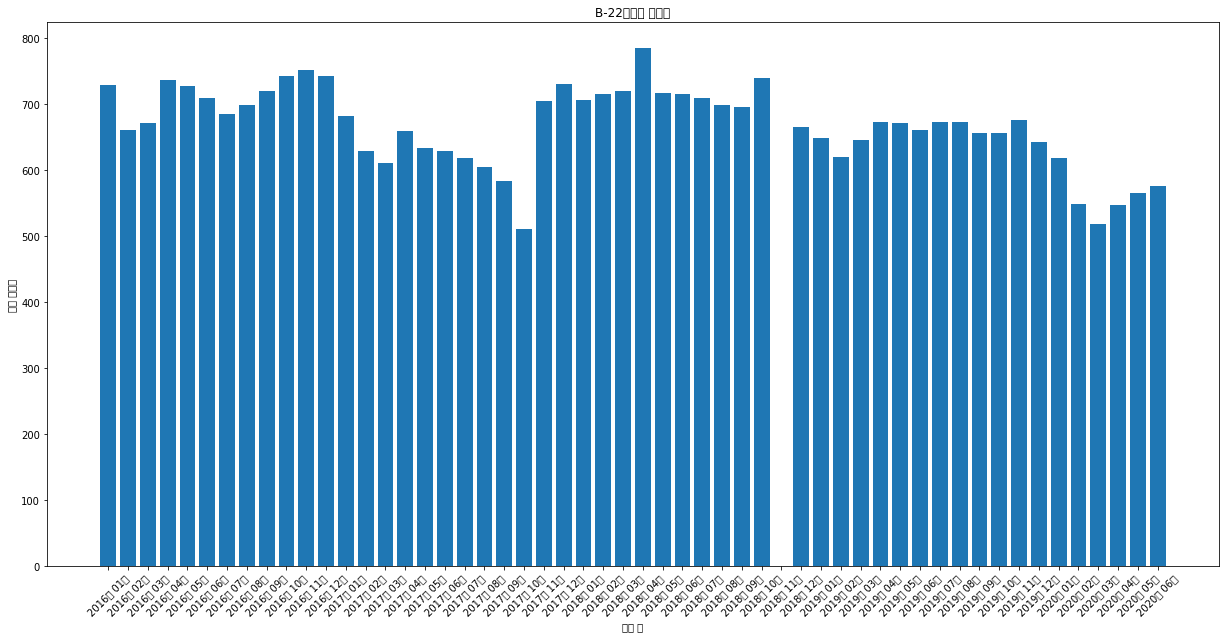

a


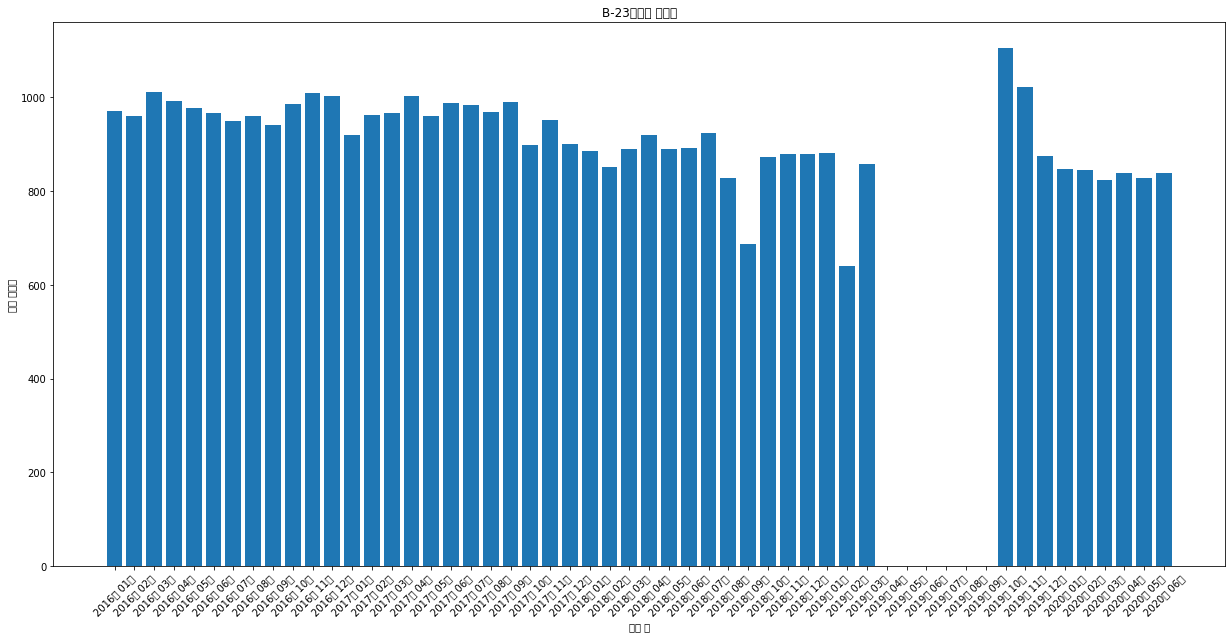

a


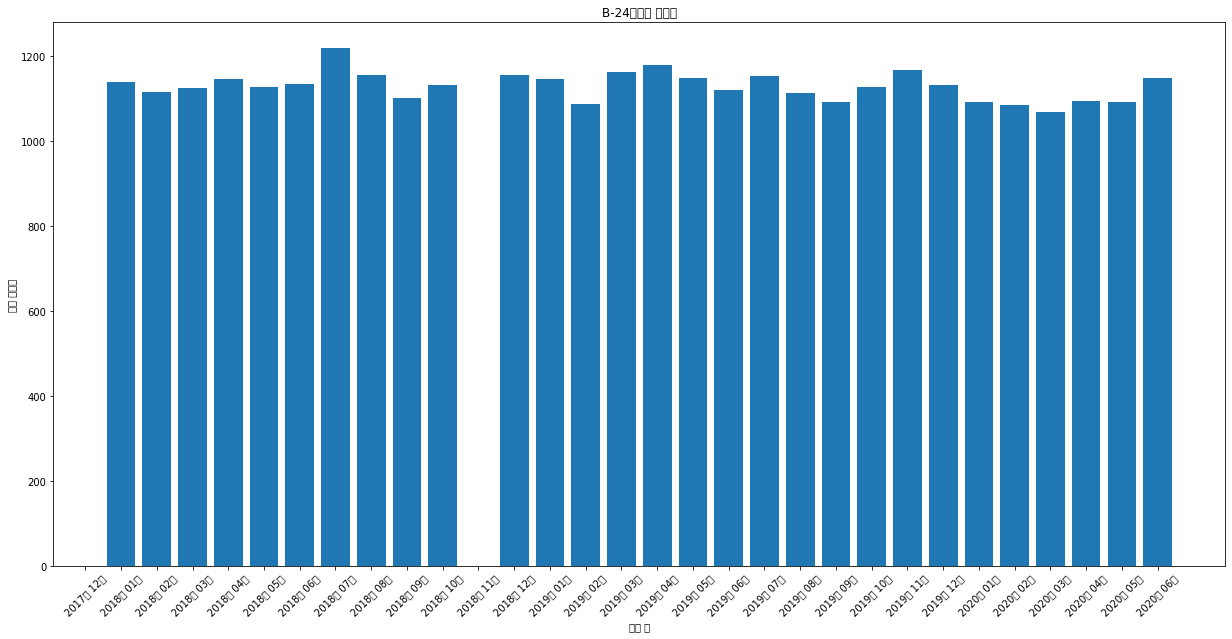

a


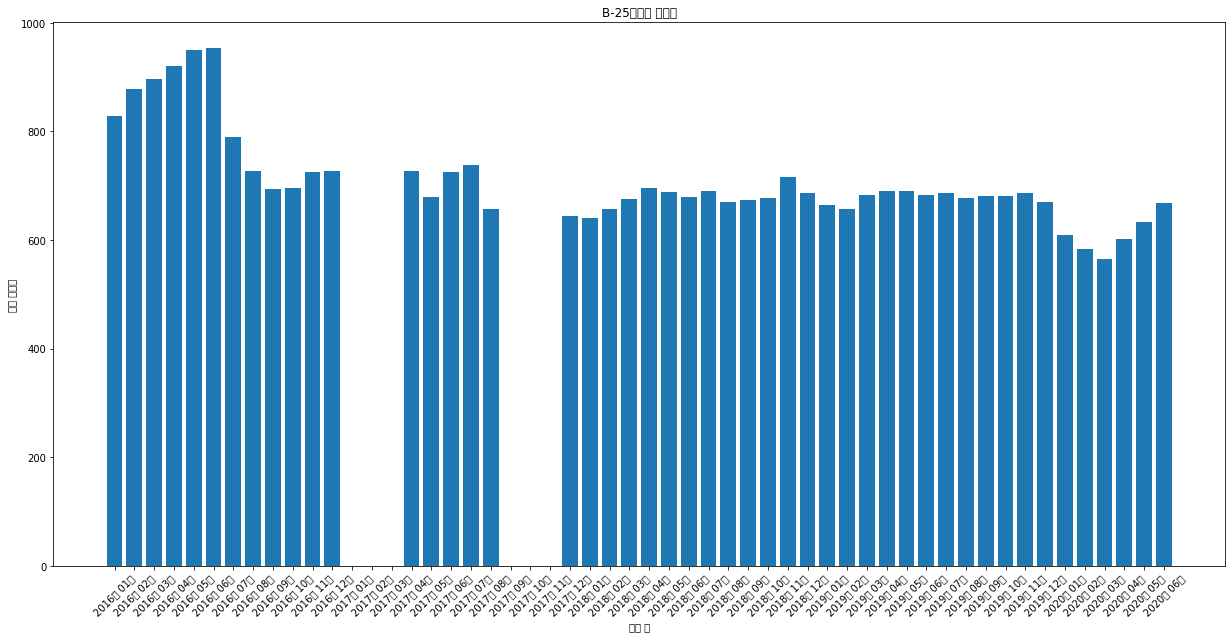

a


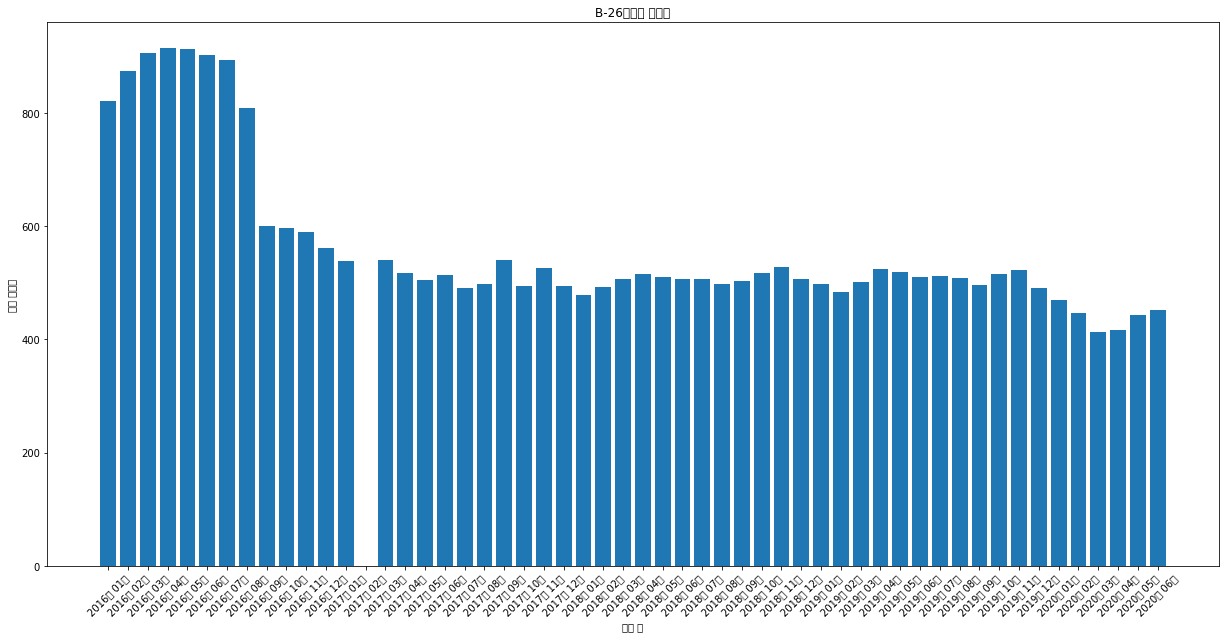

a


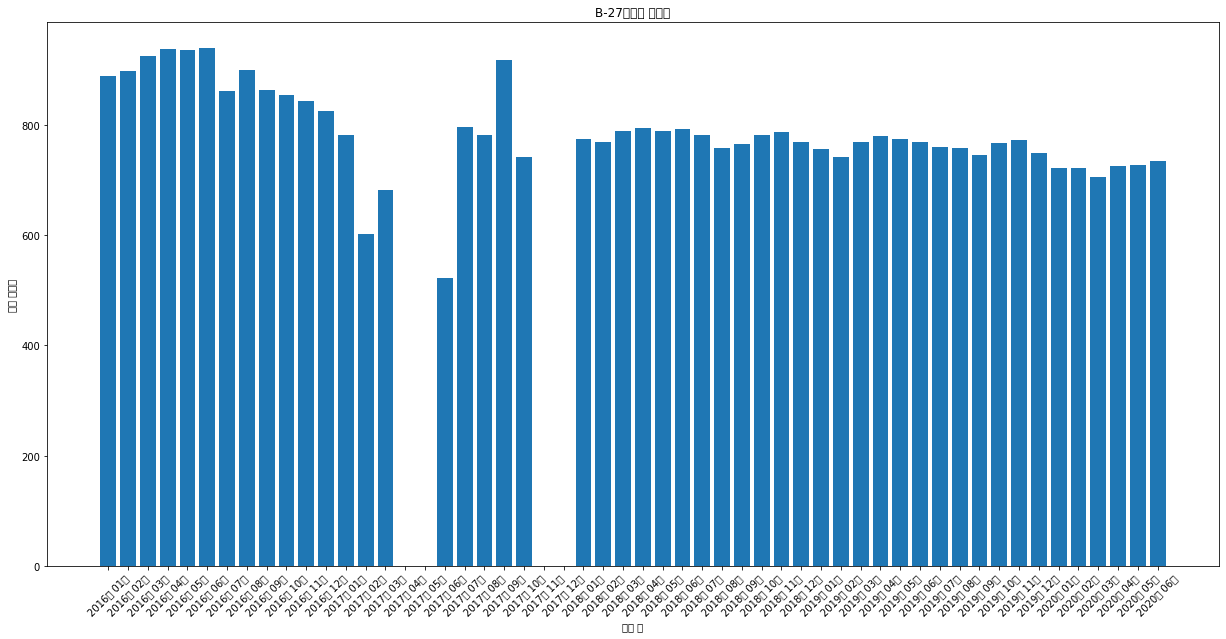

a


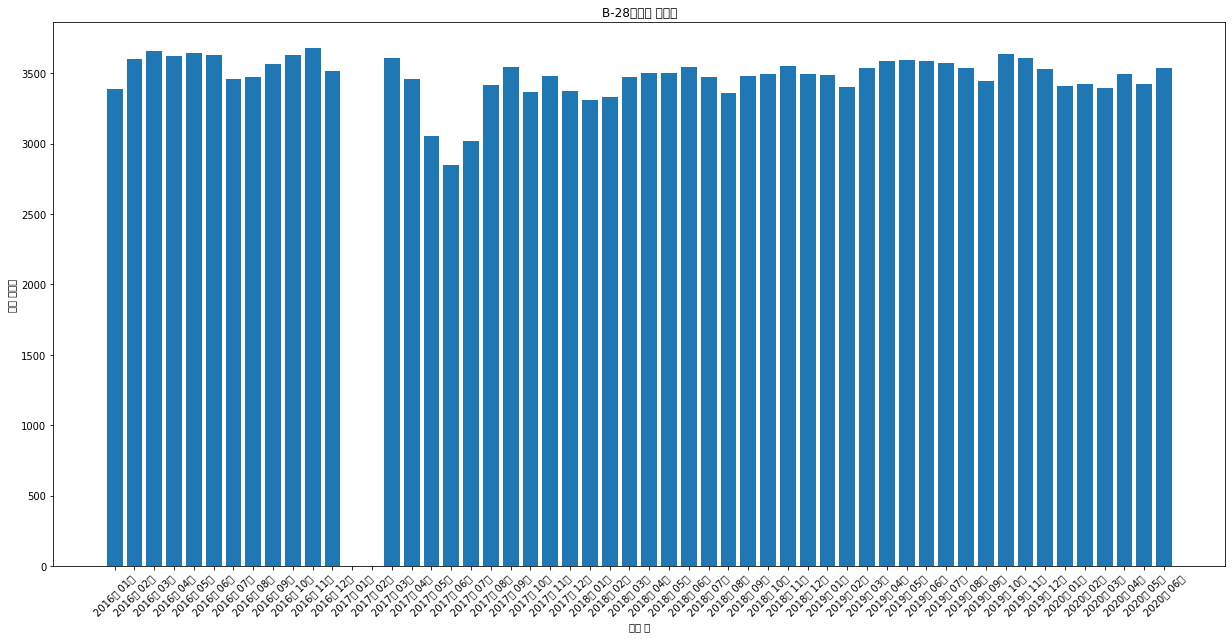

a


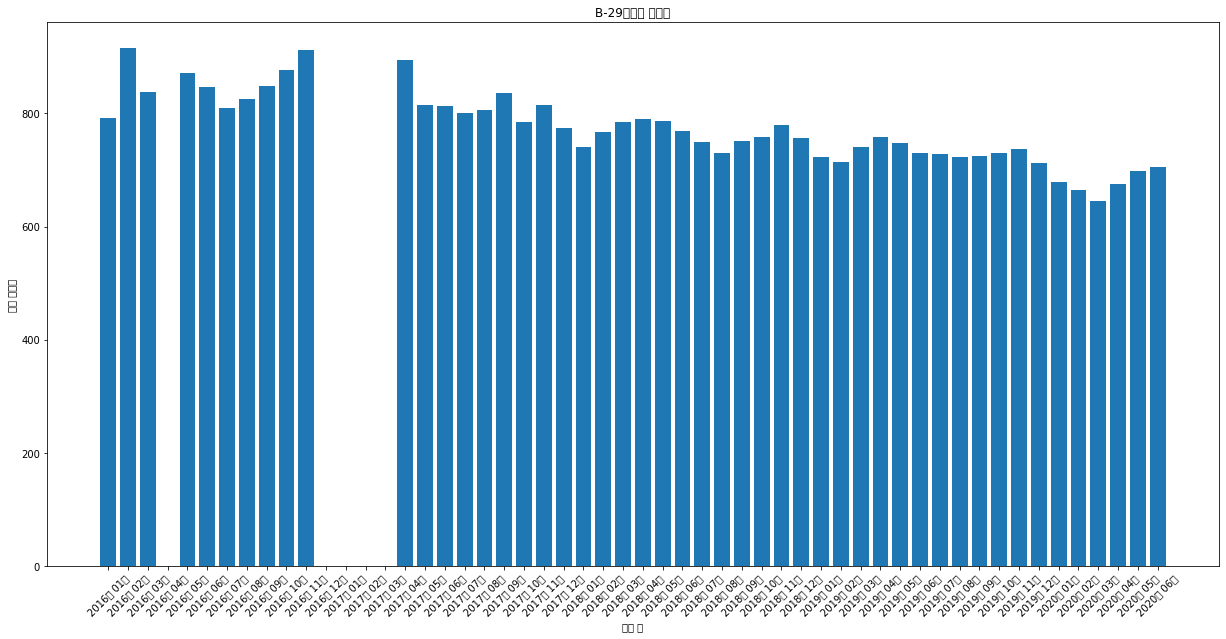

a


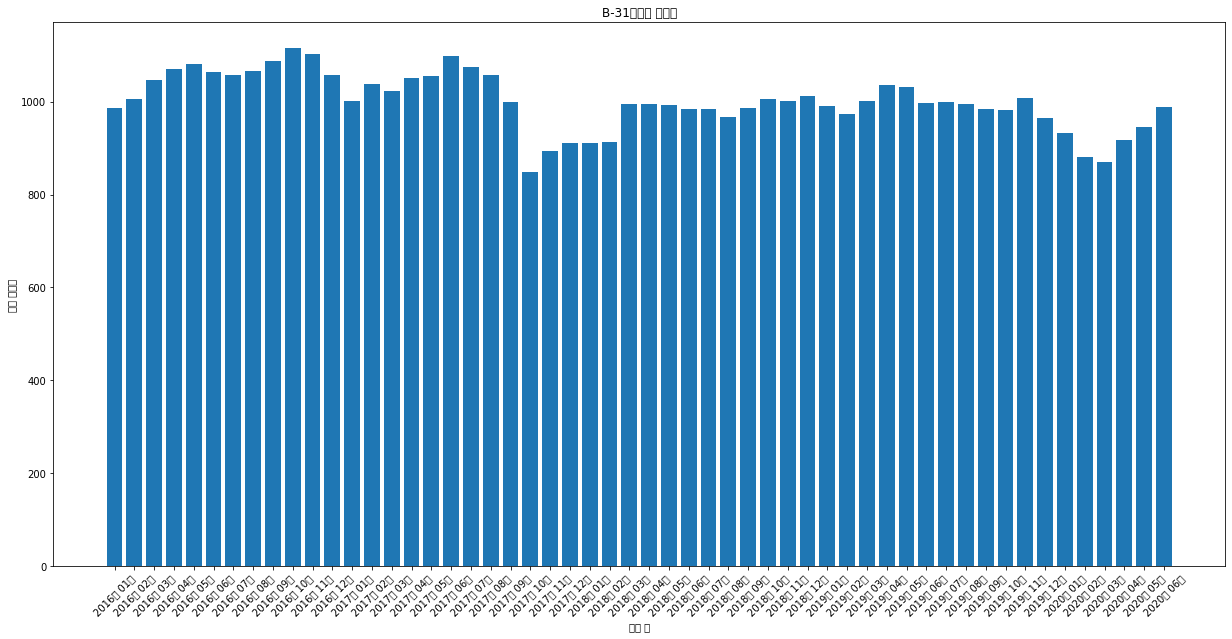

a


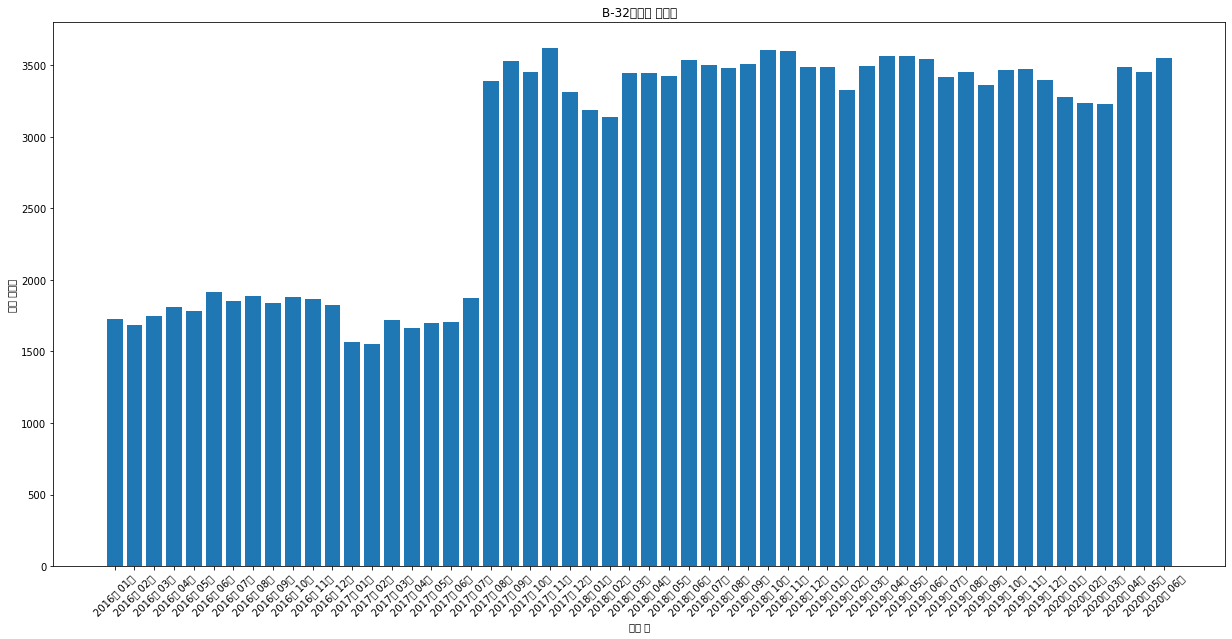

a


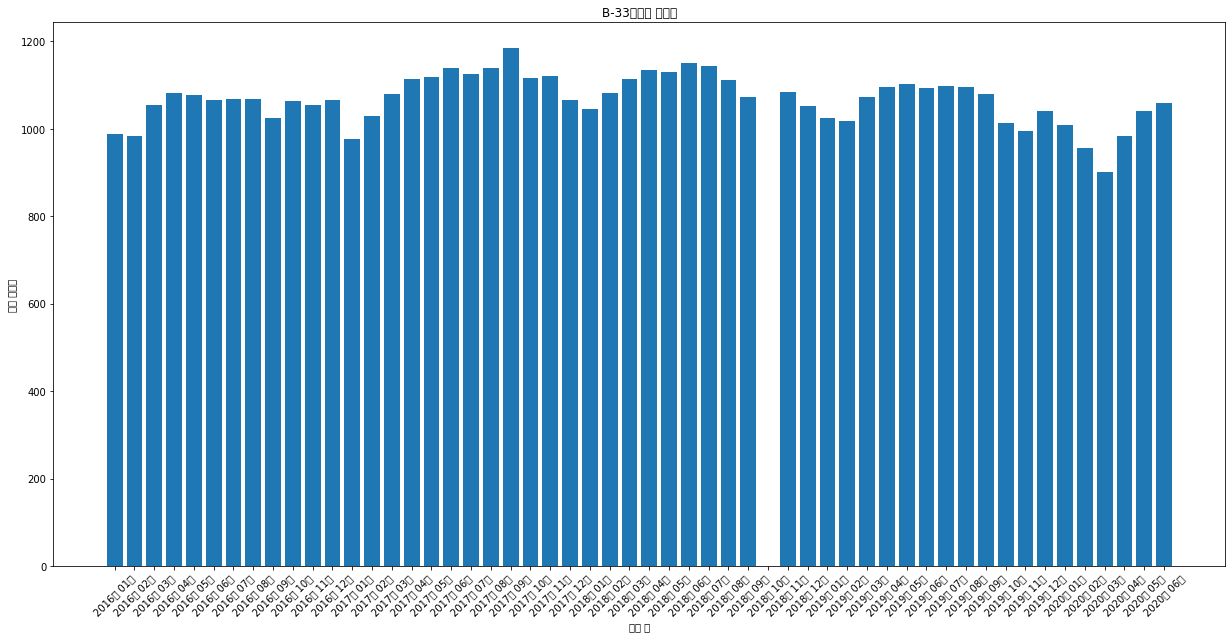

a


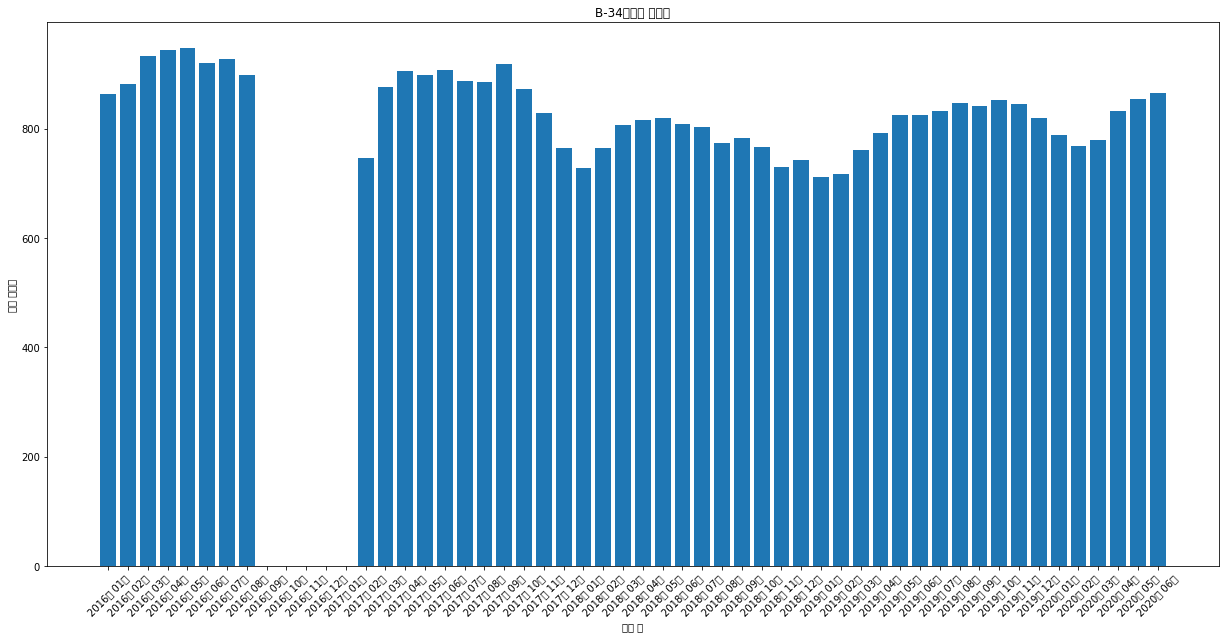

a


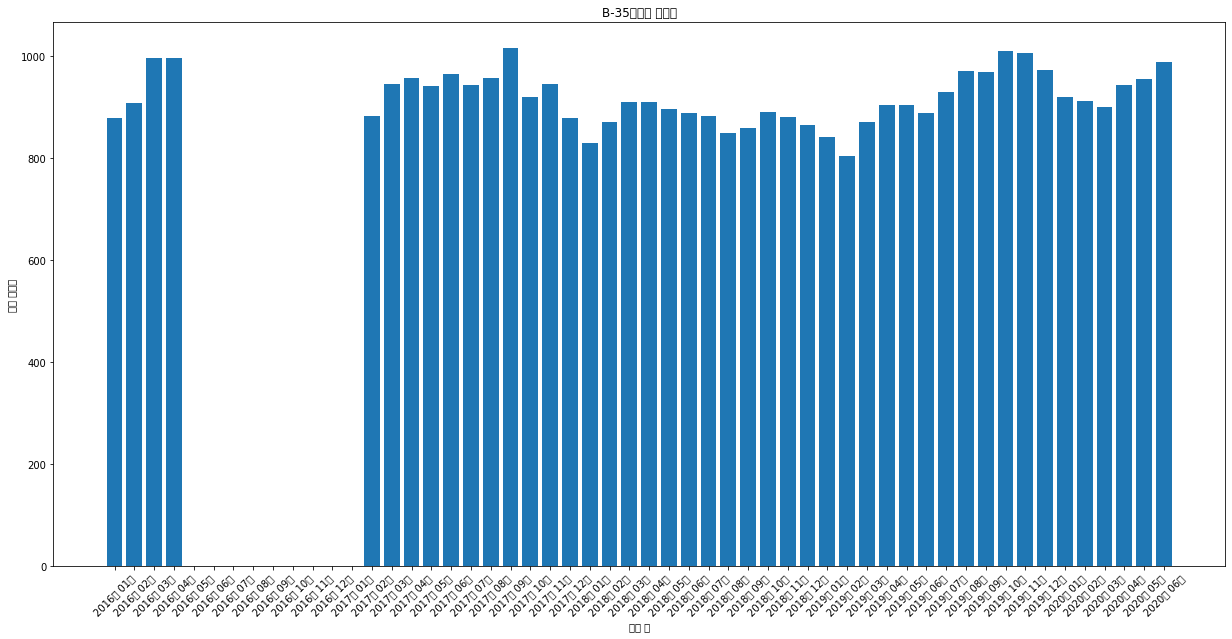

a


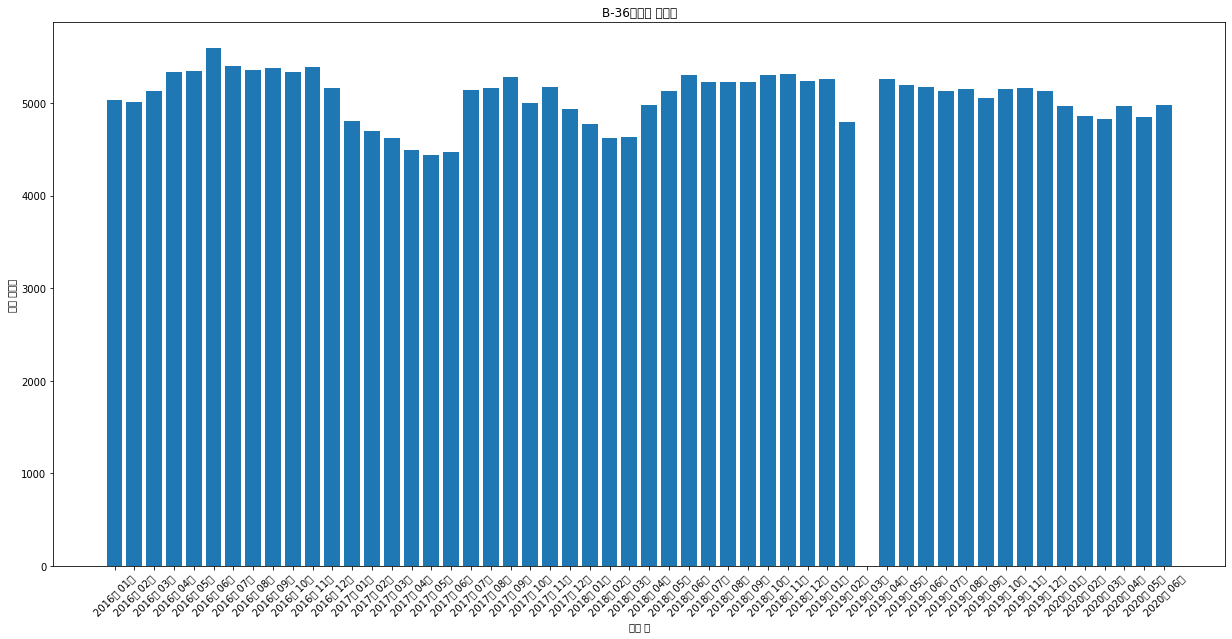

a


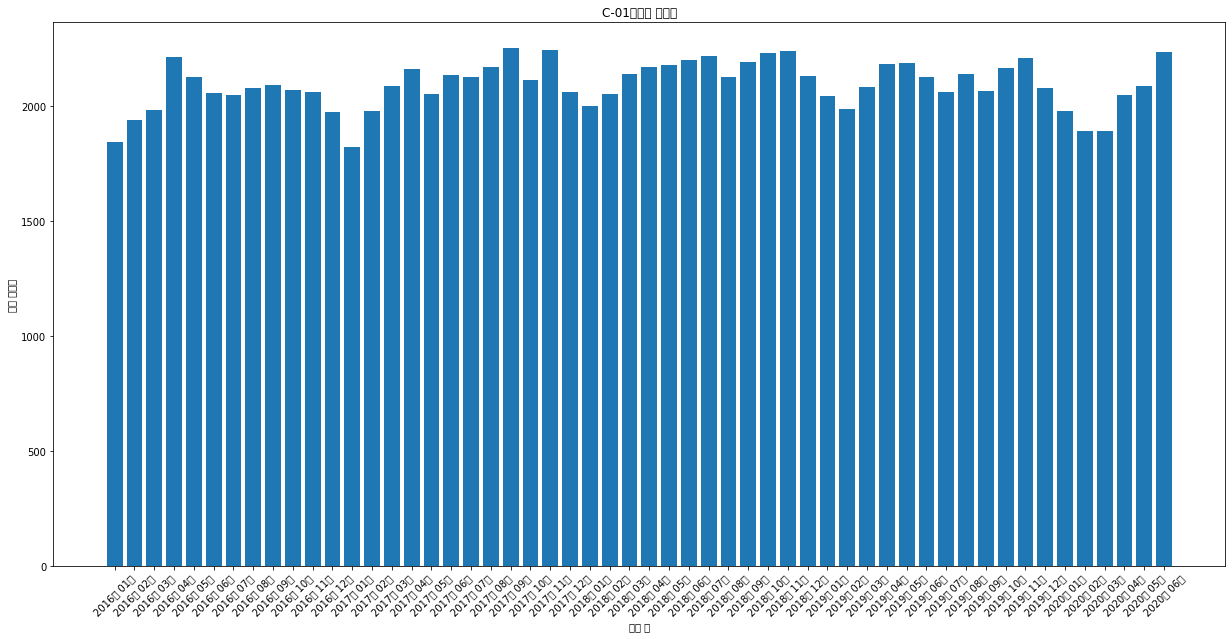

a


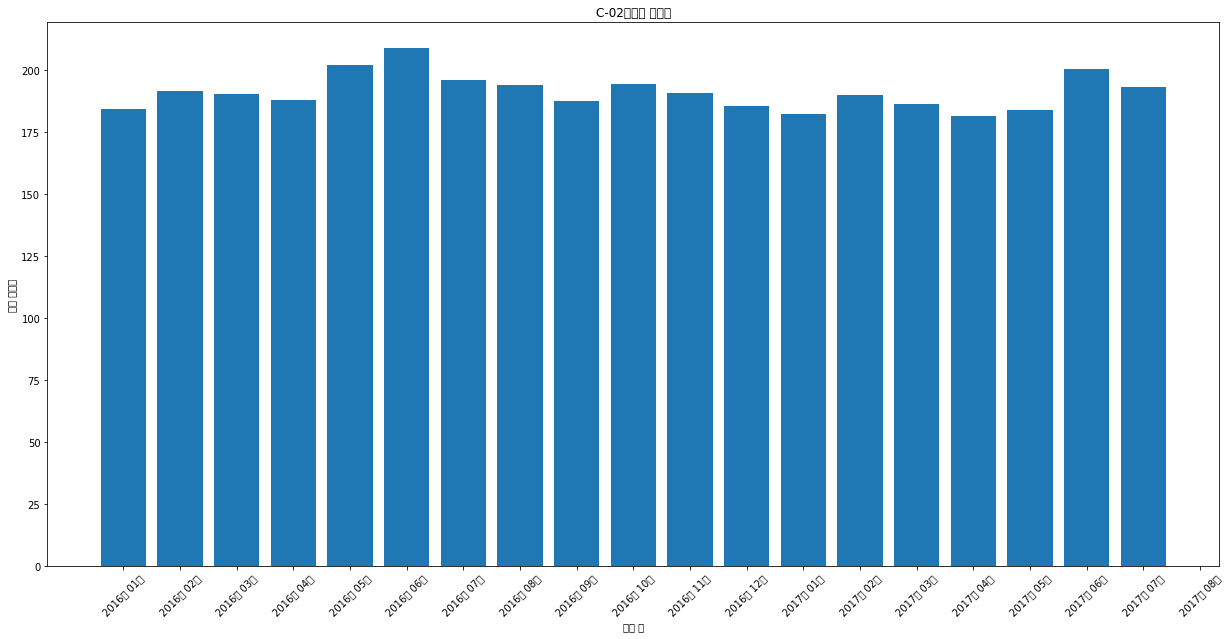

a


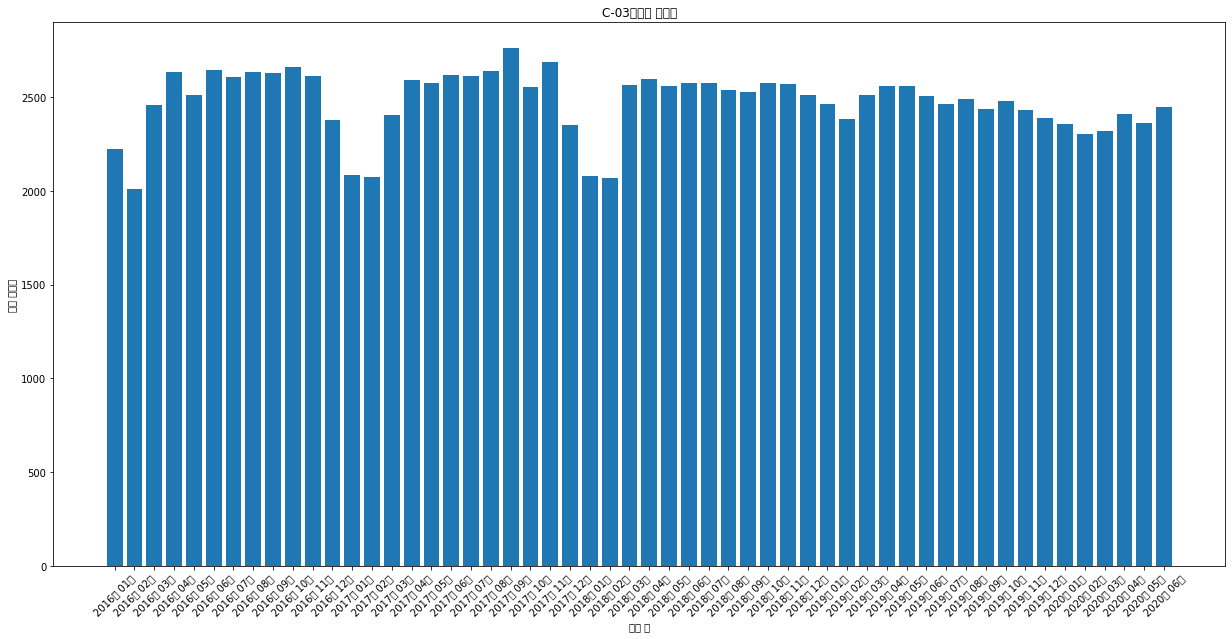

a


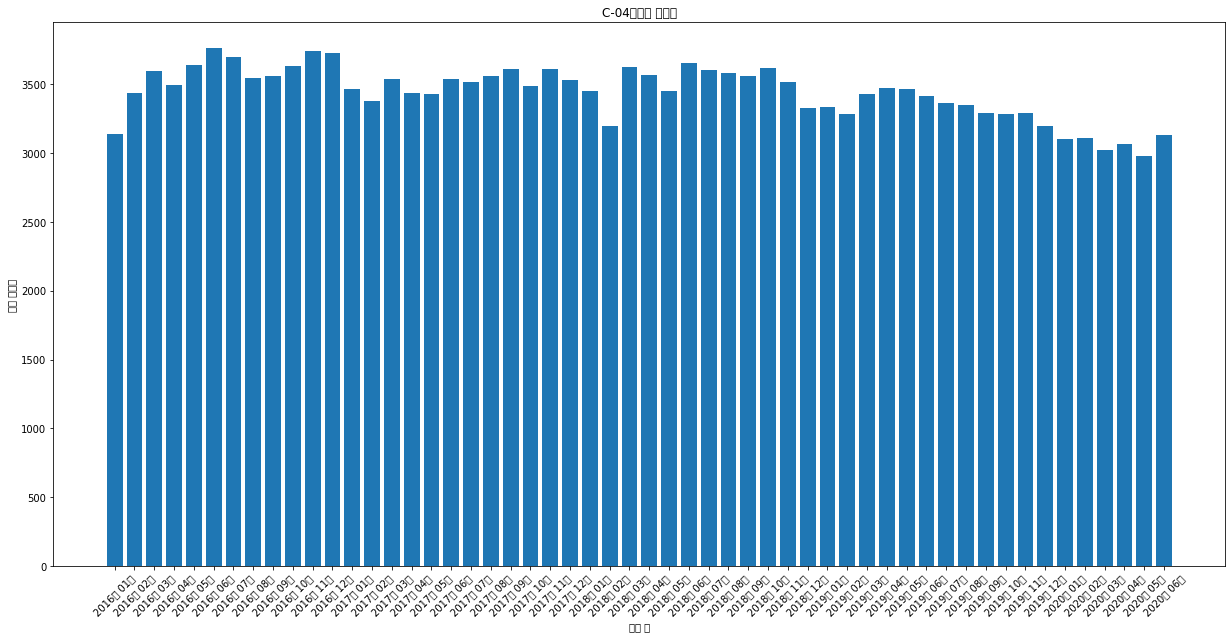

a


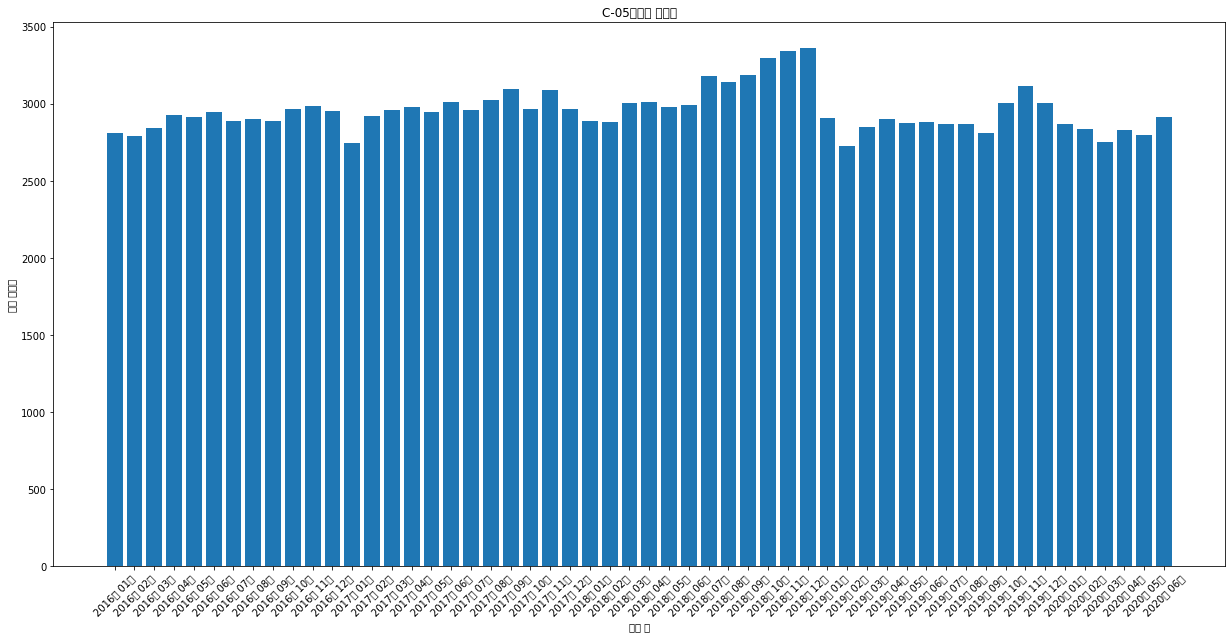

a


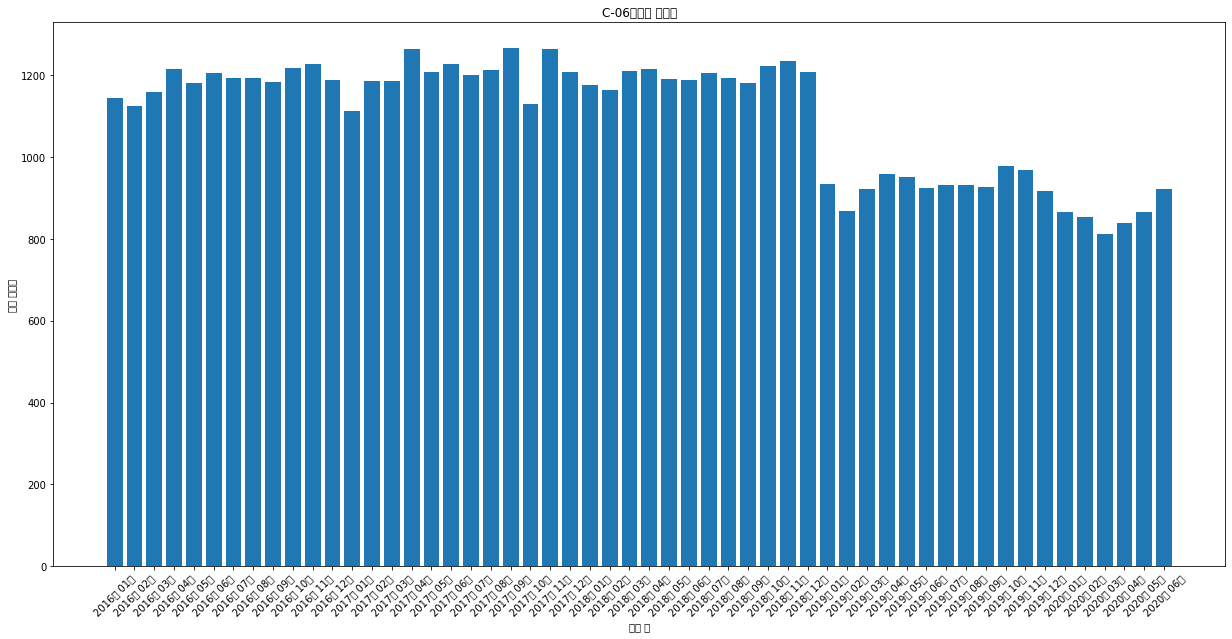

a


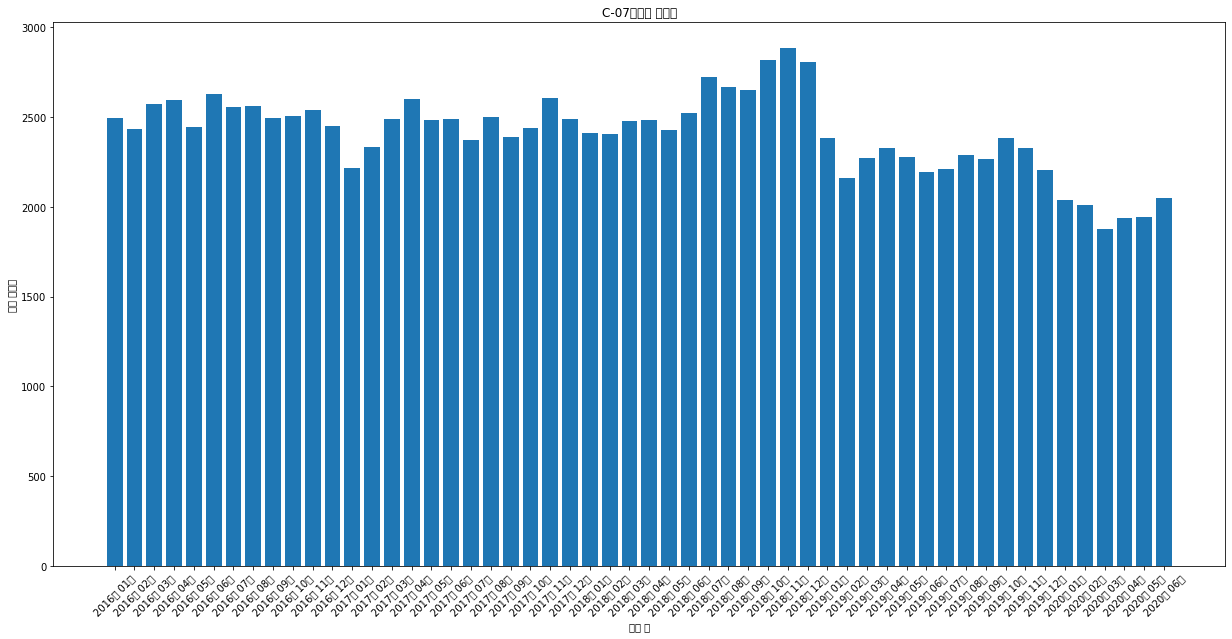

a


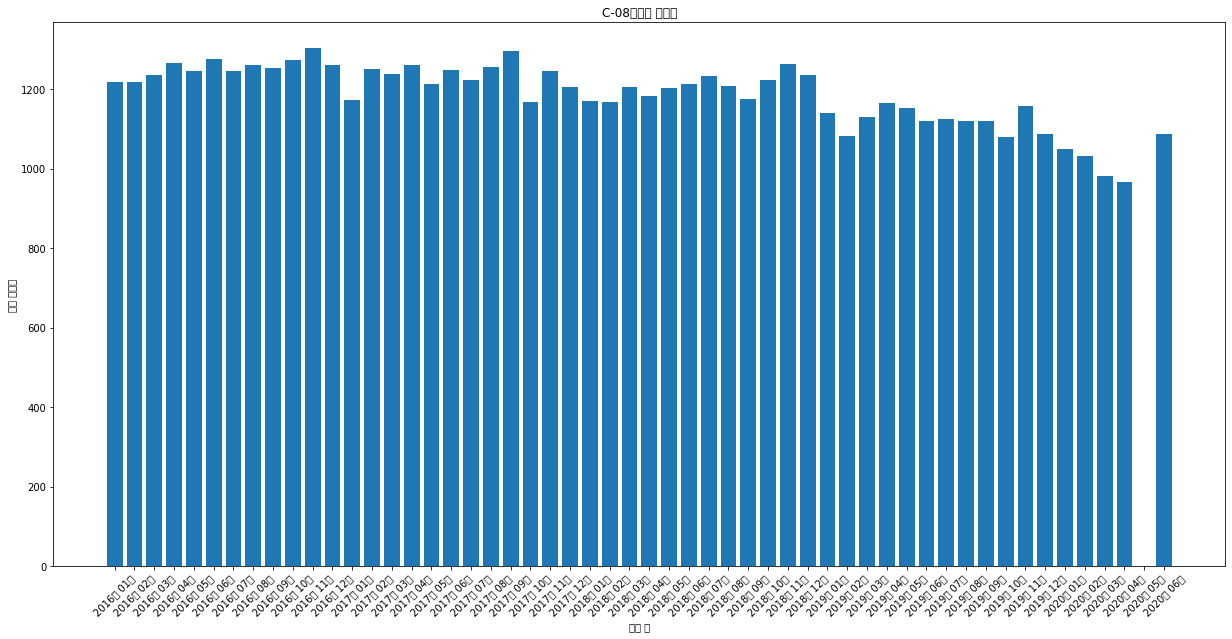

a


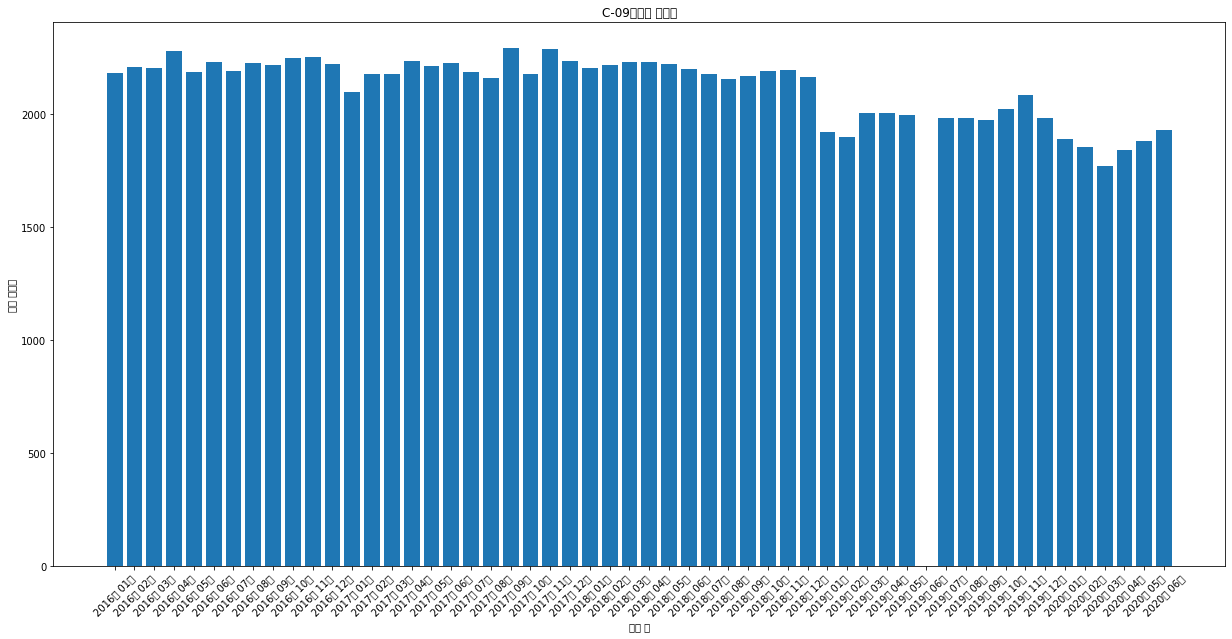

a


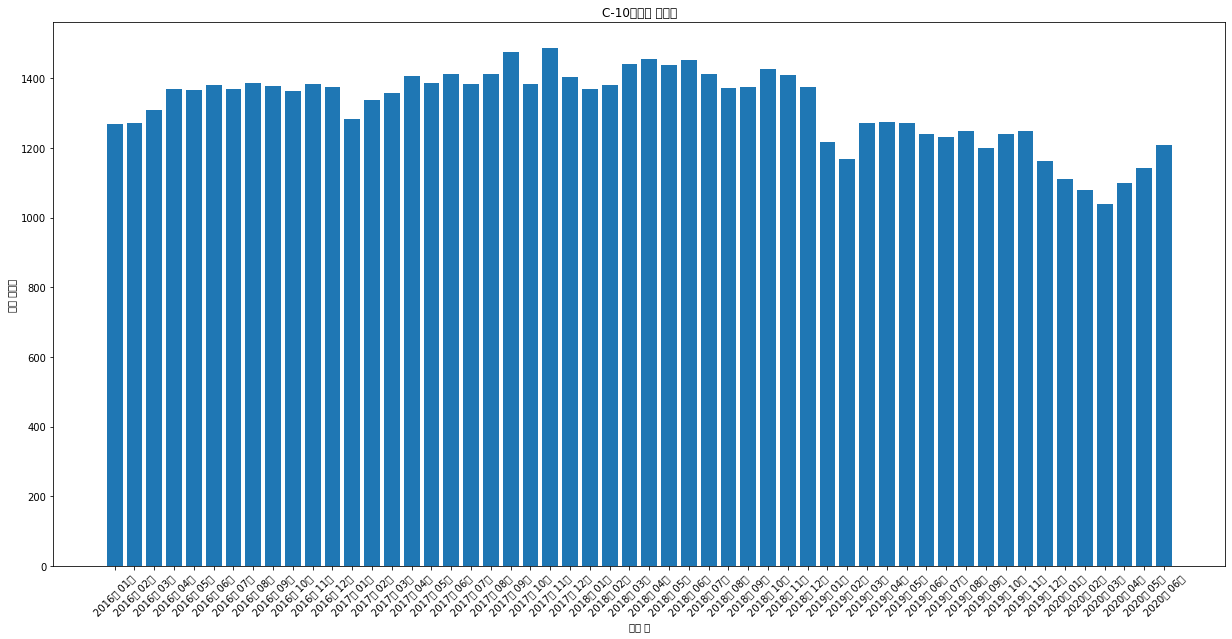

a


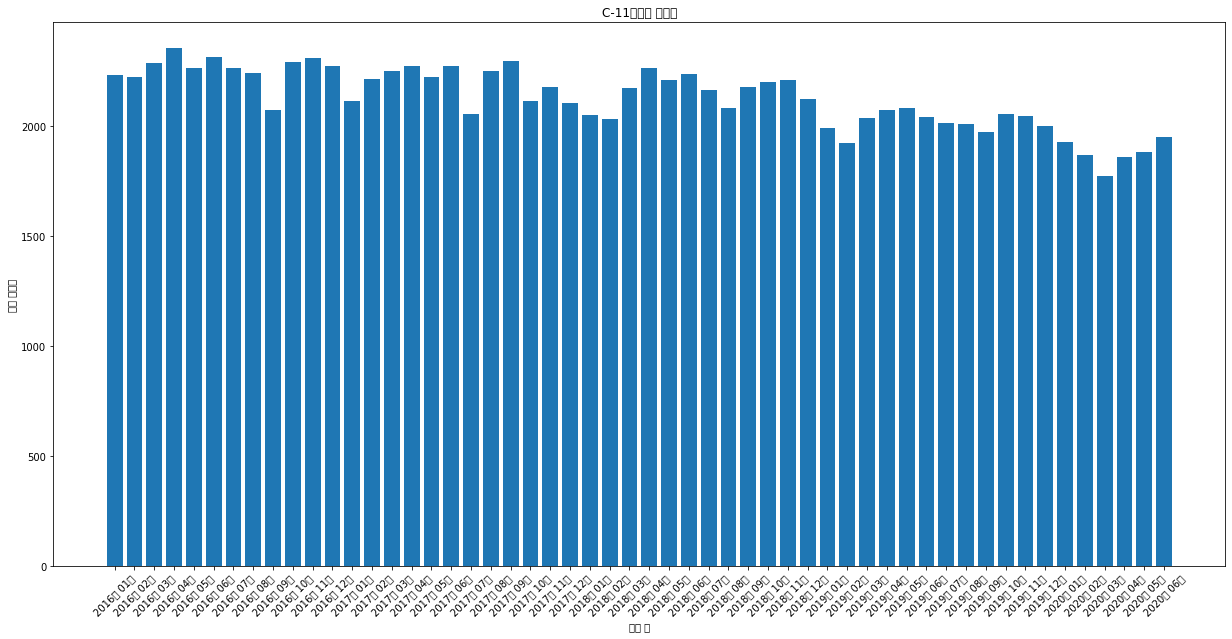

a


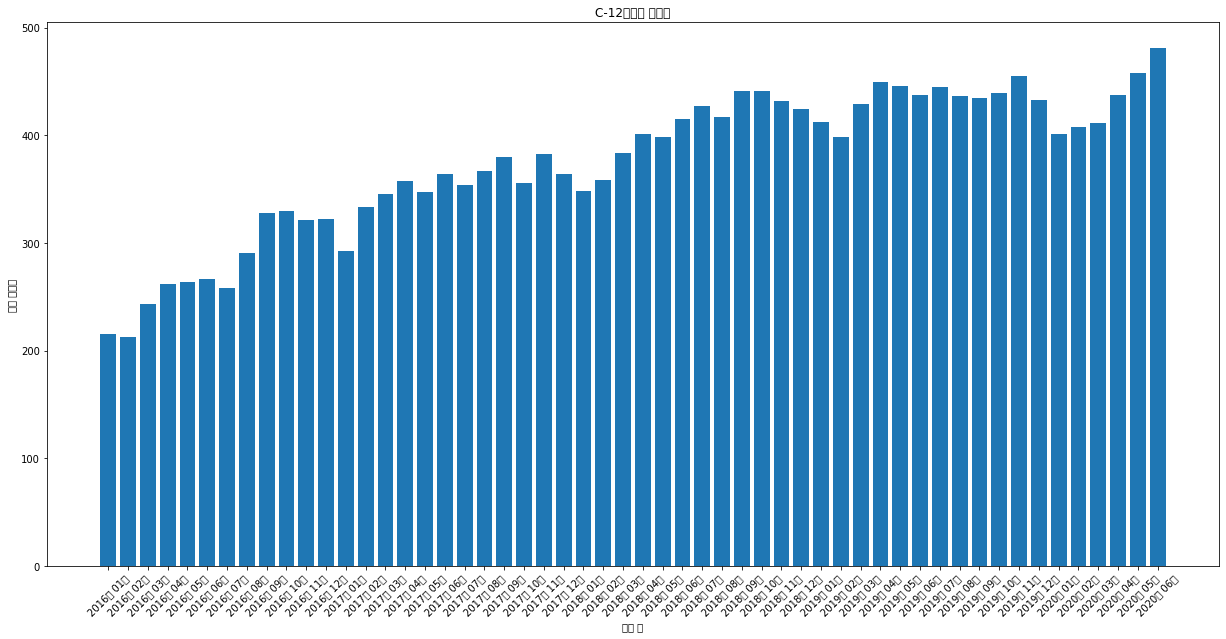

a


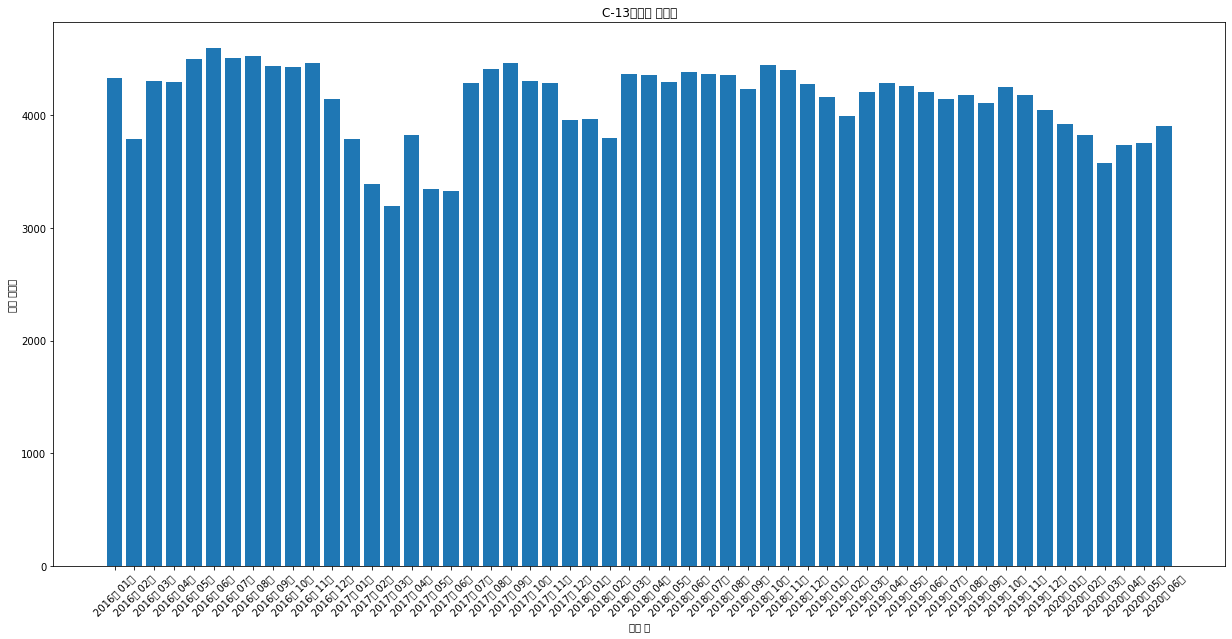

a


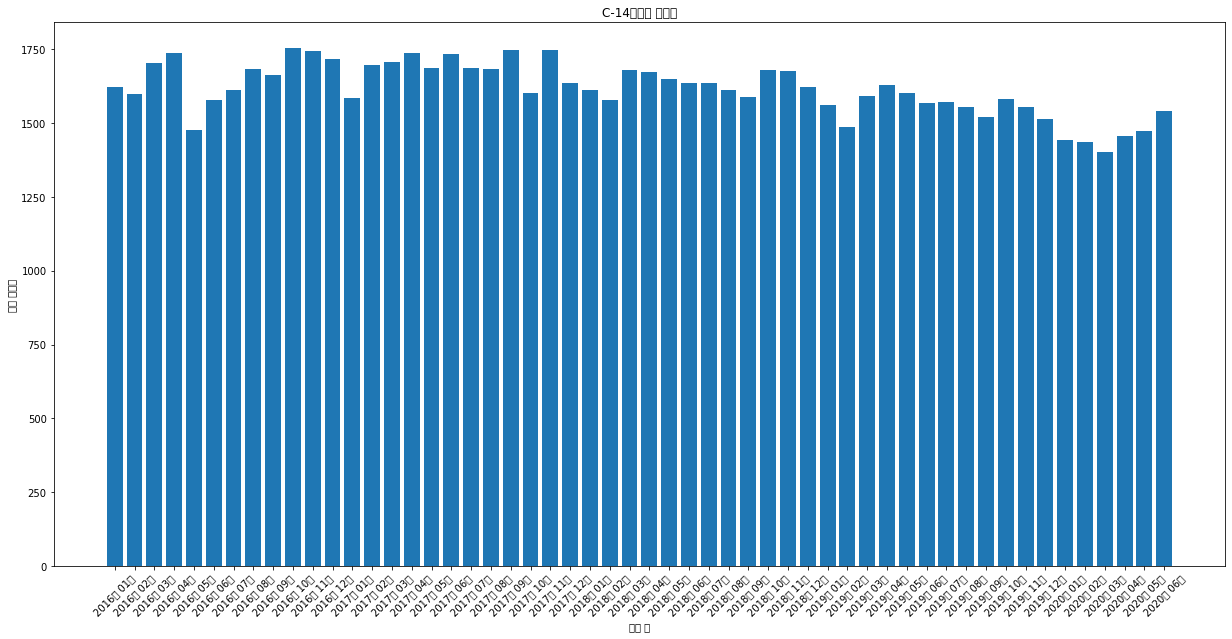

a


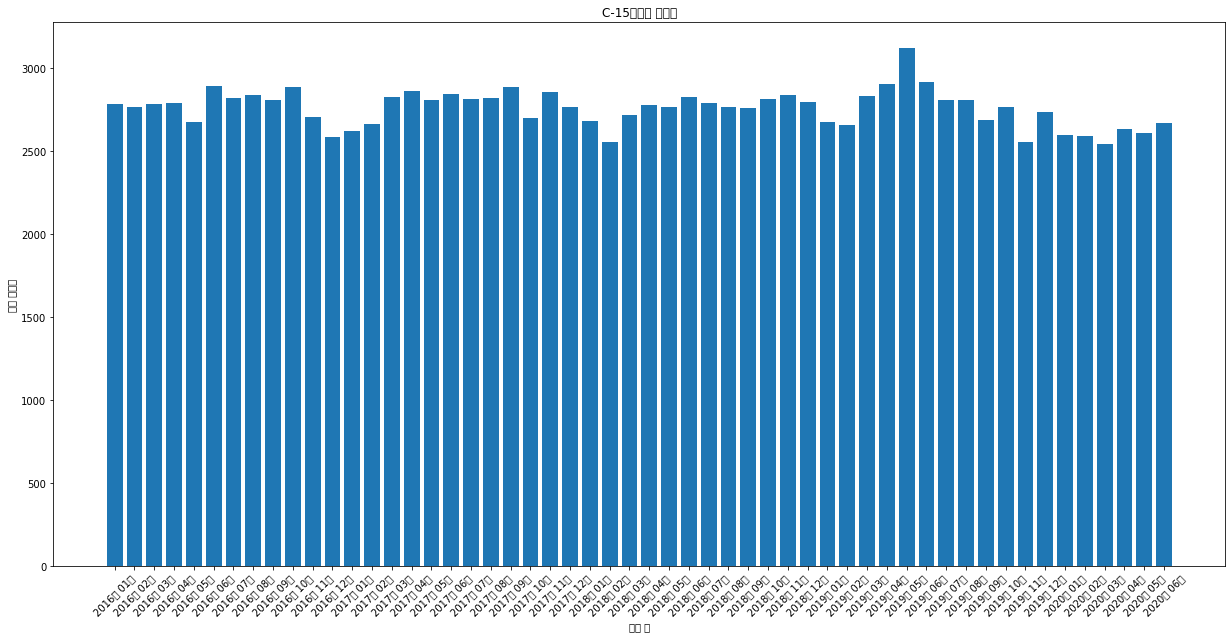

a


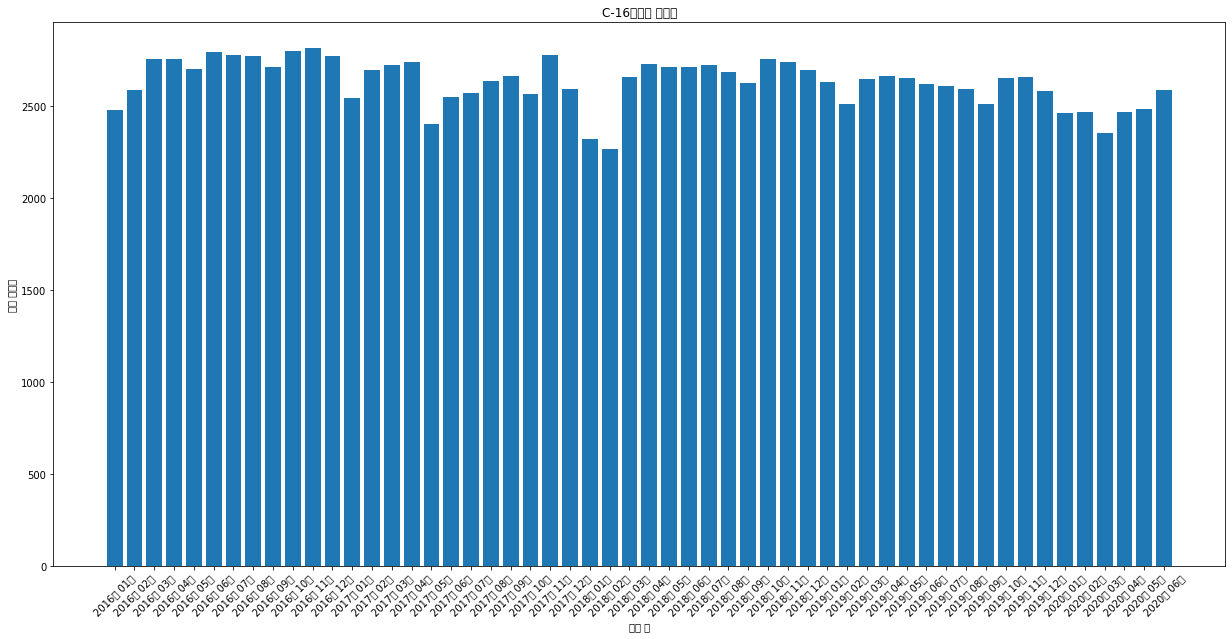

a


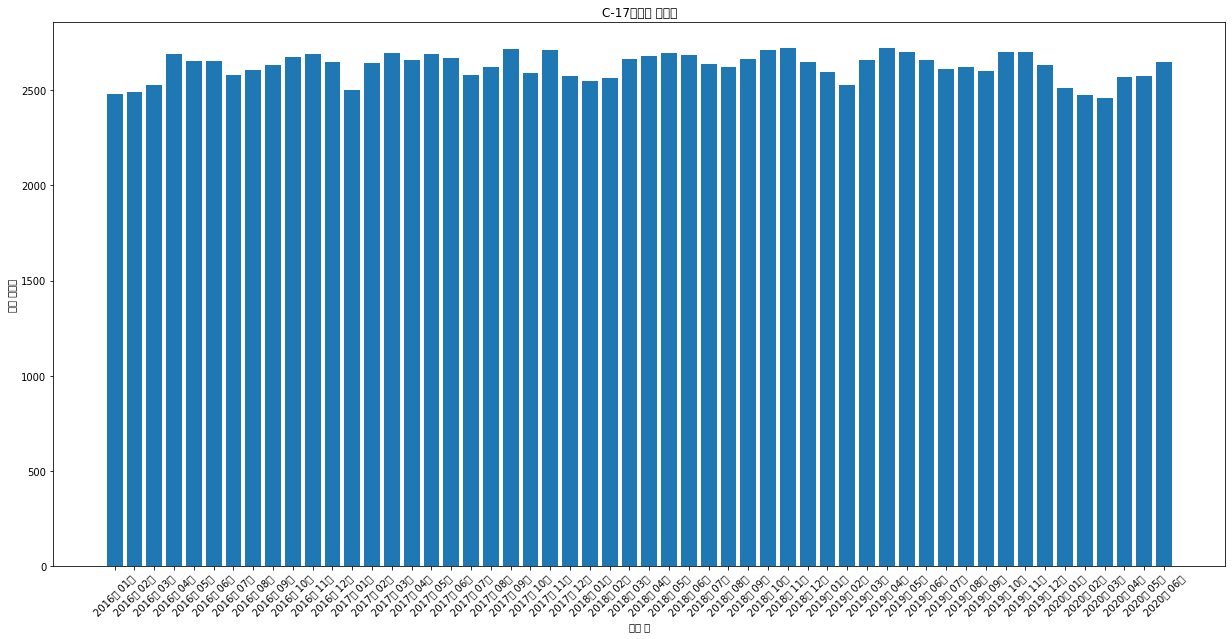

a


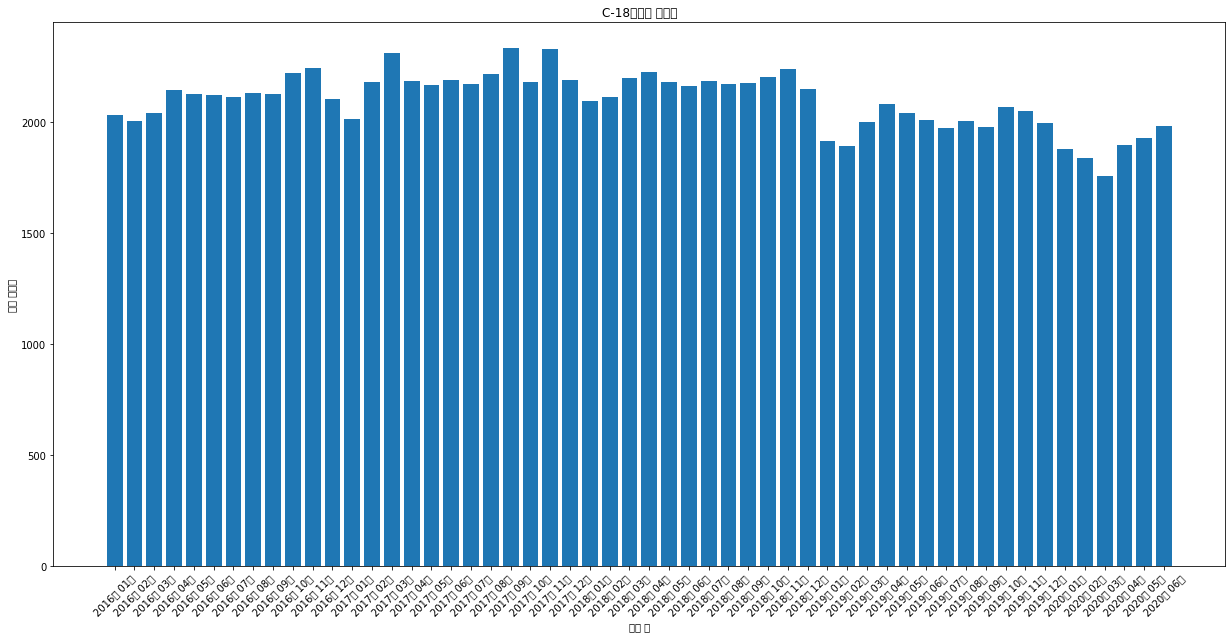

a


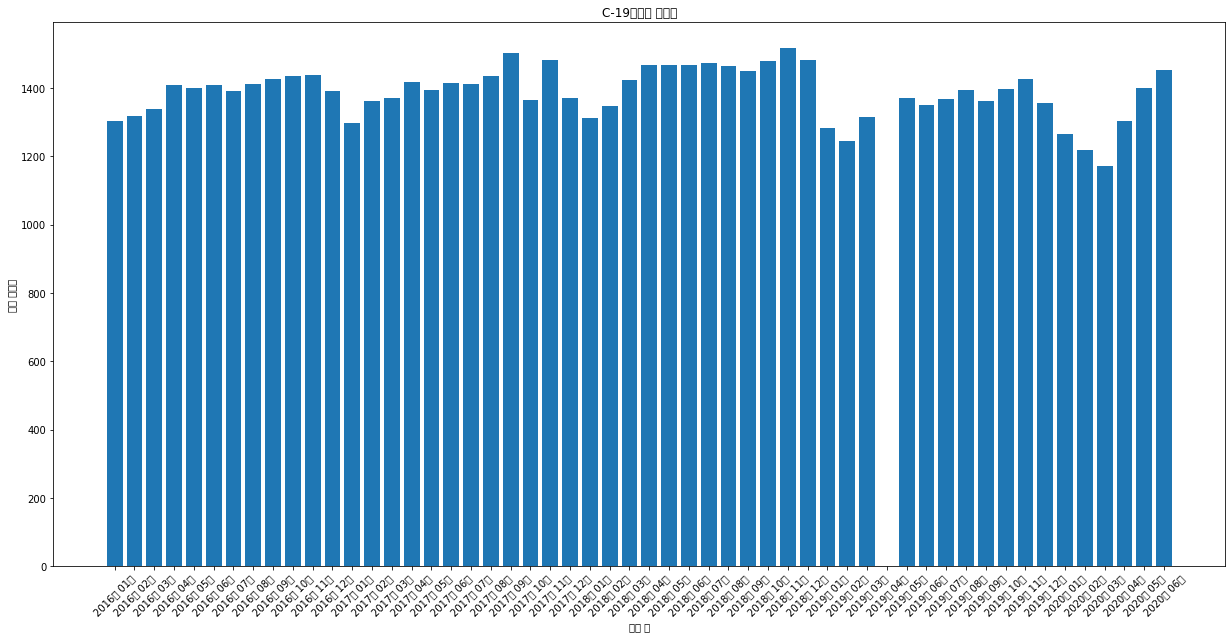

a


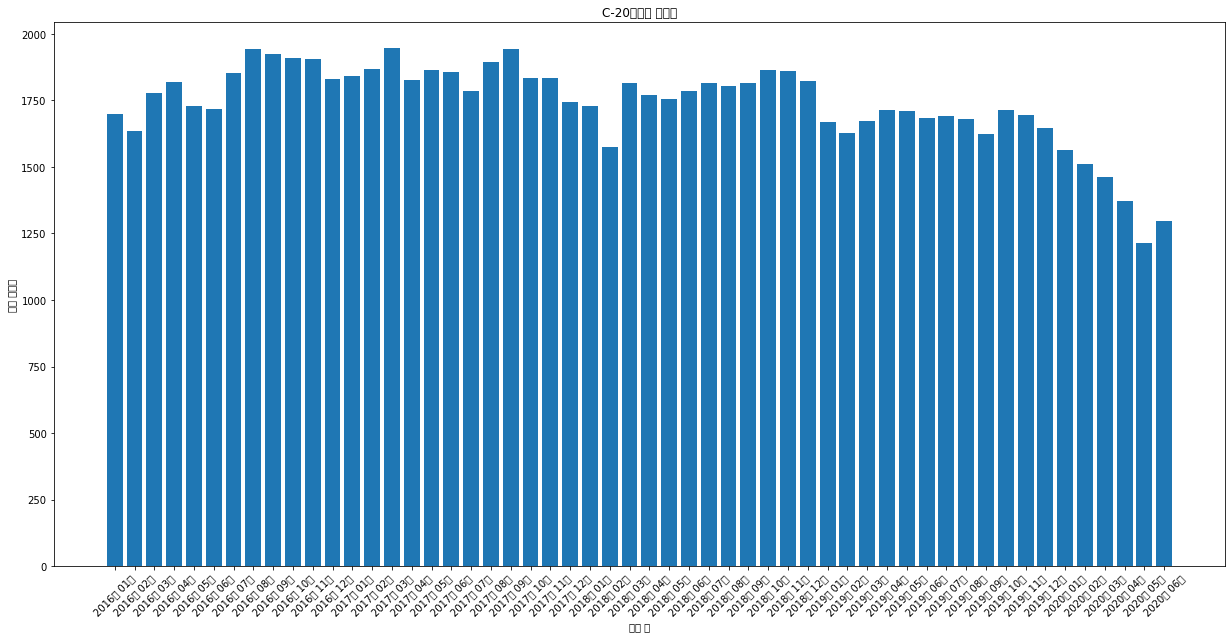

a


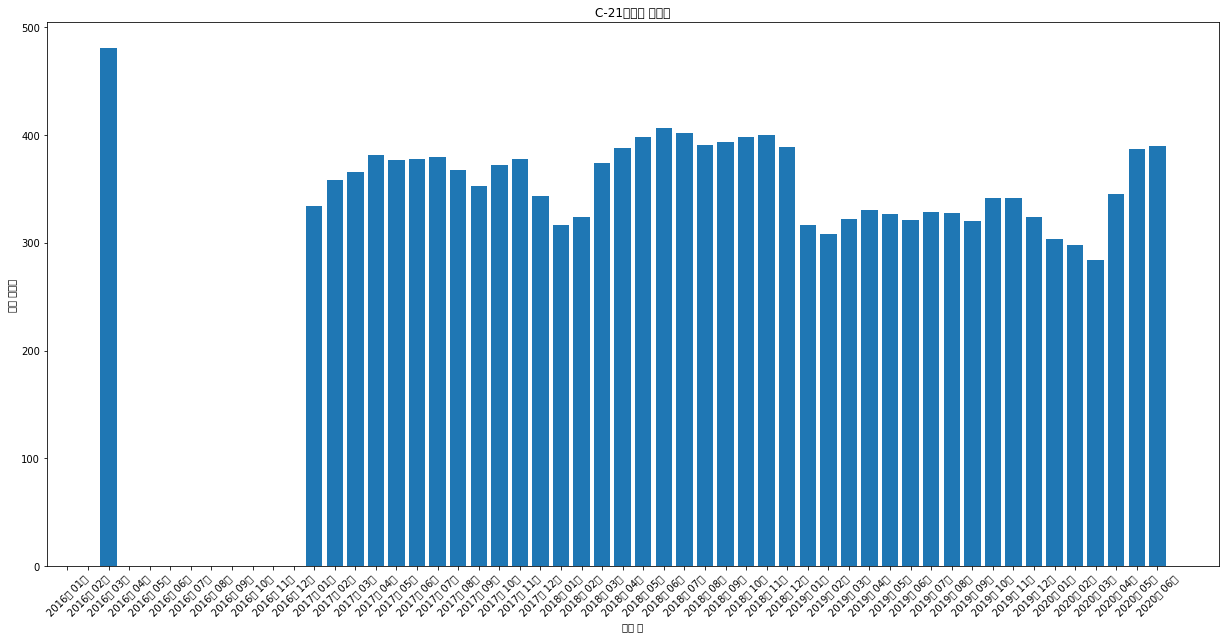

a


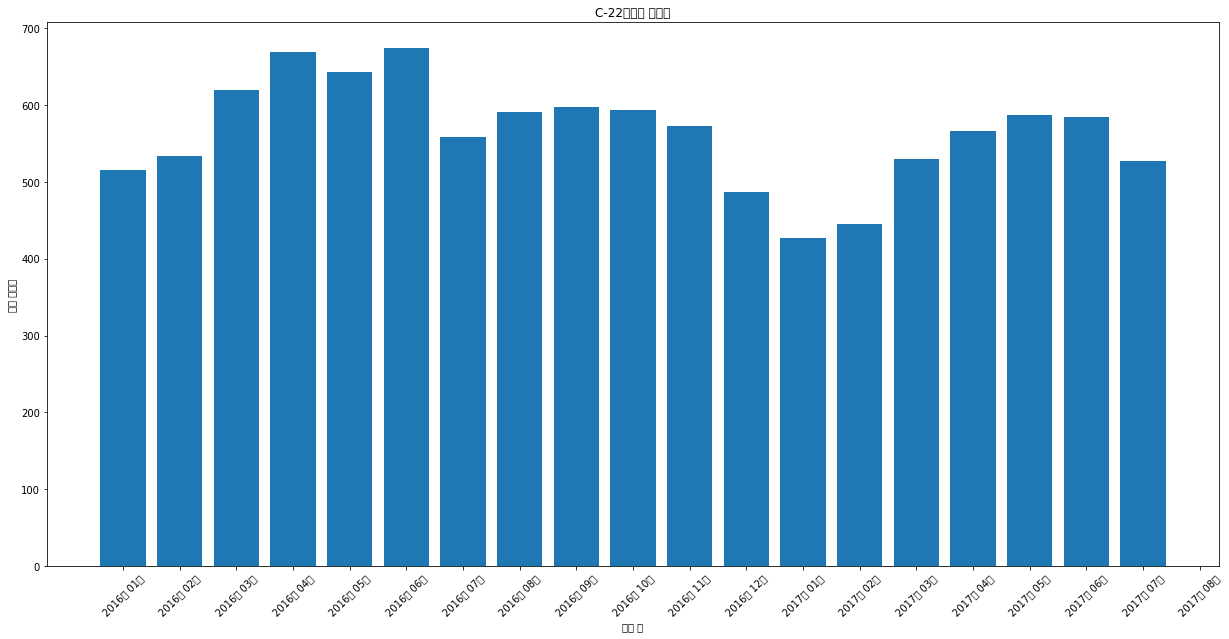

a


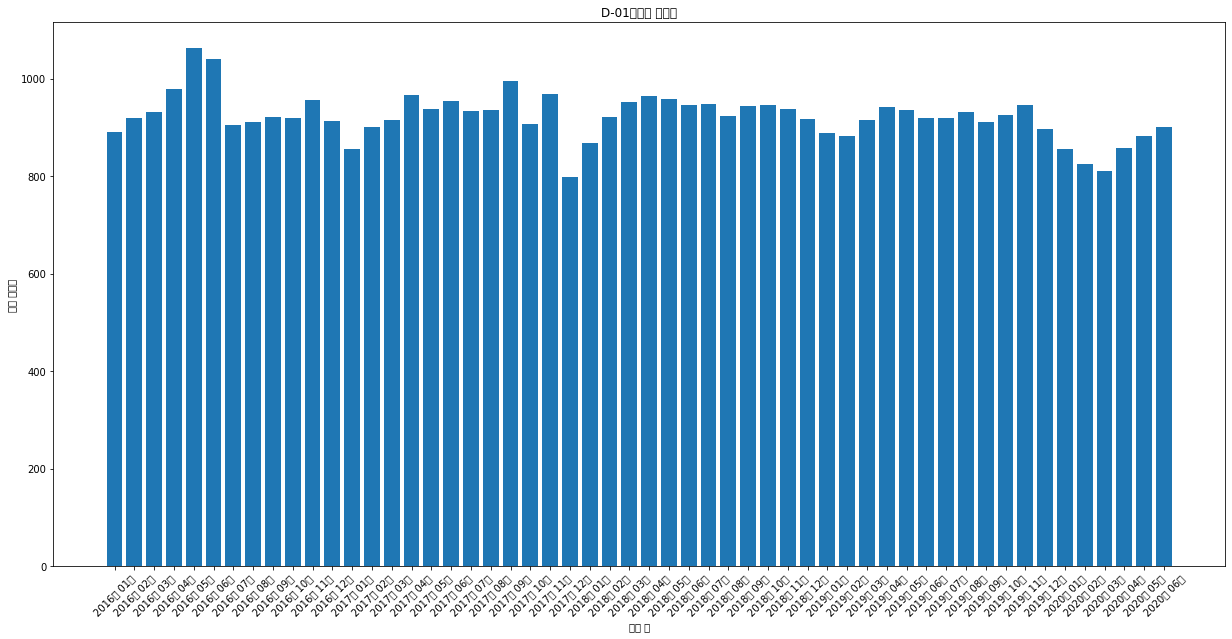

a


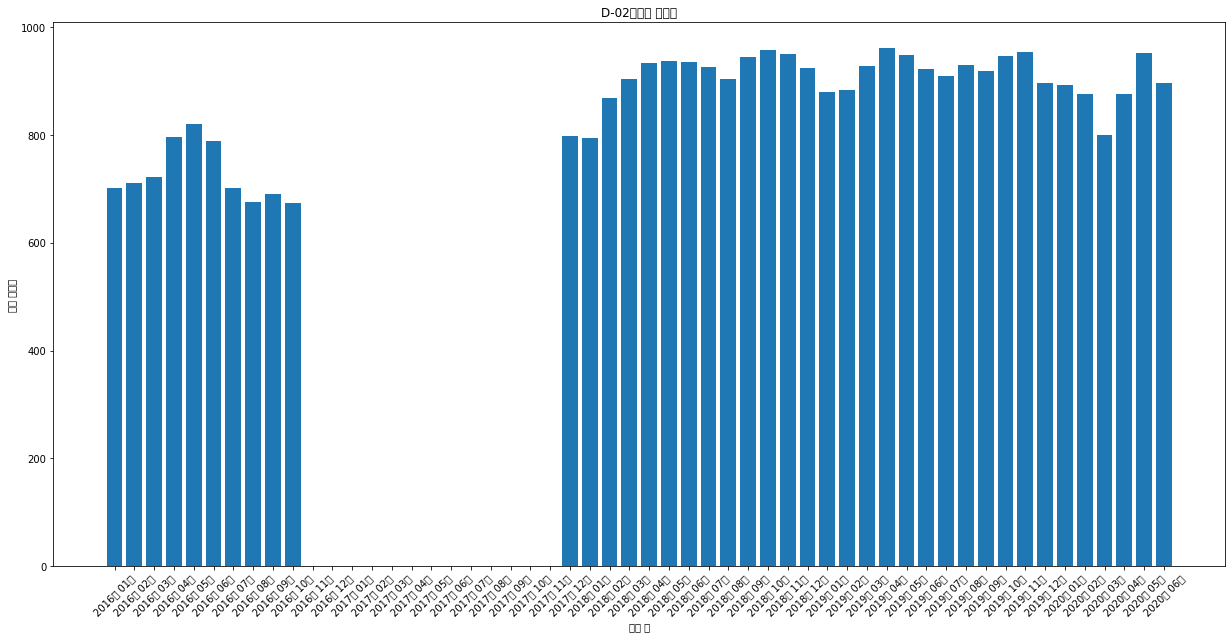

a


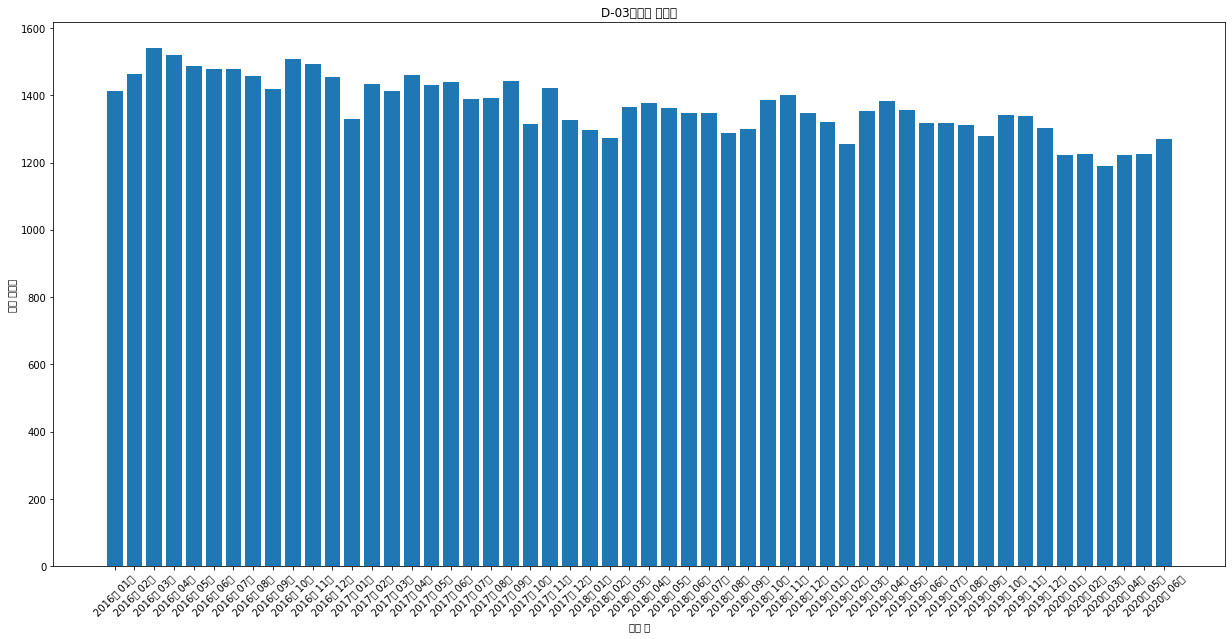

a


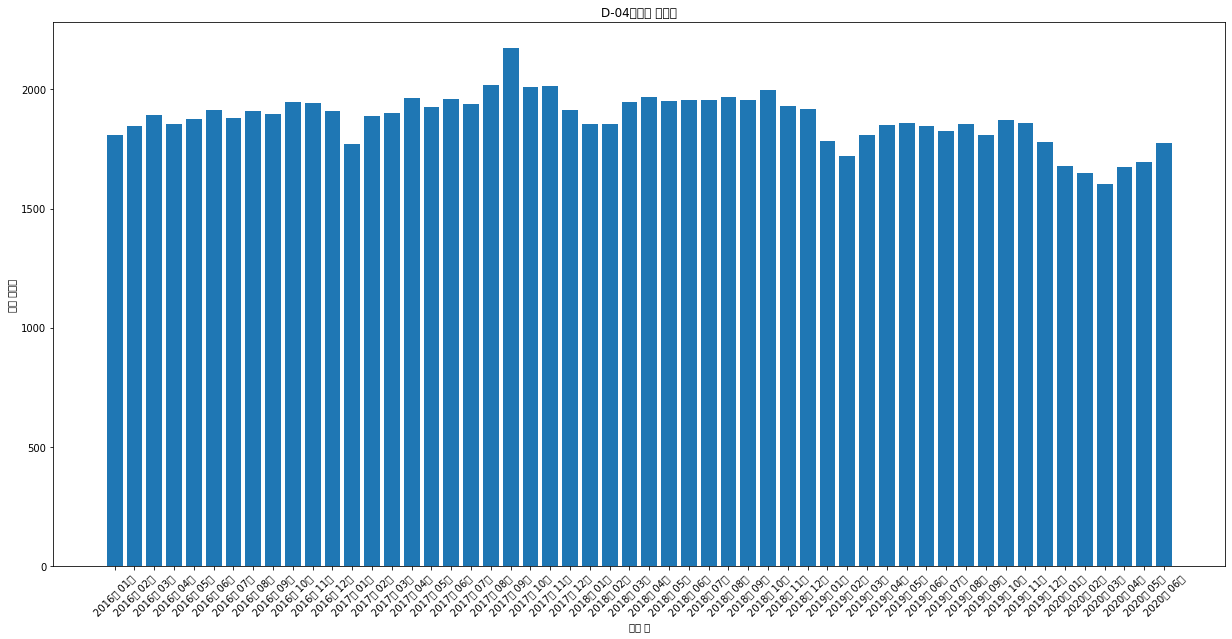

a


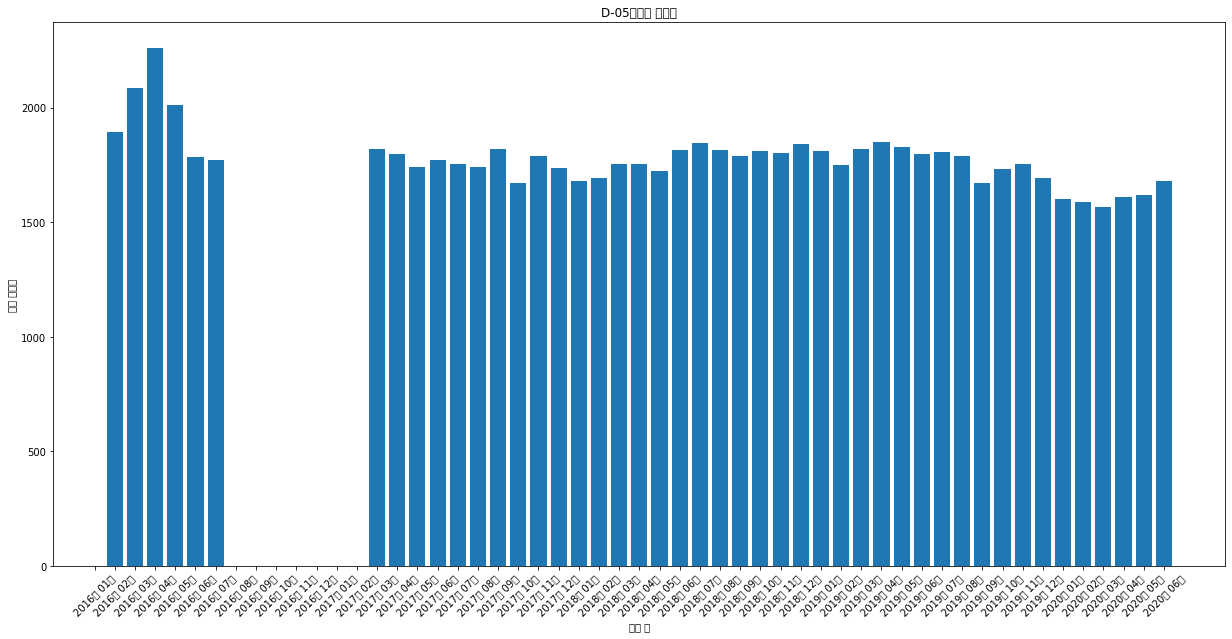

a


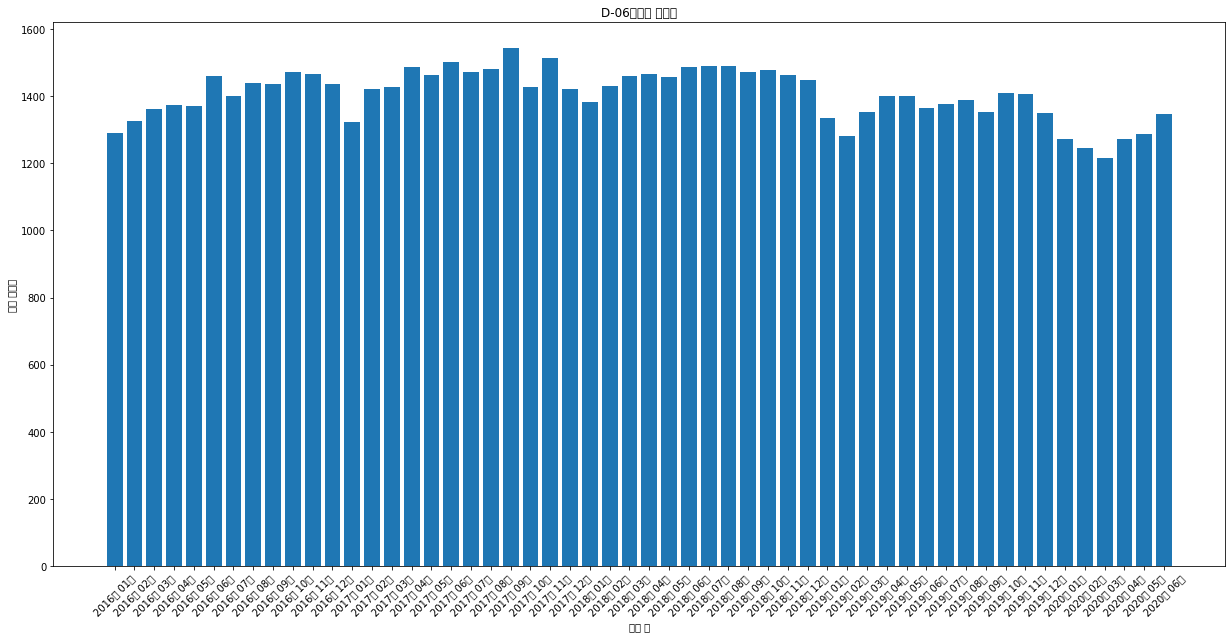

a


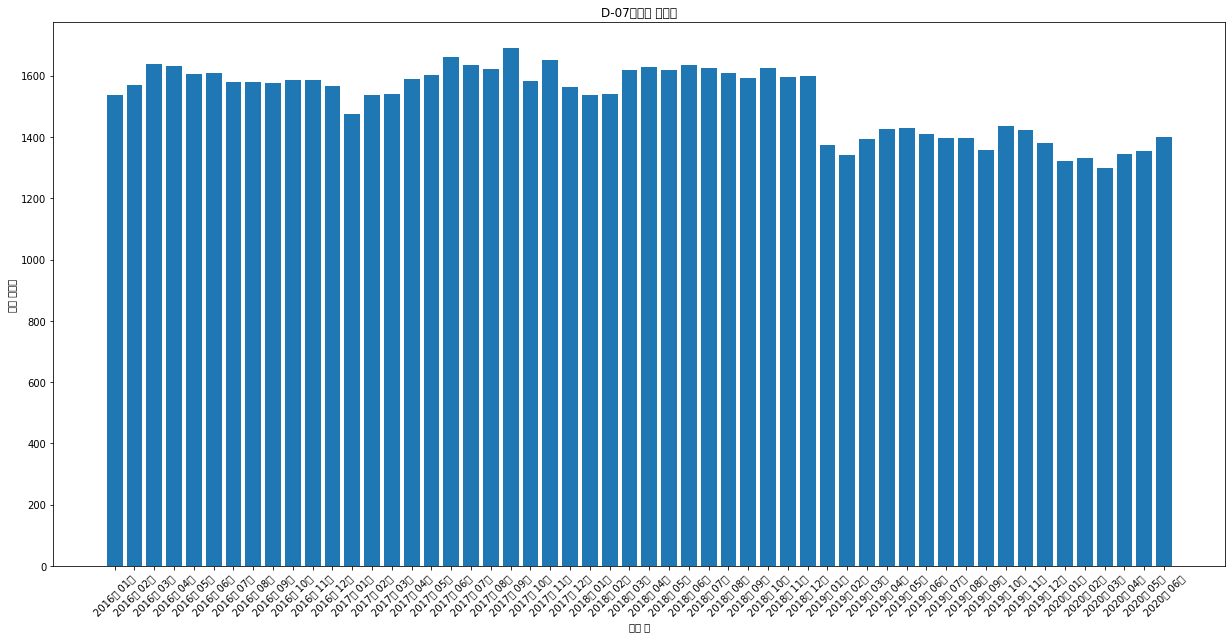

a


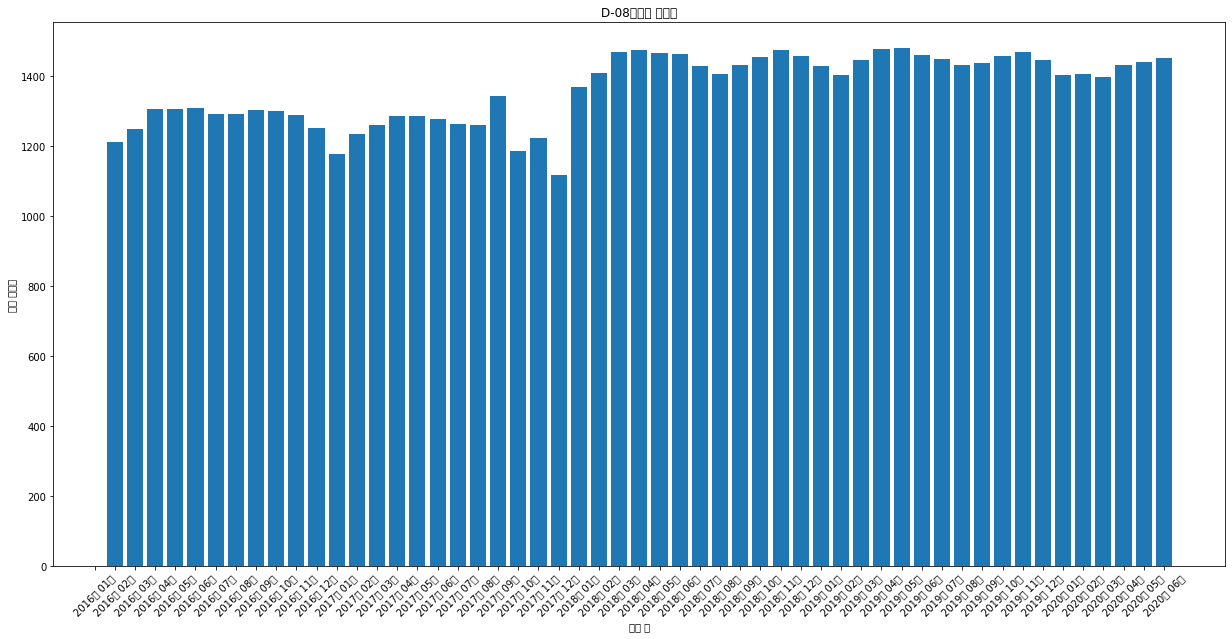

a


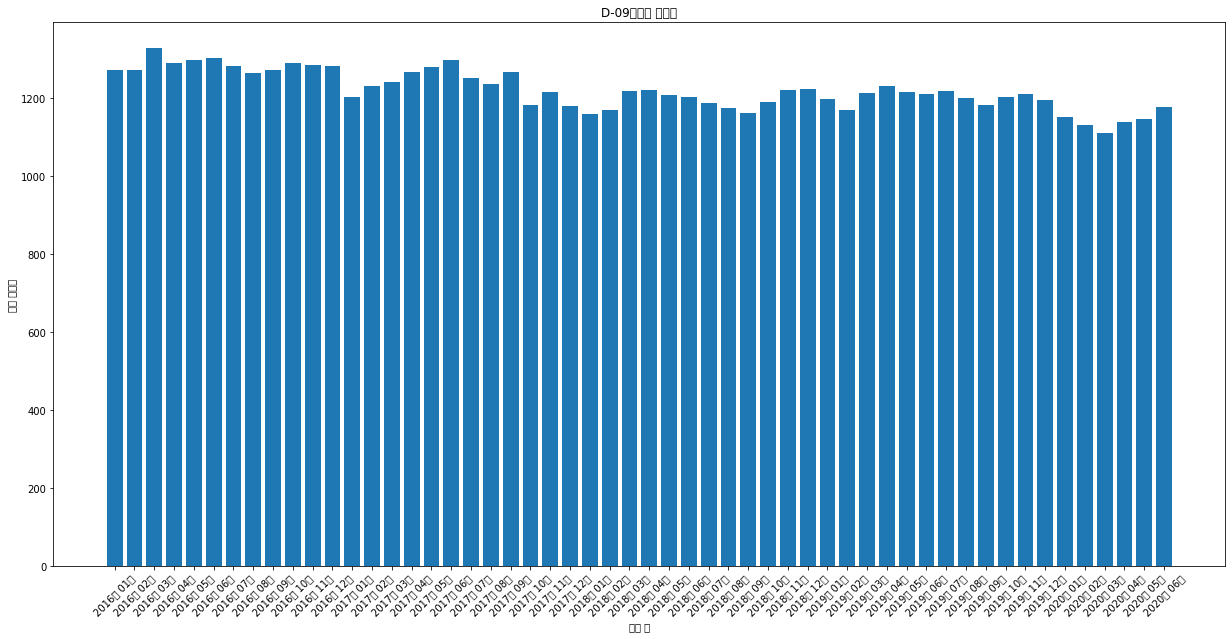

a


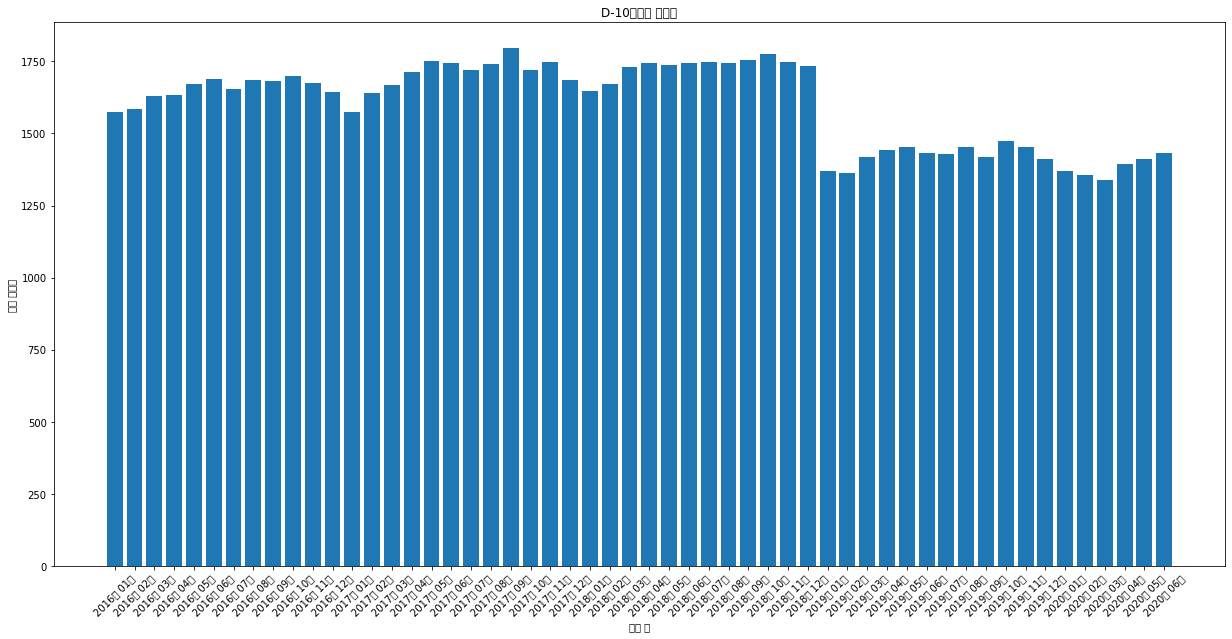

a


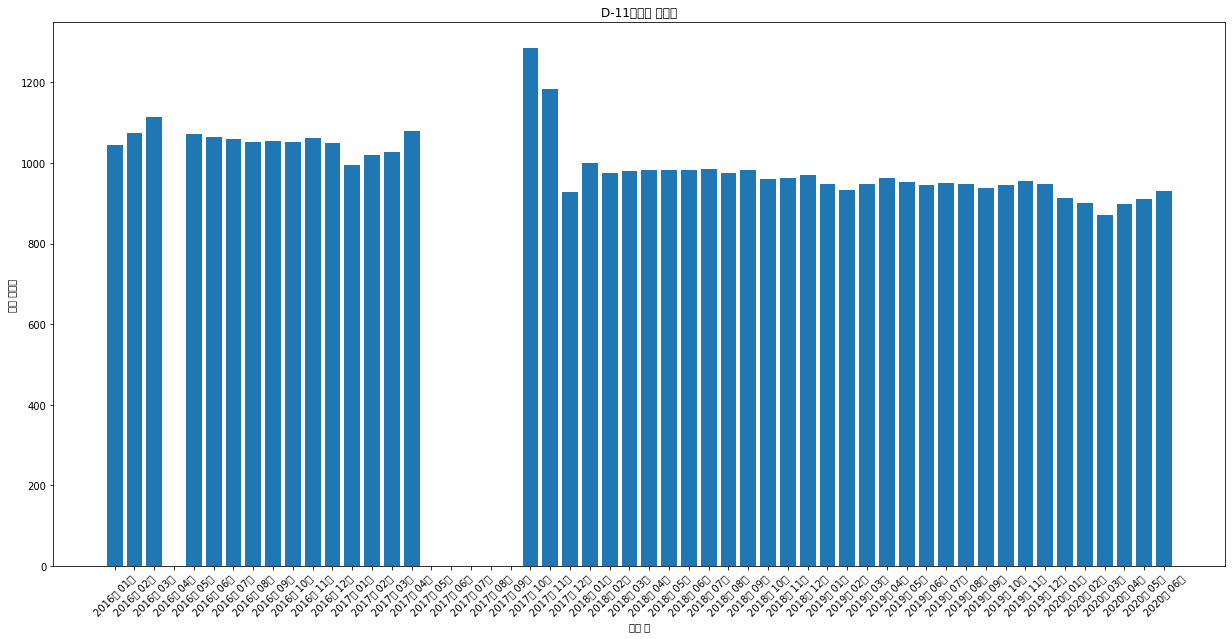

a


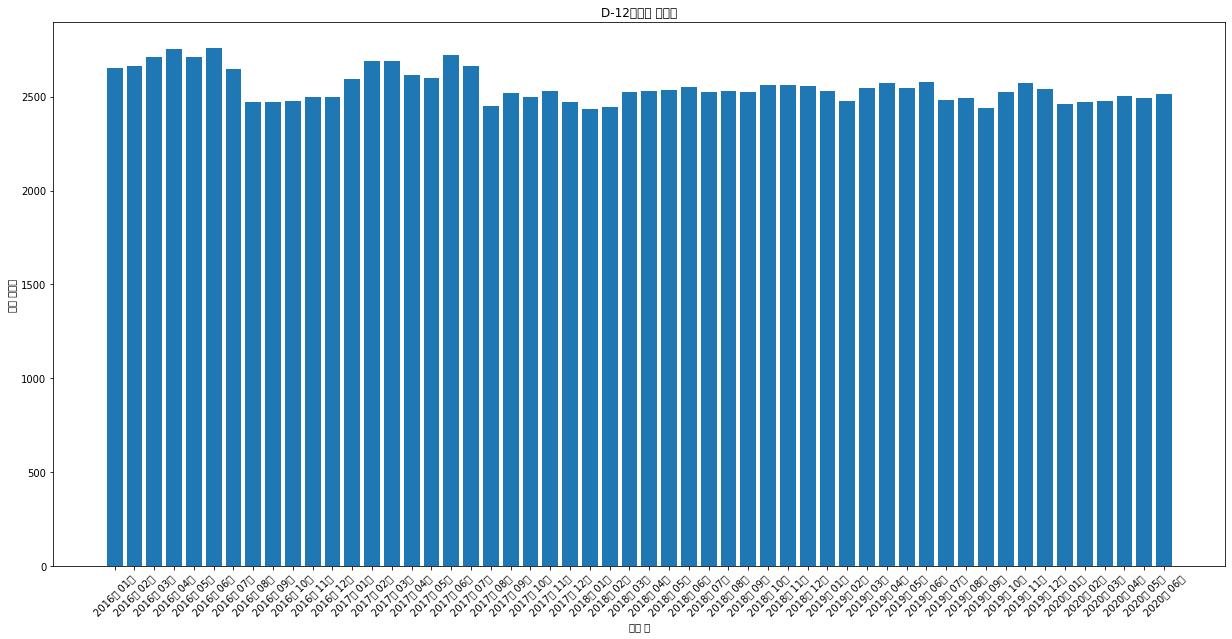

a


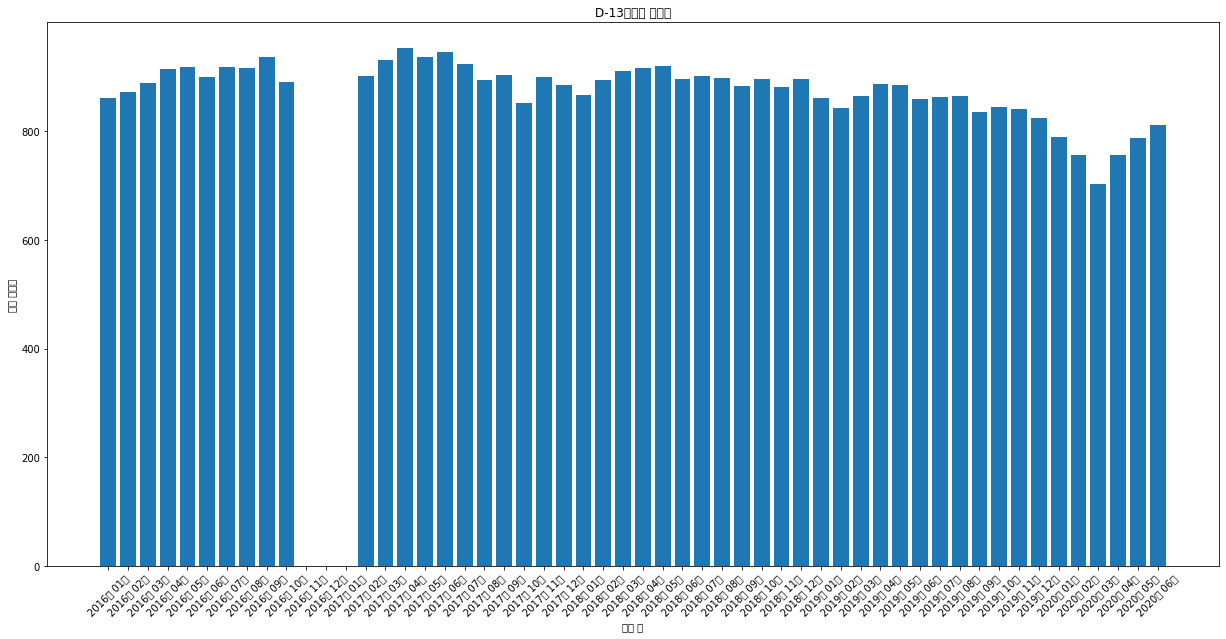

a


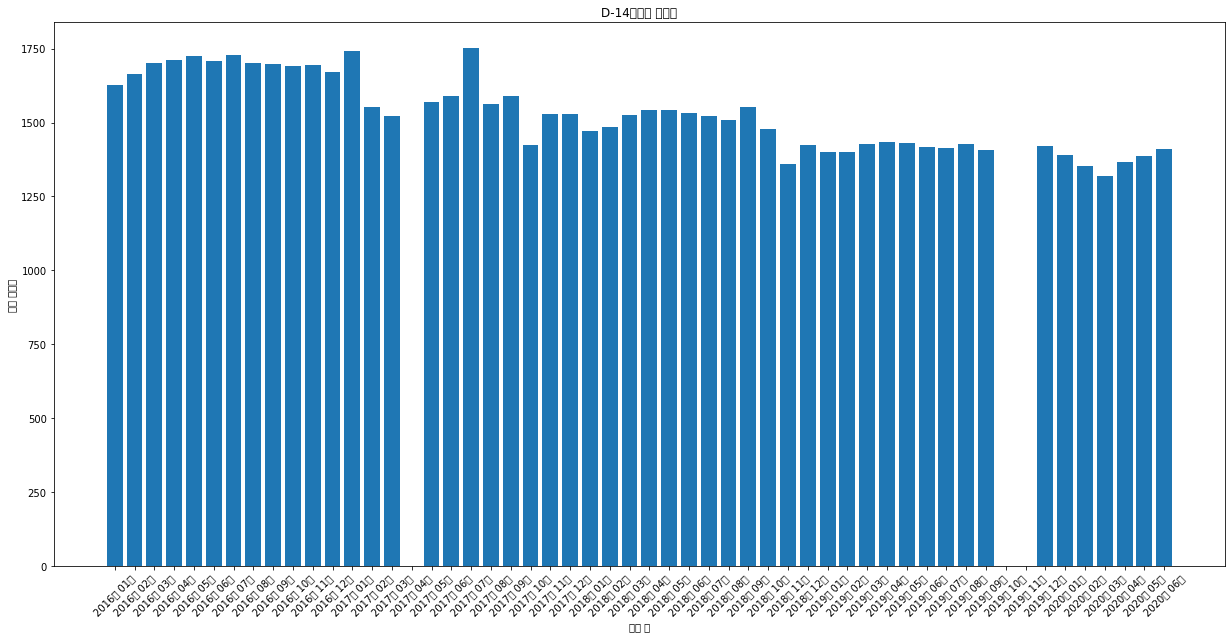

a


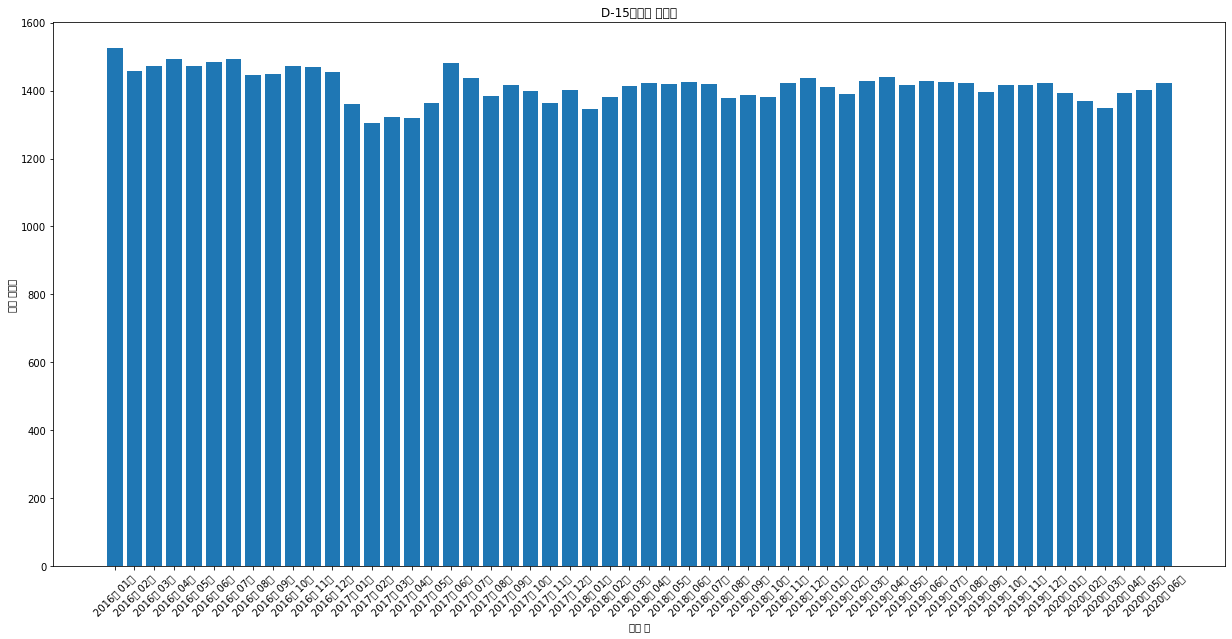

a


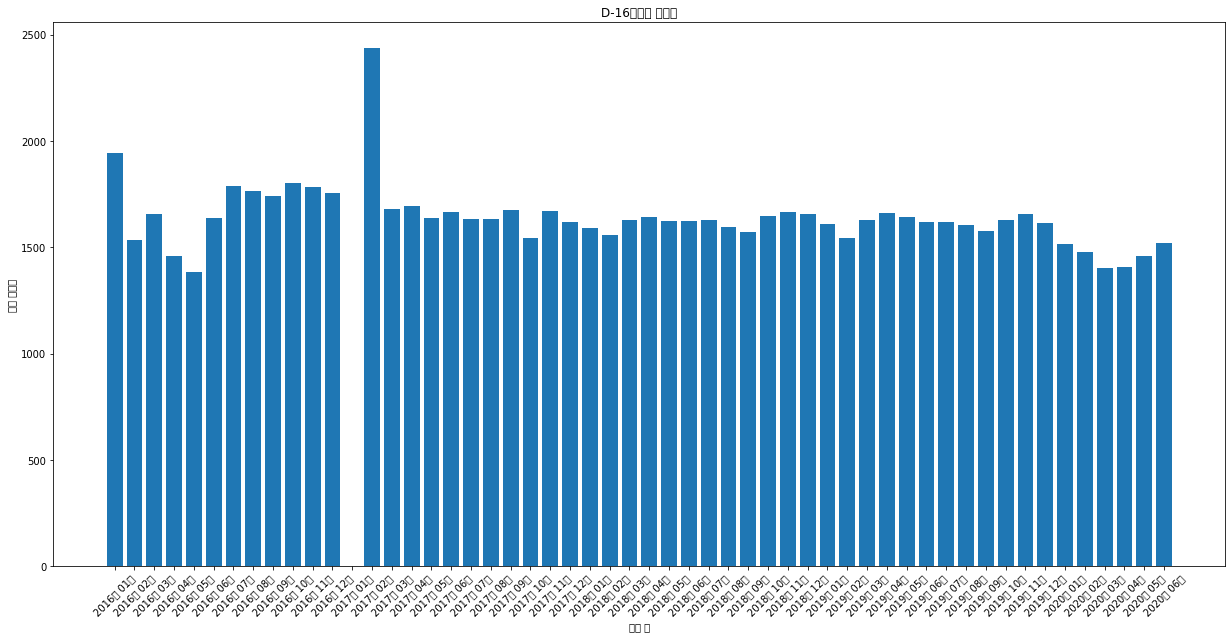

a


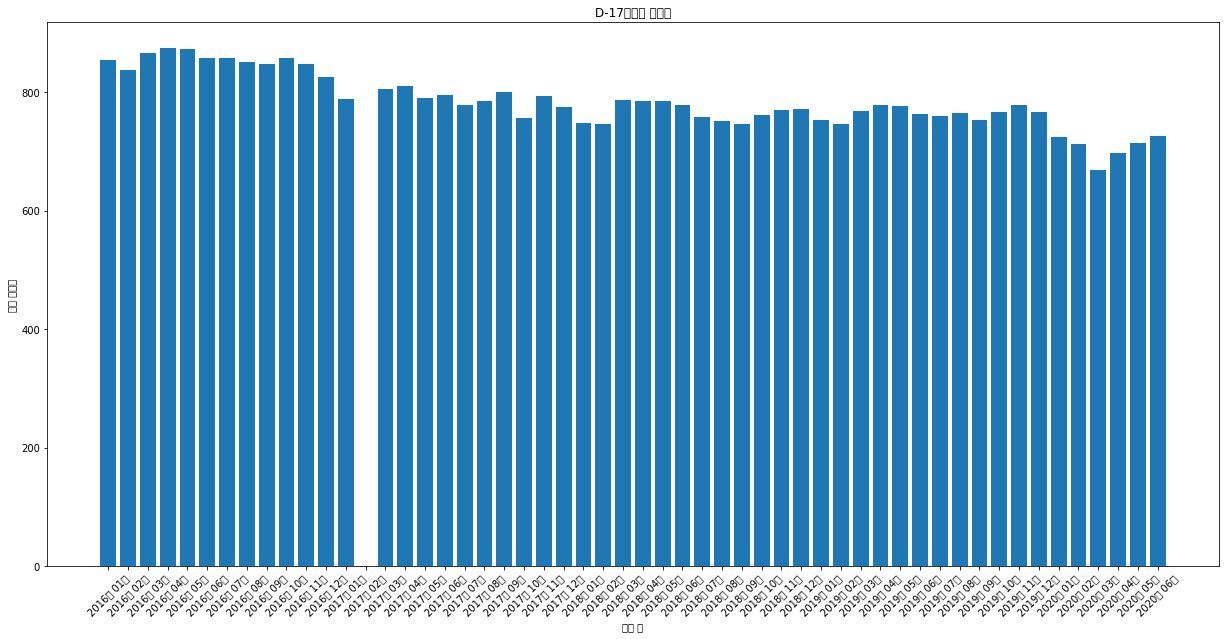

a


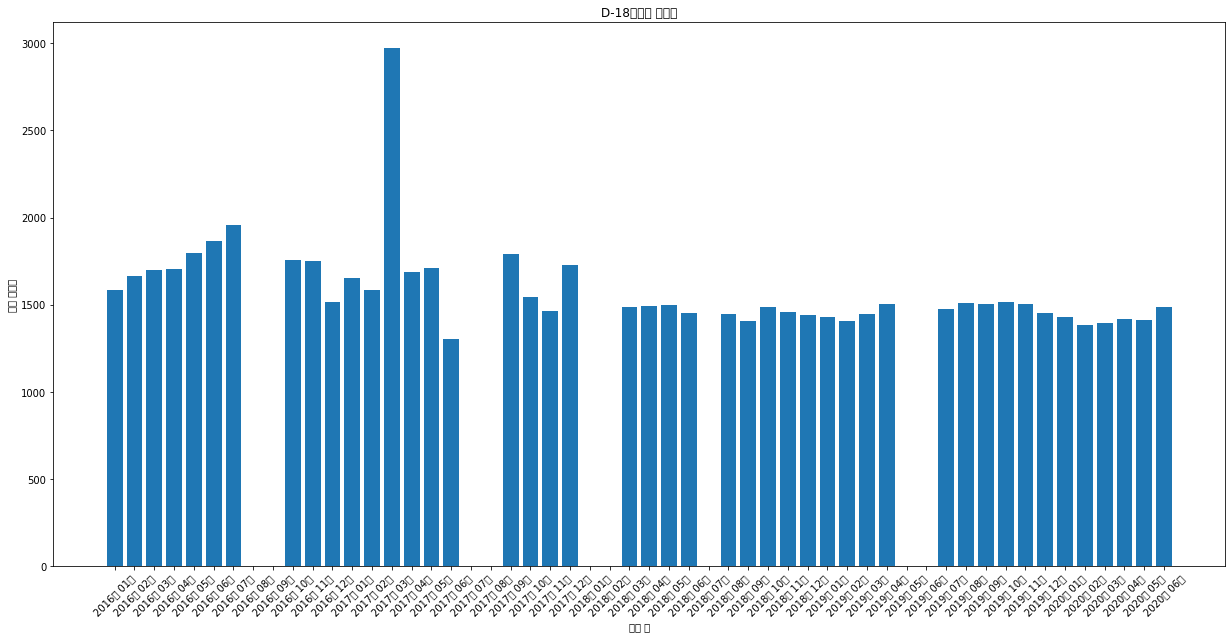

a


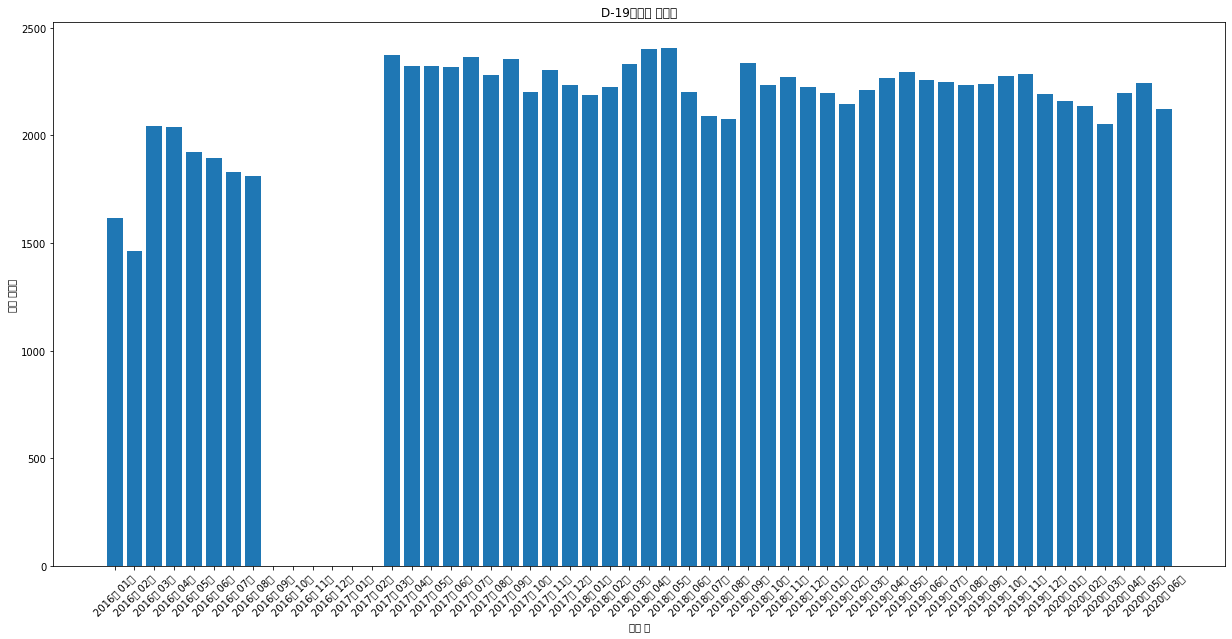

a


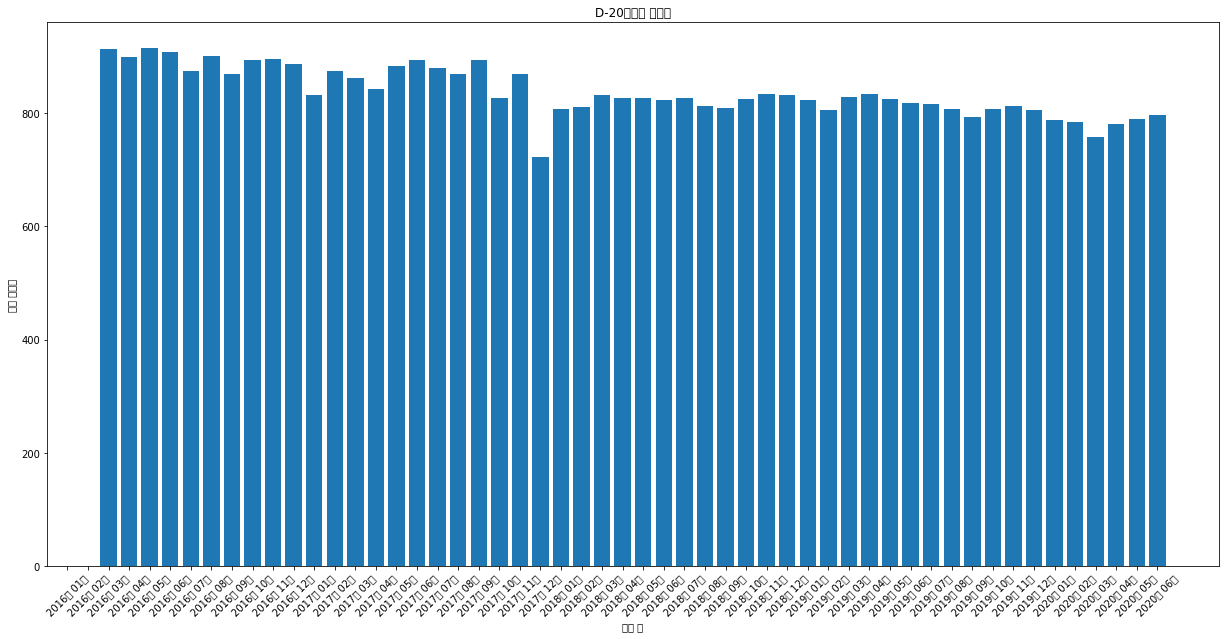

a


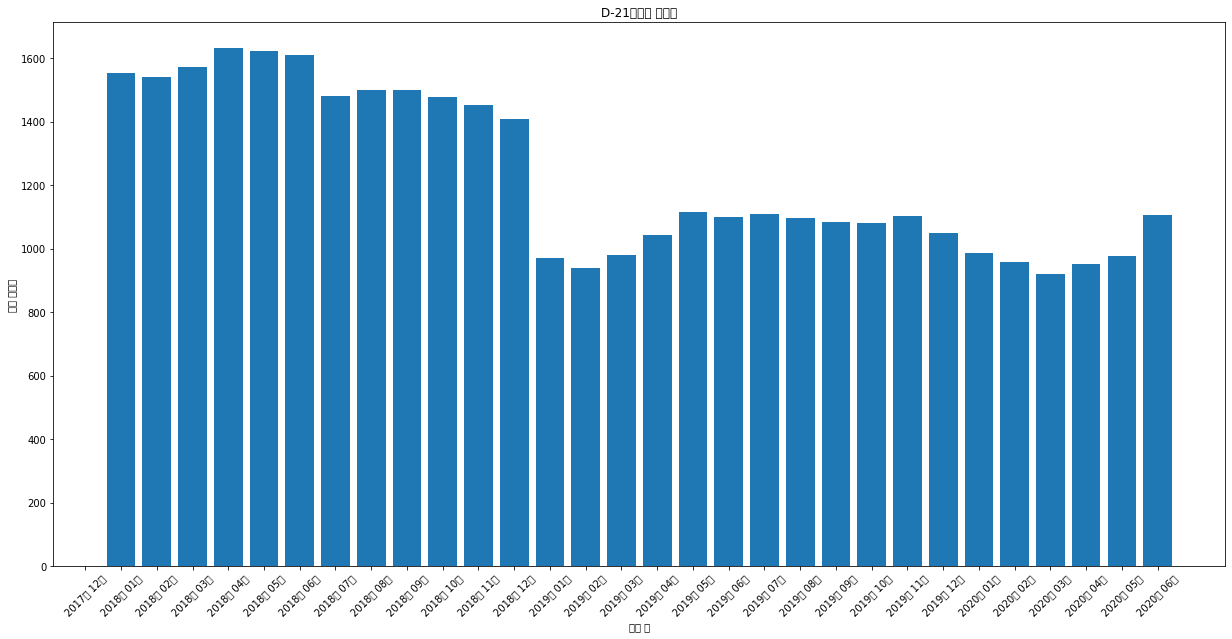

a


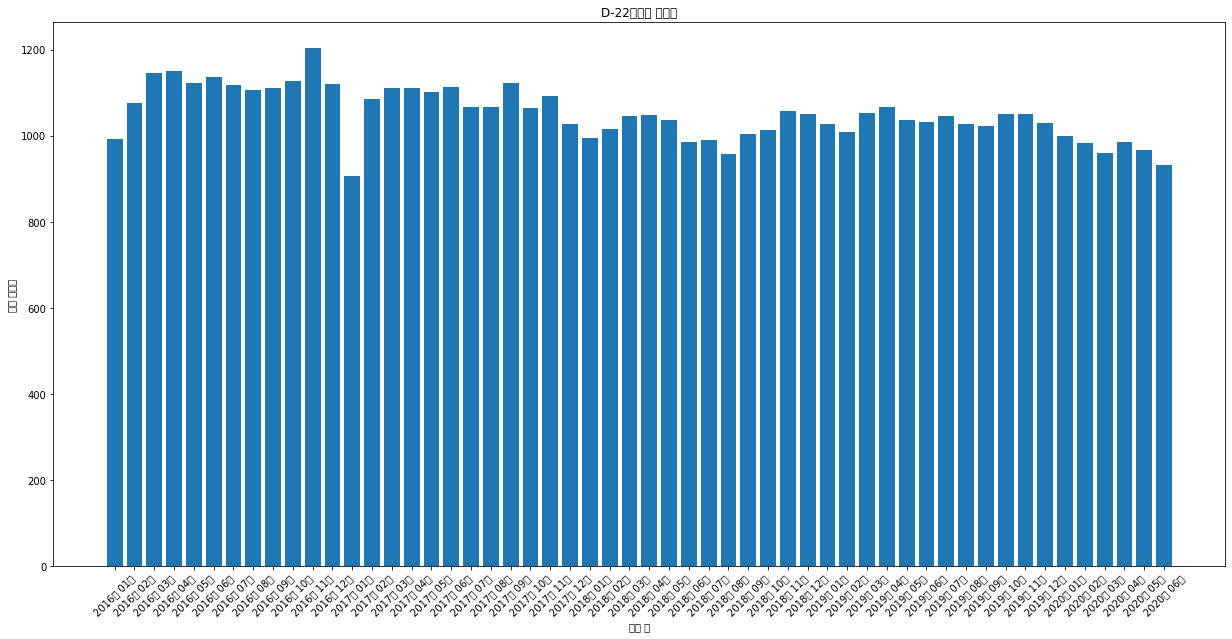

a


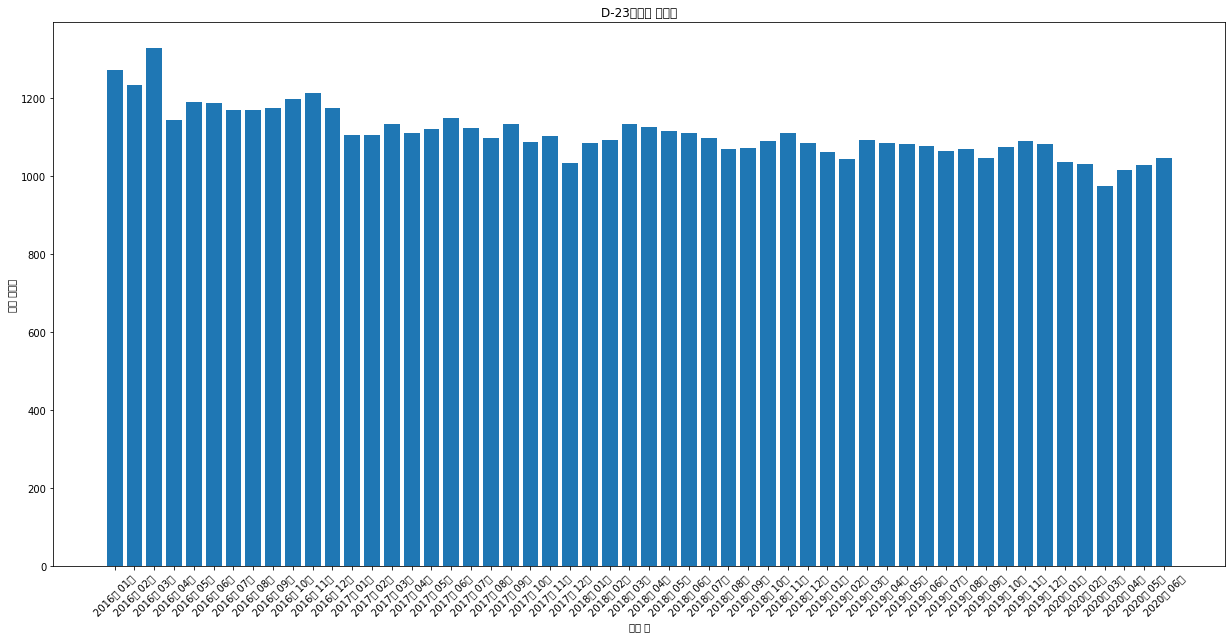

a


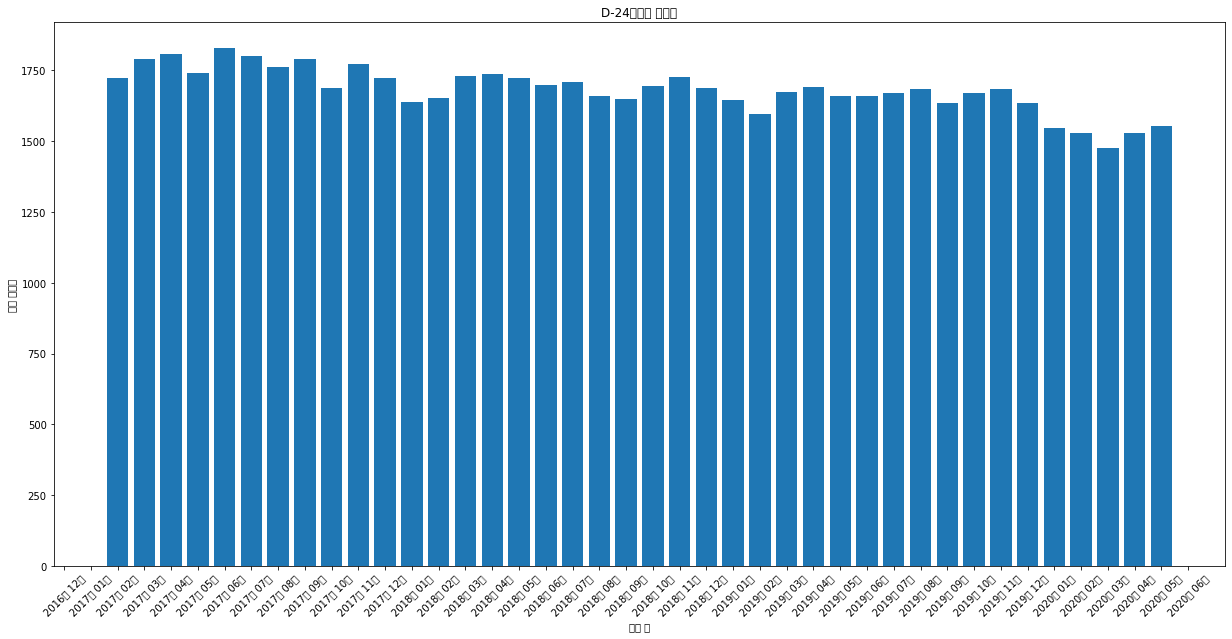

a


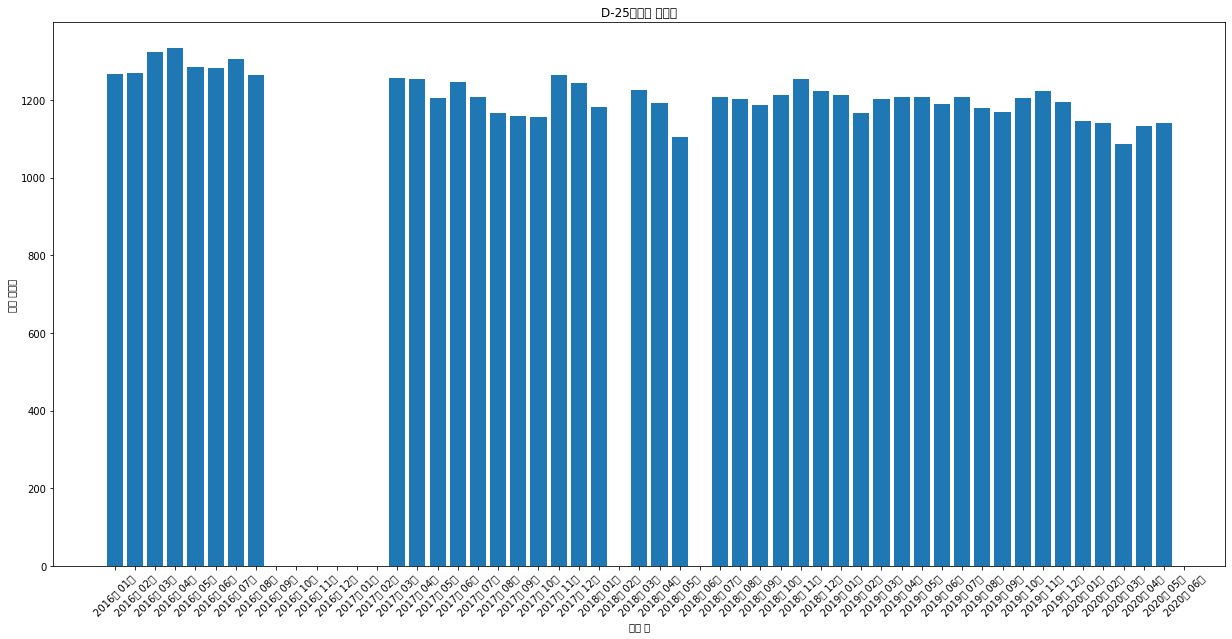

a


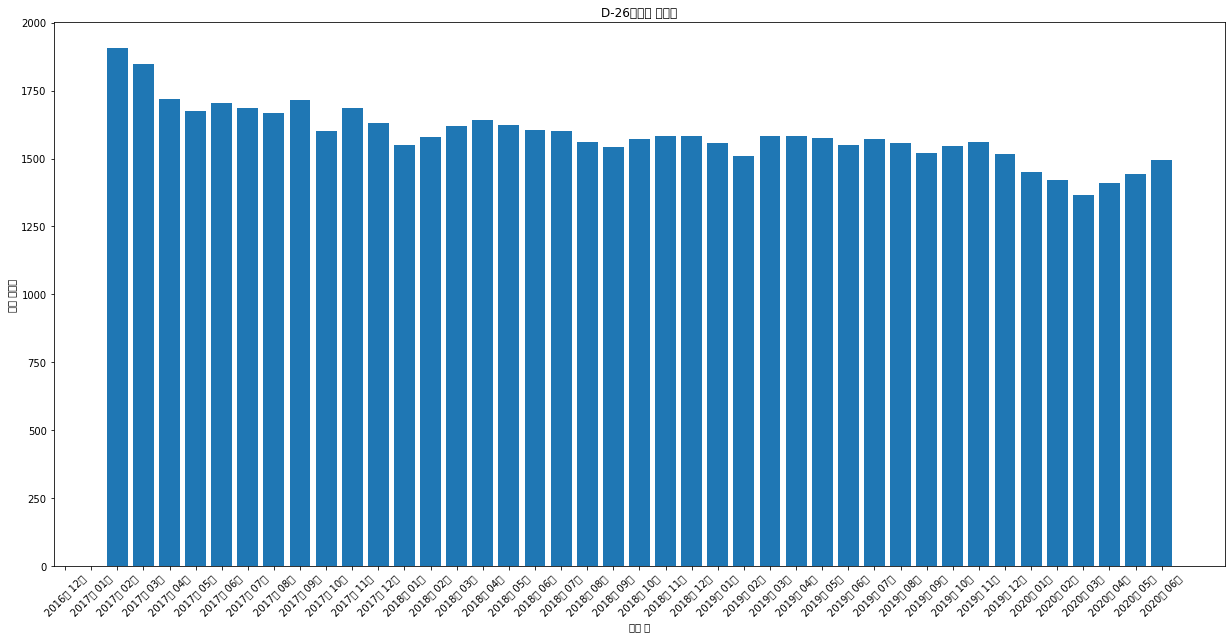

a


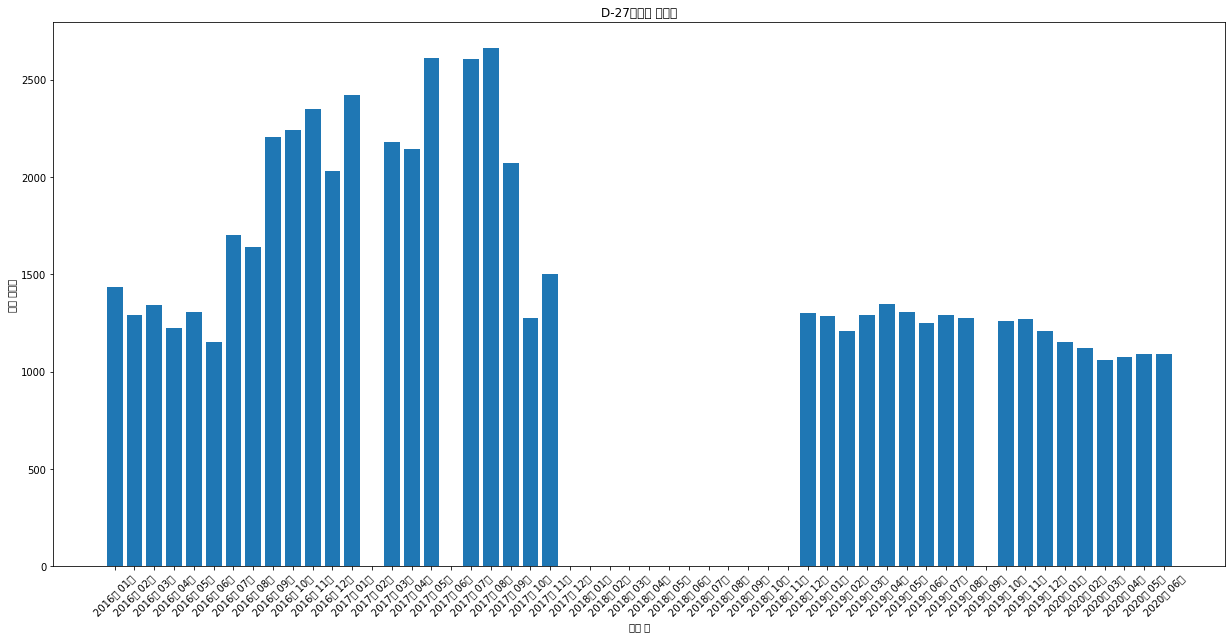

a


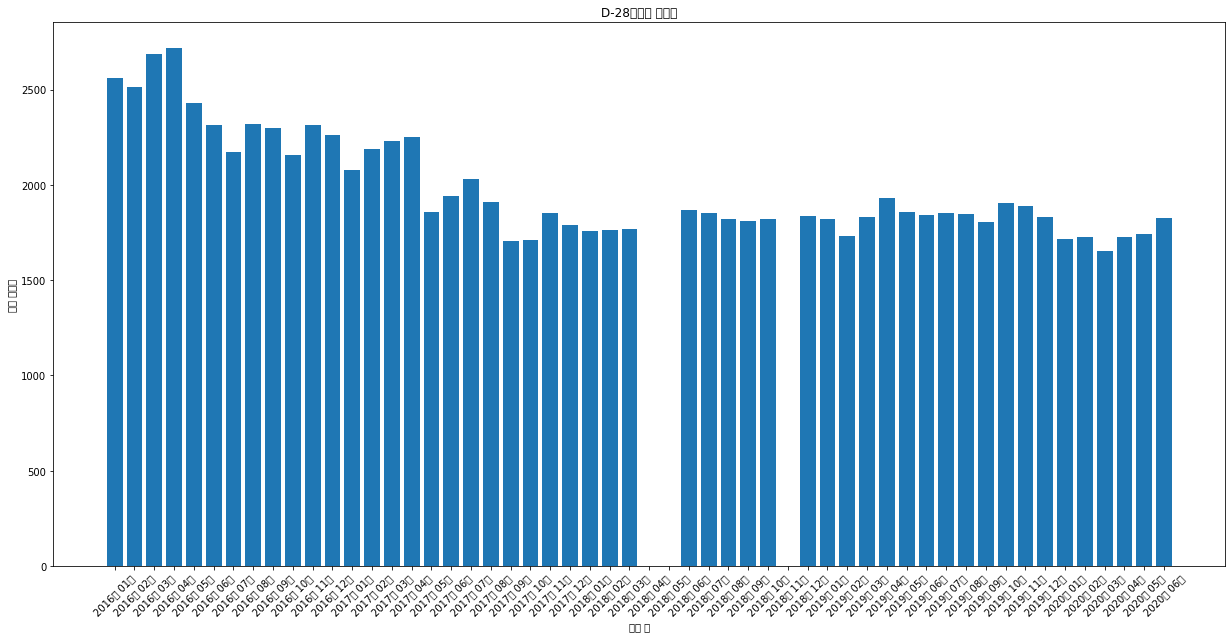

a


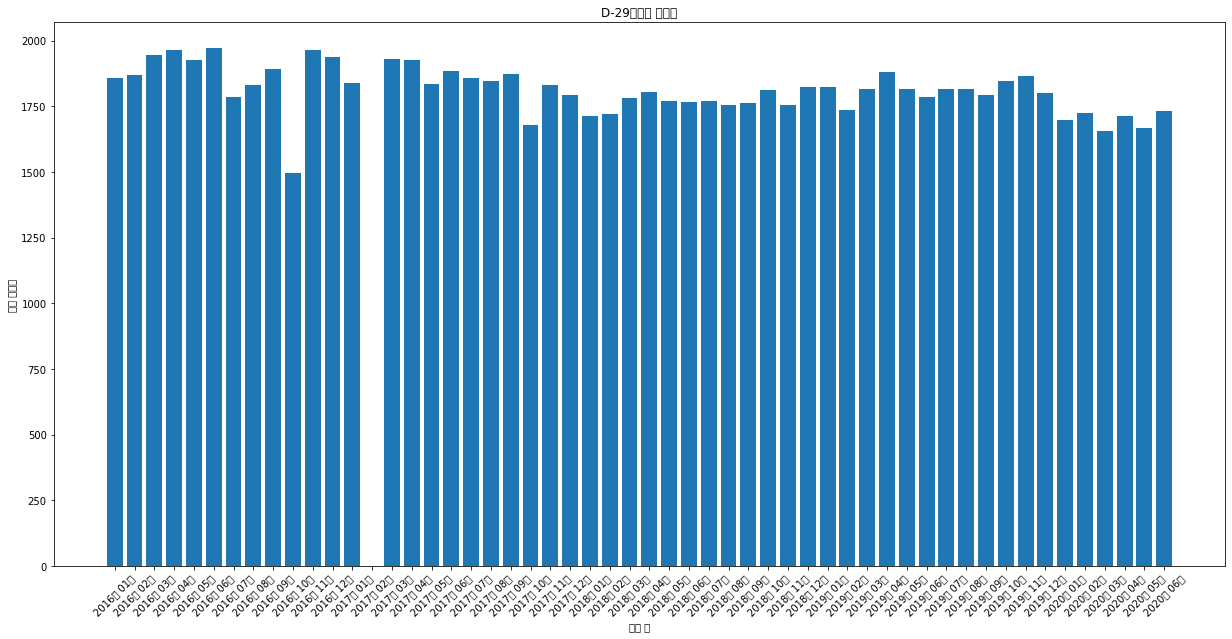

KeyboardInterrupt: 

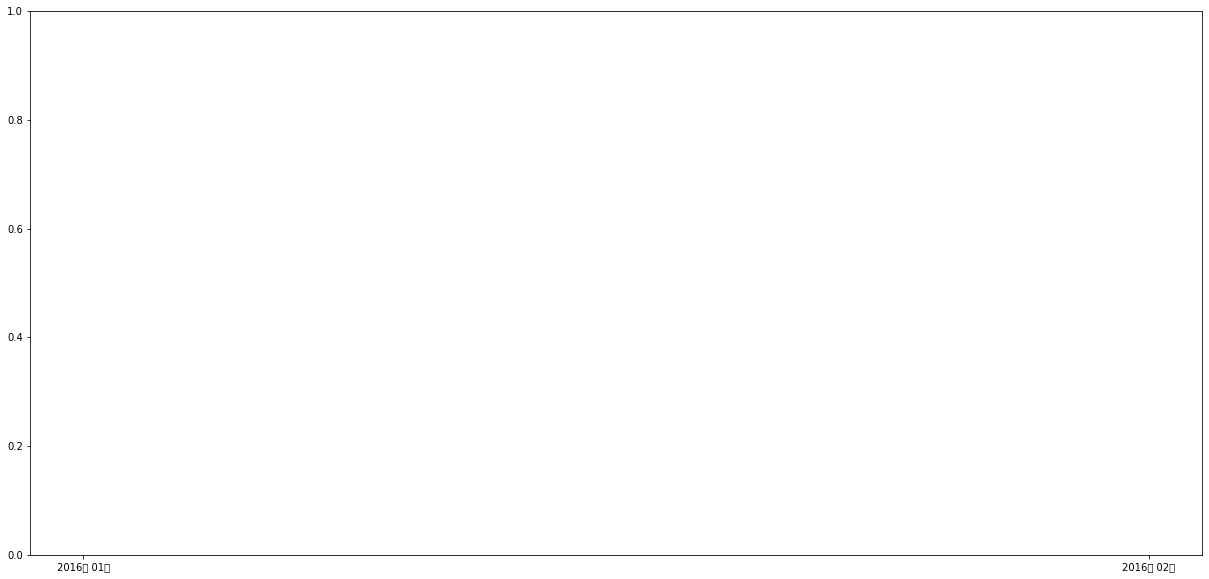

In [114]:
for col in cols:

    plt.figure(figsize=(21,10))
    plt.bar(update_tmp.index,update_tmp[col])
    print('a')
    
    plt.xlabel('측정 월')
    plt.ylabel('유동 교통량')
    # 제목
    plt.title(f'{col}지점의 교통량')
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(10,10))
plt.bar(유동인구구단위201701['구이름'],sorted(유동인구구단위201701['total']))
plt.xticks(rotation=45)
plt.show()